# Road Accident Severity Classification**

## 1) problem statement

 **Road** **Accident** **Severity** **Classification**


## Goal of the Data
  Analyse road traffic accident data to reduce the frequency and severity of accidents. Develop insights to improve road safety measures and traffic management systems.
## Description of Dataset
  This data set is collected from Addis Ababa Sub city police departments for Master's research work. The data set has been prepared from manual records of road traffic accident of the year 2017-20. All the sensitive information have been excluded during data encoding and finally, it has 32 features and 12316 instances of the accident.Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms.
## About the Data
  The target feature is Accident_severity which is a multi-class variable. The task is to classify this variable based on the other 31 features step-by-step by going through each day's task. You metric for evaluation will be f1-score.

https://www.kaggle.com/datasets/samikshakolhe/rta-dataset-addis-ababa-subcity

## 2) Libraries

In [ ]:
# ------------------------------
# Data Wrangling and Manipulation
# ------------------------------
import pandas as pd # For handling and manipulating structured data.
import numpy as np # For numerical computations and array operations.
# ------------------------------
# Data Visualization
# ------------------------------
import matplotlib.pyplot as plt # For basic plotting
import seaborn as sns # For advanced stastical visualizations
# ------------------------------
# Data Preprocessing & Feature Engineering
# ------------------------------
from sklearn.preprocessing import StandardScaler # Standardization (mean=0, variance=1)
from sklearn.preprocessing import MinMaxScaler # Normalization (scales data between 0 and 1)
from sklearn.preprocessing import LabelEncoder # Encodes categorical labels as numbers
from sklearn.preprocessing import OneHotEncoder # Converts categorical features to one-hot encoding
from sklearn.impute import SimpleImputer # Handles missing values
# ------------------------------
# Dimensionality Reduction & Feature selection
# ------------------------------
from sklearn.decomposition import PCA # Principal Component Analysis for dimensionality reduction
from sklearn.feature_selection import SelectKBest,f_classif # Feature selection
# ------------------------------
# Model Selection and Evaluation
# ------------------------------
from sklearn.model_selection import train_test_split # Splits dataset into training and test sets
from sklearn.model_selection import cross_validate # Performs cross-validation
from sklearn.model_selection import KFold # K-Fold cross-validation
from sklearn.model_selection import GridSearchCV # Hyperparameter tuning using grid search
# ------------------------------
# Performance Metrics
# ------------------------------
from sklearn.metrics import accuracy_score # Evaluates model accuracy
from sklearn.metrics import confusion_matrix # Computes confusion matrix
from sklearn.metrics import classification_report # Precision, recall, F1-score summary
from sklearn.metrics import precision_score # Precision metric
from sklearn.metrics import recall_score # Recall metric
from sklearn.metrics import roc_auc_score # AUC-ROC score for evaluating classifiers
from sklearn import metrics # Collection of evaluation metrics
# ------------------------------
# Handling Imbalaced Datasets
# ------------------------------
from imblearn.over_sampling import SMOTE # Synthetic Minority Over-sampling Technique (for handling class imbalance)
from sklearn.utils import class_weight # Assigns weights to imbalanced classes
# ------------------------------
# Machine Learning Algorithms - Classification
# ------------------------------
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors Classifier
from sklearn.svm import SVC # Support Vector Classifier
from sklearn.ensemble import RandomForestClassifier # Random Forest classifier
from sklearn.naive_bayes import GaussianNB # Naive Bayes classifier
from xgboost import XGBClassifier # Extreme Gradient Boosting classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree classifier
from sklearn.ensemble import ExtraTreesClassifier # Extra Trees classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent classifier
# ------------------------------
# Utility Fuctions
# ------------------------------
from sklearn.pipeline import make_pipeline # Creates machines learning pipelines
from sklearn.datasets import make_classification # Generates symthetic classification datasets
from sklearn import model_selection # Various model selection utilities
from sklearn import svm # Support Vector Machines module
from sklearn import tree # Decision tree-related utilities

## 3) Reading and understanding the data

In [ ]:
data=pd.read_csv("RTA Dataset.csv")
data.head(10)

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  17:02:00      Monday              18-30          Male   Above high school   
1  17:02:00      Monday              31-50          Male  Junior high school   
2  17:02:00      Monday              18-30          Male  Junior high school   
3  01:06:00      Sunday              18-30          Male  Junior high school   
4  01:06:00      Sunday              18-30          Male  Junior high school   
5  14:15:00      Friday              31-50          Male                 NaN   
6  17:30:00   Wednesday              18-30          Male  Junior high school   
7  17:20:00      Friday              18-30          Male  Junior high school   
8  17:20:00      Friday              18-30          Male  Junior high school   
9  17:20:00      Friday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience      Type_of_vehicle  \
0                Employee              1-2yr           Automobile   
1                Employee         Above 10yr  Public (> 45 seats)   
2                Employee              1-2yr      Lorry (41?100Q)   
3                Employee             5-10yr  Public (> 45 seats)   
4                Employee              2-5yr                  NaN   
5                 Unknown                NaN                  NaN   
6                Employee              2-5yr           Automobile   
7                Employee              2-5yr           Automobile   
8                Employee         Above 10yr      Lorry (41?100Q)   
9                Employee              1-2yr           Automobile   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                     NaN  ...   Going straight   
3     Governmental                     NaN  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   
5              NaN                     NaN  ...           U-Turn   
6            Owner                     NaN  ...  Moving Backward   
7     Governmental              Above 10yr  ...           U-Turn   
8            Owner                   1-2yr  ...   Going straight   
9            Owner                  2-5yrs  ...           U-Turn   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0               na              na                   na                na   
1               na              na                   na                na   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4               na              na                   na                na   
5  Driver or rider            Male                31-50                 3   
6  Driver or rider          Female                18-30                 3   
7               na              na                   na                na   
8       Pedestrian            Male             Under 18                 3   
9        Passenger            Male                18-30                 3   

  Work_of_casuality Fitness_of_casuality              Pedestrian_movement  \
0               NaN                  NaN                 Not a Pedestrian   
1               NaN                  NaN                 Not a Pedestrian   
2            Driver                  NaN                 Not a Pedestrian   
3            Driver               Normal                 Not a Pedestrian   
4               NaN                  NaN                 Not a Pedestrian   
5            Driver               Normal                 Not a Pedestrian   
6            Driver               Normal                 Not a Pedestrian   
7               NaN               Normal                 Not a Pedestrian   
8            Driver               Normal  Crossing from driver's nearside   

In [ ]:
#shape of the data
data.shape

(12316, 32)

In [ ]:
#display first n rows
data.tail(10)


Time Day_of_week Age_band_of_driver Sex_of_driver  \
12306  17:10:00      Friday              18-30          Male   
12307  17:10:00      Friday              31-50          Male   
12308  17:10:00      Friday              18-30          Male   
12309  09:05:00      Friday              31-50        Female   
12310  09:05:00      Friday              18-30          Male   
12311  16:15:00   Wednesday              31-50          Male   
12312  18:00:00      Sunday            Unknown          Male   
12313  13:55:00      Sunday            Over 51          Male   
12314  13:55:00      Sunday              18-30        Female   
12315  13:55:00      Sunday              18-30          Male   

        Educational_level Vehicle_driver_relation Driving_experience  \
12306  Junior high school                Employee              2-5yr   
12307  Junior high school                Employee         Above 10yr   
12308  Junior high school                Employee         Above 10yr   
12309   Elementary school                Employee             5-10yr   
12310                 NaN                Employee                NaN   
12311                 NaN                Employee              2-5yr   
12312   Elementary school                Employee             5-10yr   
12313  Junior high school                Employee             5-10yr   
12314  Junior high school                Employee         Above 10yr   
12315  Junior high school                Employee             5-10yr   

        Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
12306    Lorry (11?40Q)            Owner                   1-2yr  ...   
12307  Pick up upto 10Q     Governmental               Below 1yr  ...   
12308    Lorry (11?40Q)            Owner                     NaN  ...   
12309  Pick up upto 10Q            Owner                     NaN  ...   
12310   Special vehicle            Owner              Above 10yr  ...   
12311    Lorry (11?40Q)            Owner                     NaN  ...   
12312        Automobile            Owner                     NaN  ...   
12313             Bajaj            Owner                  2-5yrs  ...   
12314   Lorry (41?100Q)            Owner                  2-5yrs  ...   
12315             Other            Owner                  2-5yrs  ...   

      Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
12306   Going straight               na              na                   na   
12307  Moving Backward               na              na                   na   
12308            Other               na              na                   na   
12309   Going straight  Driver or rider            Male                18-30   
12310        Reversing        Passenger            Male              Over 51   
12311   Going straight               na              na                   na   
12312            Other               na              na                   na   
12313            Other  Driver or rider            Male                31-50   
12314            Other               na              na                   na   
12315         Stopping       Pedestrian          Female                    5   

      Casualty_severity Work_of_casuality Fitness_of_casuality  \
12306                na               NaN                  NaN   
12307                na               NaN                  NaN   
12308                na     Self-employed               Normal   
12309                 3            Driver               Normal   
12310                 3          Employee               Normal   
12311                na            Driver               Normal   
12312                na            Driver               Normal   
12313                 3            Driver               Normal   
12314                na            Driver               Normal   
12315                 3            Driver               Normal   

                                     Pedestrian_movement  \
12306                                   N

### summarized information of columns in dataset

In [ ]:
# display random dataset samples
data.sample(5)

Time Day_of_week Age_band_of_driver Sex_of_driver  \
7690  17:09:00    Saturday           Under 18          Male   
5974  12:15:00   Wednesday            Over 51          Male   
7909  16:02:00      Monday            Over 51          Male   
9192  12:20:00    Saturday              18-30          Male   
8797  13:40:00    Thursday              18-30          Male   

       Educational_level Vehicle_driver_relation Driving_experience  \
7690  Junior high school                Employee         Above 10yr   
5974  Junior high school                Employee             5-10yr   
7909  Junior high school                Employee              2-5yr   
9192                 NaN                     NaN                NaN   
8797   Elementary school                Employee         Above 10yr   

      Type_of_vehicle Owner_of_vehicle Service_year_of_vehicle  ...  \
7690       Long lorry            Owner                     NaN  ...   
5974  Lorry (41?100Q)            Owner                   1-2yr  ...   
7909              NaN            Owner              Above 10yr  ...   
9192     Stationwagen            Owner                 5-10yrs  ...   
8797       Automobile            Owner                  2-5yrs  ...   

     Vehicle_movement   Casualty_class Sex_of_casualty Age_band_of_casualty  \
7690   Going straight               na              na                   na   
5974   Going straight       Pedestrian            Male                18-30   
7909   Going straight               na              na                   na   
9192   Going straight       Pedestrian            Male                    5   
8797   Going straight  Driver or rider            Male                18-30   

     Casualty_severity Work_of_casuality Fitness_of_casuality  \
7690                na            Driver               Normal   
5974                 3            Driver               Normal   
7909                na            Driver               Normal   
9192                 3            Driver               Normal   
8797                 3            Driver               Normal   

                  Pedestrian_movement                     Cause_of_accident  \
7690                 Not a Pedestrian                       Moving Backward   
5974                 Not a Pedestrian                    Driving carelessly   
7909                 Not a Pedestrian  Driving under the influence of drugs   
9192  Crossing from driver's nearside                    Driving carelessly   
8797                 Not a Pedestrian             Changing lane to the left   

     Accident_severity  
7690     Slight Injury  
5974     Slight Injury  
7909     Slight Injury  
9192     Slight Injury  
8797    Serious Injury  

[5 rows x 32 columns]

In [ ]:
#display basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
#display summary statistics
data.describe()

Number_of_vehicles_involved  Number_of_casualties
count                 12316.000000          12316.000000
mean                      2.040679              1.548149
std                       0.688790              1.007179
min                       1.000000              1.000000
25%                       2.000000              1.000000
50%                       2.000000              1.000000
75%                       2.000000              2.000000
max                       7.000000              8.000000

In [ ]:
data.describe(include=['O']).T

count unique  \
Time                     12316   1074   
Day_of_week              12316      7   
Age_band_of_driver       12316      5   
Sex_of_driver            12316      3   
Educational_level        11575      7   
Vehicle_driver_relation  11737      4   
Driving_experience       11487      7   
Type_of_vehicle          11366     17   
Owner_of_vehicle         11834      4   
Service_year_of_vehicle   8388      6   
Defect_of_vehicle         7889      3   
Area_accident_occured    12077     14   
Lanes_or_Medians         11931      7   
Road_allignment          12174      9   
Types_of_Junction        11429      8   
Road_surface_type        12144      5   
Road_surface_conditions  12316      4   
Light_conditions         12316      4   
Weather_conditions       12316      9   
Type_of_collision        12161     10   
Vehicle_movement         12008     13   
Casualty_class           12316      4   
Sex_of_casualty          12316      3   
Age_band_of_casualty     12316      6   
Casualty_severity        12316      4   
Work_of_casuality         9118      7   
Fitness_of_casuality      9681      5   
Pedestrian_movement      12316      9   
Cause_of_accident        12316     20   
Accident_severity        12316      3   

                                                                      top  \
Time                                                             15:30:00   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                Automobile   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                               No defect   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                       120  
Day_of_week               2041  
Age_band_of_driver        4271  
Sex_of_driver            11437  
Educational_level         7619  
Vehicle_driver_relation   9627  
Driving_experience        3363  
Type_of_vehicle           3205  
Owner_of_vehicle         10459  
Service_year_of_vehicle   2883  
De

#4)Visualization of The Features

## Time and Date

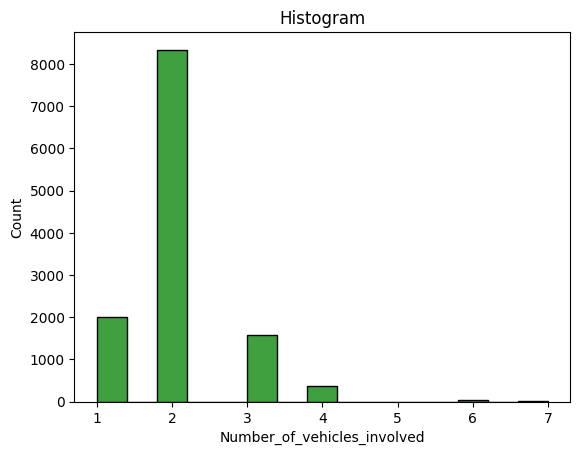

In [ ]:
cp=sns.histplot(x=data['Number_of_vehicles_involved'],color="green",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Number_of_vehicles_involved")
plt.show()

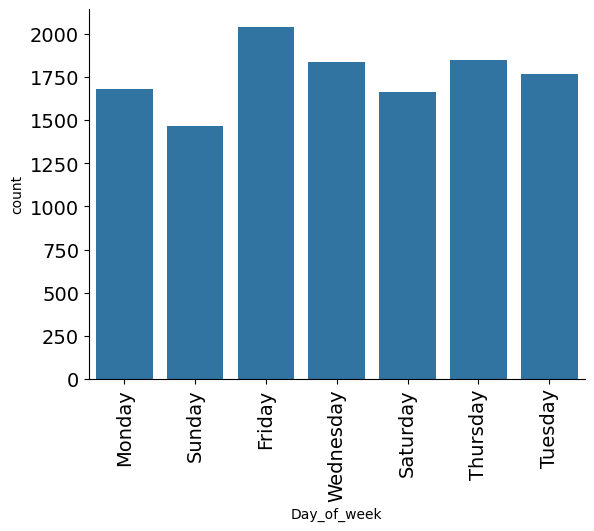

In [ ]:
cp=sns.countplot(x=data['Day_of_week'])
plt.xticks(fontsize=14)
plt.xticks(rotation=90)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

In [ ]:
def formatTimeCol(t):
  t=t[:2]
  if ":"in t :
    t=t[:1]
  return int(t)
def categorizeTimeCol(t):
  if t>=8 and t< 17:
    return "Day"
  else:
    return "Night"
data['Time']=data['Time'].apply(lambda x:formatTimeCol(x))
data['Time']=data['Time'].apply(lambda x:categorizeTimeCol(x))
data['Time'].value_counts(dropna=False)


Time
Day      6387
Night    5929
Name: count, dtype: int64

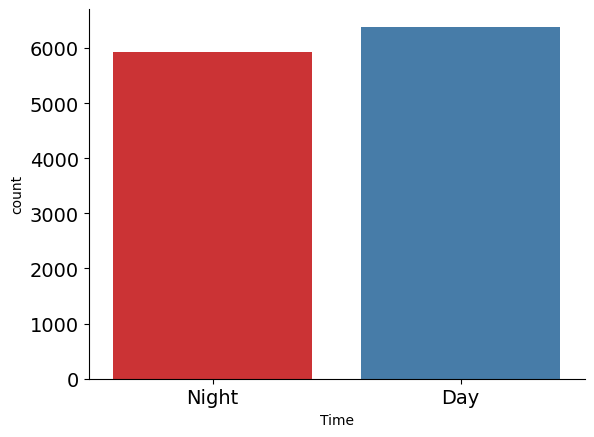

In [ ]:
sns.countplot(x=data['Time'],palette="Set1",hue=data['Time'])
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)

Inference on Time :

. most of the acciodents Occured on friday

. occured at day time 8am and 5pm (office & school hours)

. sunday has less number of accidents

##Driver

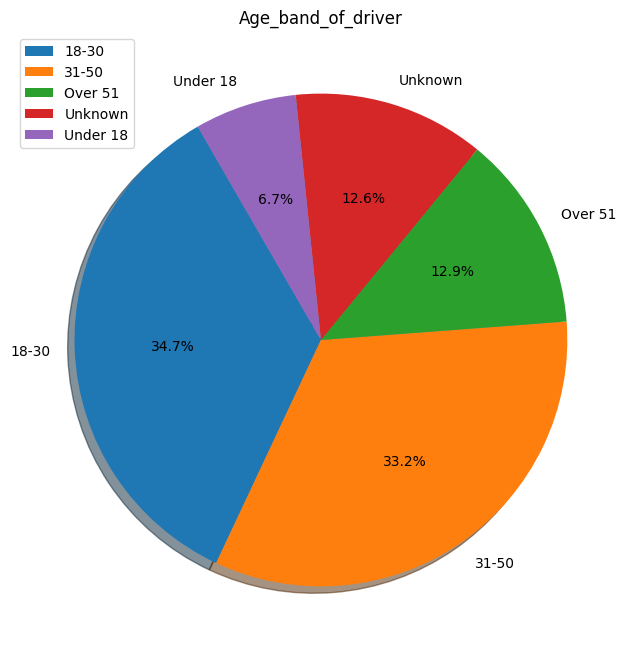

In [ ]:
Age_band_count=data["Age_band_of_driver"].value_counts()
plt.figure(figsize=(10,8))
fig_1=plt.pie(Age_band_count,labels=Age_band_count.index,autopct='%1.1f%%',startangle=120,shadow=True)
plt.title("Age_band_of_driver")
plt.legend(loc="upper left")
plt.show()

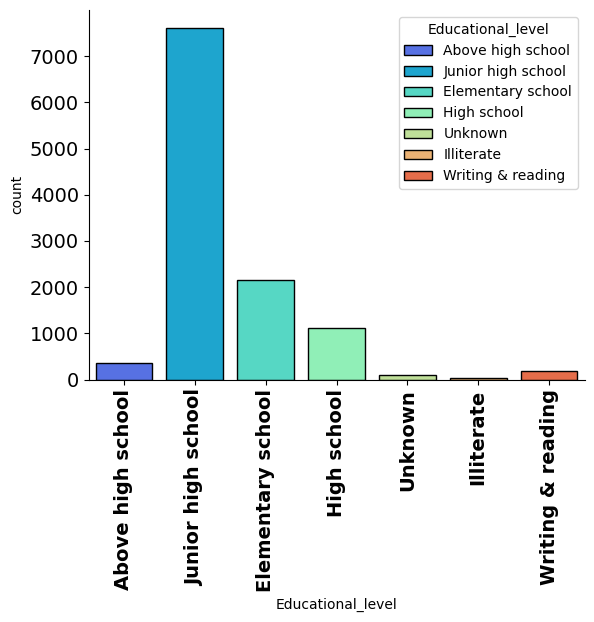

In [ ]:
sns.countplot(x=data['Educational_level'],palette="rainbow",hue=data['Educational_level'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14,fontweight="bold")
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

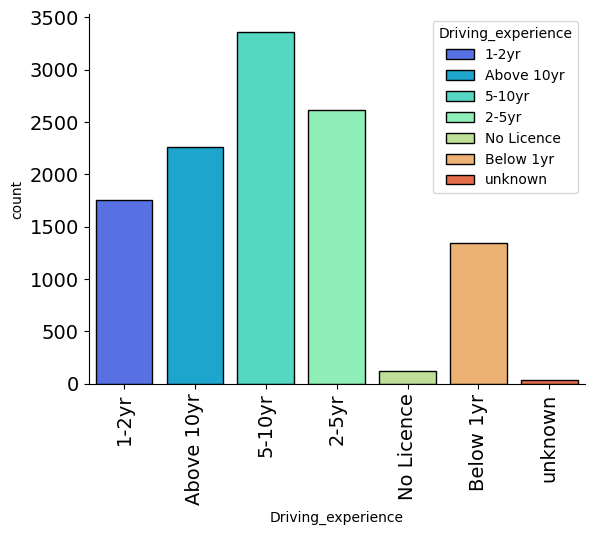

In [ ]:
sns.countplot(x=data['Driving_experience'],palette="rainbow",hue=data['Driving_experience'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

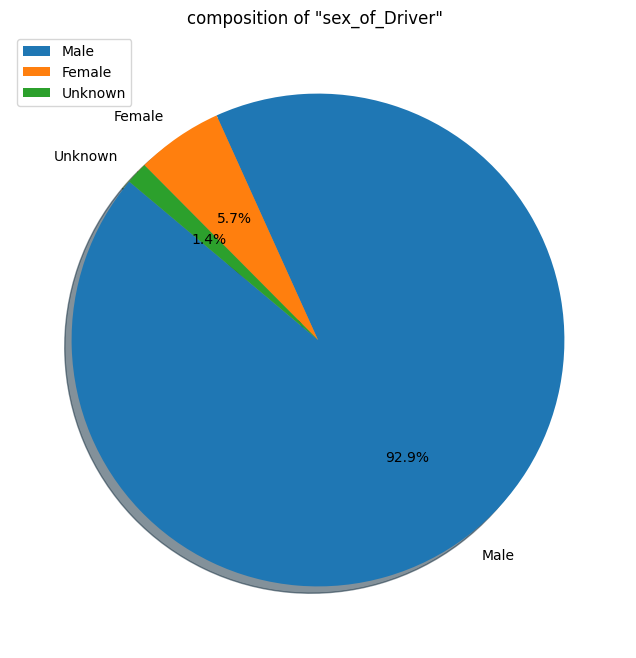

In [ ]:
sex_of_driver=data['Sex_of_driver'].value_counts()
plt.figure(figsize=(10,8))
fig_1=plt.pie(sex_of_driver,labels=sex_of_driver.index,autopct='%1.1f%%',startangle=140,shadow=True)
plt.title('composition of "sex_of_Driver" ')
plt.legend(loc="upper left")
plt.show()

In [ ]:
data['Vehicle_driver_relation'].value_counts()


Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64

inference on Driver's features:

 . most of the drivers are male between 18-30 age group with 5-10 years of driving experience .

 .**Number ogf RTAs by Gender of Drivers**:- in terms of Gender , male drivers have been the main cause of traffic accidents by taking  88% of accidents .however ,in the current datra collection or data gained from the Addis Ababa
 Traffic Police commission data ,there is no  information on the number of vehicles driven by males and females in Addis Ababa

 . majority of the drivers who got accident are employees.

 . **number of RTAs by the Driving Experience of the Driver**:- From this ,it can been that experienced drivers are not only experiences in high-risk accidents
 but also in terms of human behavior .there are aslo reports of accidents involving unlicensed drivers , who are in violation of the law endanger lives
 and property.

. **Road RTAs by the educational level of Drivers** :- According to the data ,the highest number of the accidents reported at the junior high school educational level of  drivers . in thgis comparison ,the risk of most drivers at this educational level is related to the problems we have seen in the age group .this does not mean that all drivers at this level of education are in their teens , but  they do take part.

. Most of the accidents occured in personally owned passager vehicles
  

##vehicle

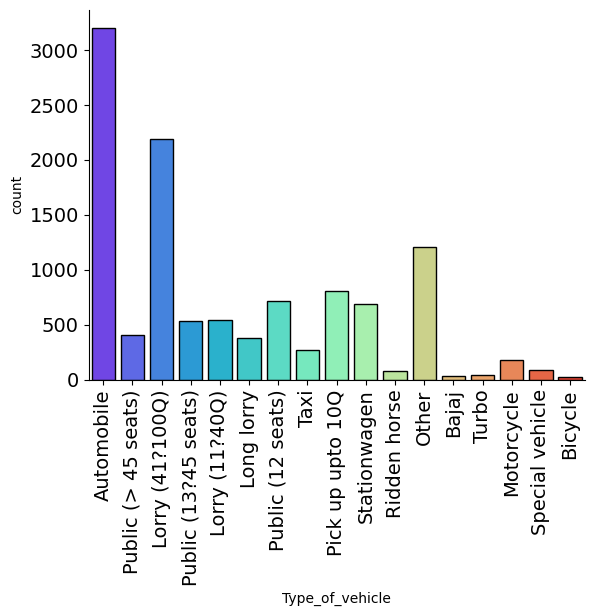

In [ ]:
cp=sns.countplot(x=data['Type_of_vehicle'],palette="rainbow",hue=data['Type_of_vehicle'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
cp.legend_.remove()
plt.show()

In [ ]:
data['Owner_of_vehicle'].value_counts()


Owner_of_vehicle
Owner           10459
Governmental     1041
Organization      312
Other              22
Name: count, dtype: int64

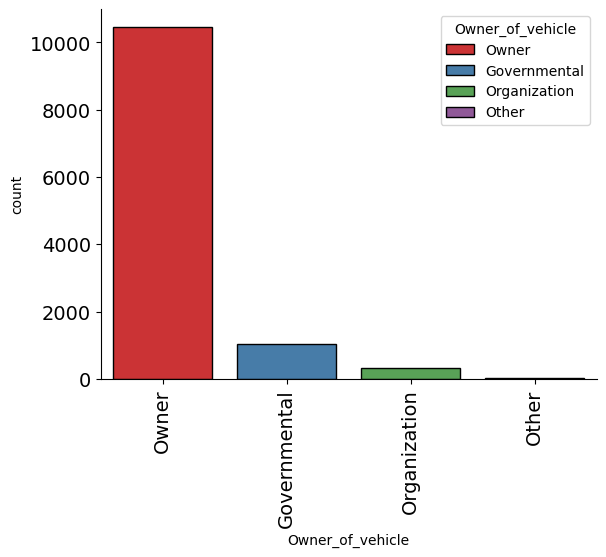

In [ ]:
sns.countplot(x=data['Owner_of_vehicle'],palette="Set1",hue=data['Owner_of_vehicle'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

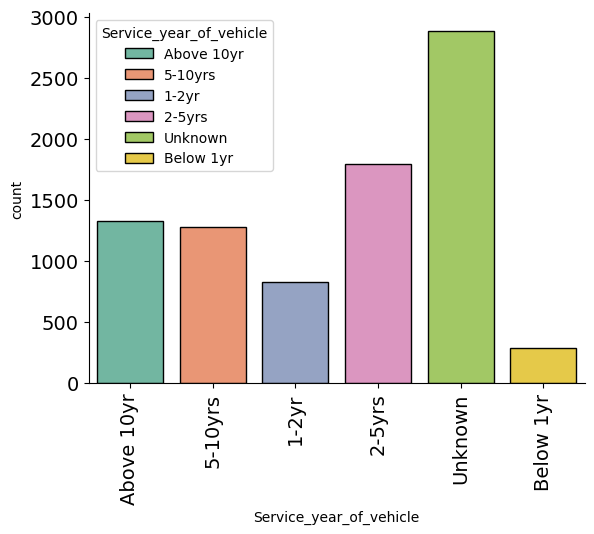

In [ ]:
sns.countplot(x=data['Service_year_of_vehicle'],palette="Set2",hue=data['Service_year_of_vehicle'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

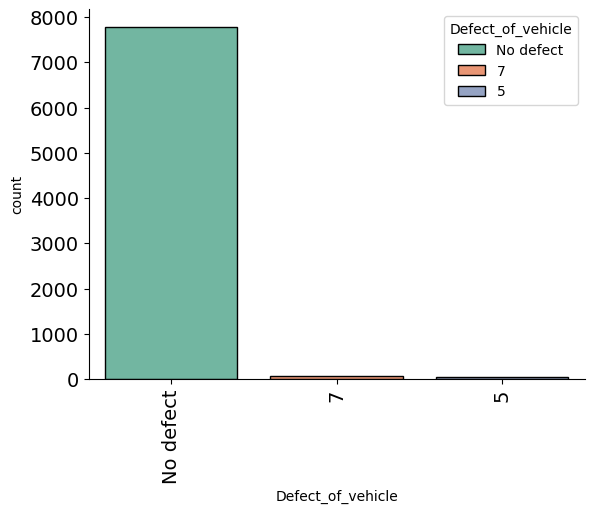

In [ ]:
sns.countplot(x=data['Defect_of_vehicle'],palette="Set2",hue=data['Defect_of_vehicle'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

inference on vehicle feature

* most of the vehicle dont have any defects .but still got accident

* most of the service_year is unknown

## casuality

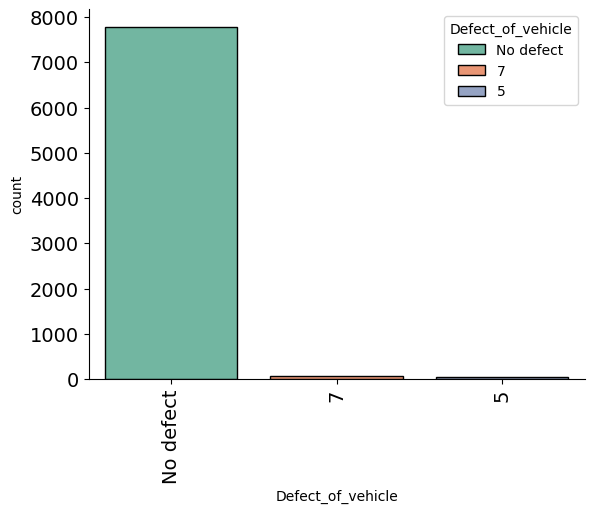

In [ ]:
sns.countplot(x=data['Defect_of_vehicle'],palette="Set2",hue=data['Defect_of_vehicle'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

In [ ]:
data['Casualty_class'].value_counts()


Casualty_class
Driver or rider    4944
na                 4443
Pedestrian         1649
Passenger          1280
Name: count, dtype: int64

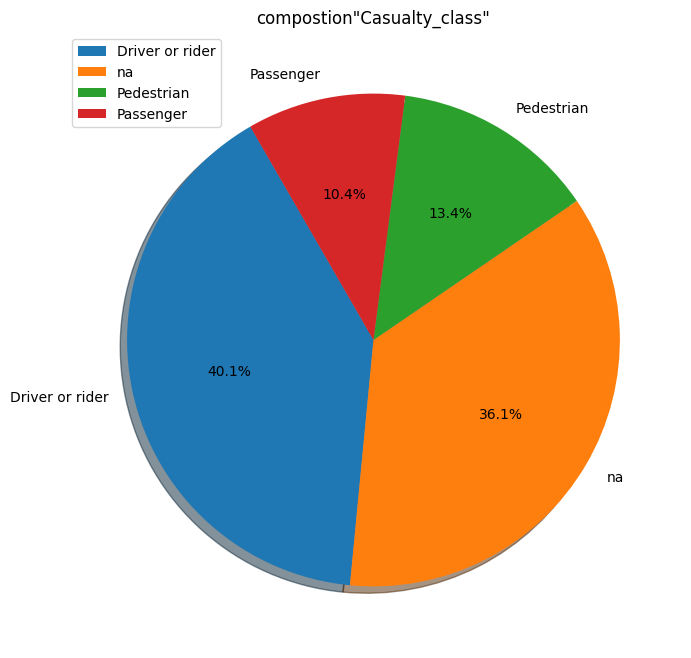

In [ ]:
Casualty_class=data["Casualty_class"].value_counts()
plt.figure(figsize=(10,8))
fig_1=plt.pie(Casualty_class,labels=Casualty_class.index,autopct='%1.1f%%',startangle=120,shadow=True)
plt.title('compostion"Casualty_class"')
plt.legend(loc="upper left")
plt.show()

In [ ]:
data['Sex_of_casualty'].value_counts()


Sex_of_casualty
Male      5253
na        4443
Female    2620
Name: count, dtype: int64

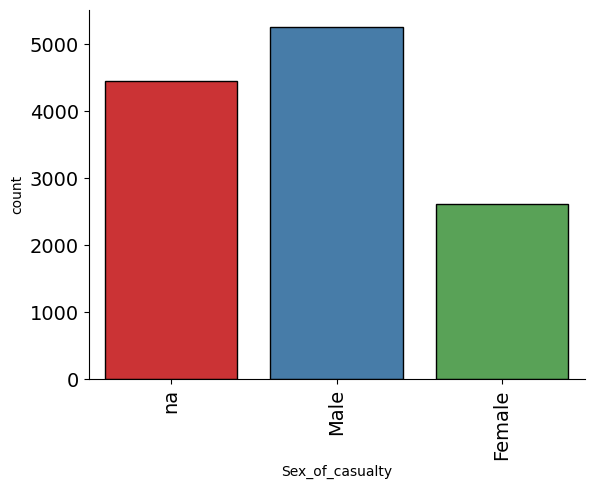

In [ ]:
sns.countplot(x=data['Sex_of_casualty'],palette="Set1",hue=data['Sex_of_casualty'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

In [ ]:
data['Age_band_of_casualty'].value_counts()


Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
5            244
Name: count, dtype: int64

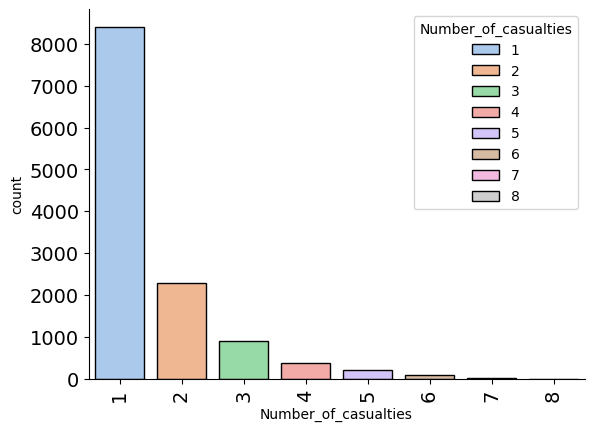

In [ ]:
sns.countplot(x=data['Number_of_casualties'],palette="pastel",hue=data['Number_of_casualties'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

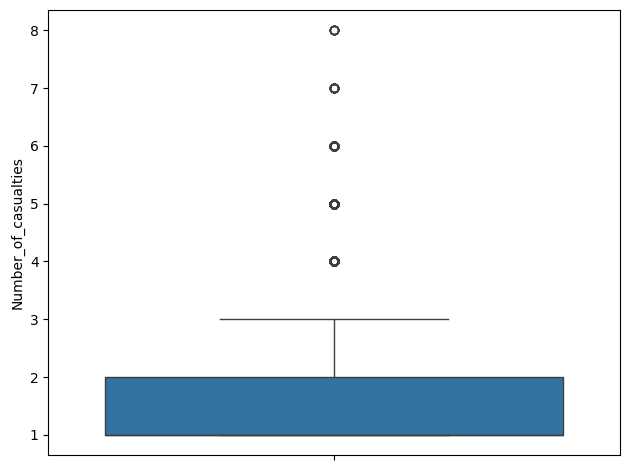

In [ ]:
sns.boxplot(data["Number_of_casualties"])
plt.tight_layout()
plt.show()

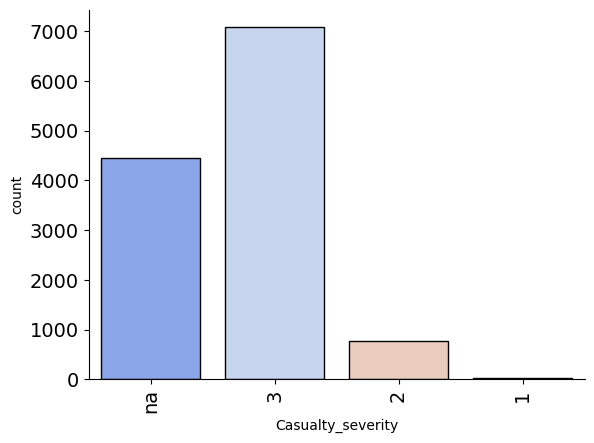

In [ ]:
sns.countplot(x=data['Casualty_severity'],palette="coolwarm",hue=data['Casualty_severity'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
plt.show()

In [ ]:
data['Work_of_casuality'].value_counts()

Work_of_casuality
Driver           5903
Self-employed    2044
Employee          553
Other             463
Student           103
Unemployed         33
Unknown            19
Name: count, dtype: int64

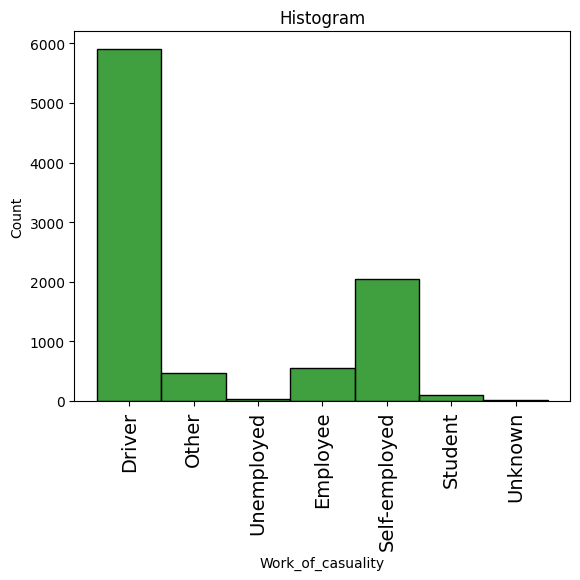

In [ ]:
cp=sns.histplot(x=data['Work_of_casuality'],color="green",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Work_of_casuality")
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
data['Fitness_of_casuality'].value_counts()

Fitness_of_casuality
Normal          9608
NormalNormal      19
Deaf              18
Other             18
Blind             18
Name: count, dtype: int64

inferences on Casuality details
 * avg Casuality number is 1
 * severity range of casuality is 3
 * Age Range is 18 - 30
 * Most of people are normally fit .only a few are deaf  and blind
 * male casuality is more compared to female casuality
 * major casuality is drivers himself
 * pedestrians are also more likely affected by the accident


## Accident Area

In [ ]:
data['Area_accident_occured'].value_counts()

Area_accident_occured
Other                              3819
Office areas                       3451
Residential areas                  2060
 Church areas                      1060
 Industrial areas                   456
School areas                        415
  Recreational areas                327
 Outside rural areas                218
 Hospital areas                     121
  Market areas                       63
Rural village areas                  44
Unknown                              22
Rural village areasOffice areas      20
Recreational areas                    1
Name: count, dtype: int64

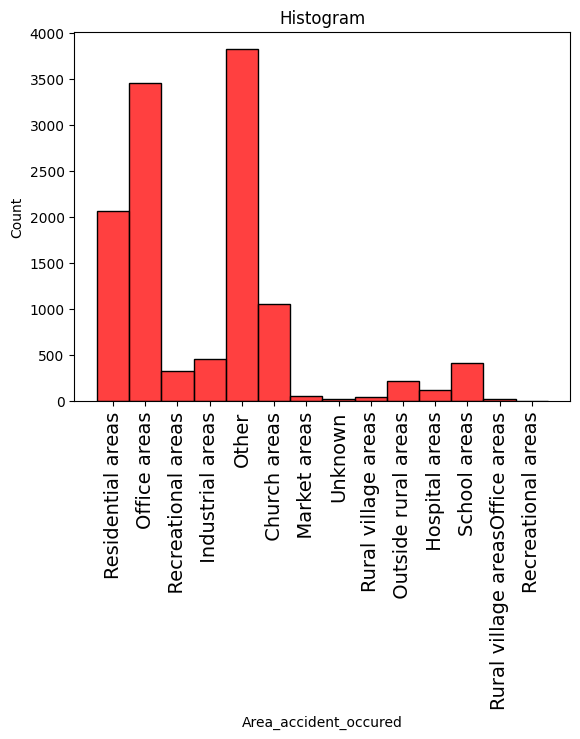

In [ ]:
cp=sns.histplot(x=data['Area_accident_occured'],color="red",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Area_accident_occured")
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
data['Lanes_or_Medians'].value_counts()

Lanes_or_Medians
Two-way (divided with broken lines road marking)    4411
Undivided Two way                                   3796
other                                               1660
Double carriageway (median)                         1020
One way                                              845
Two-way (divided with solid lines road marking)      142
Unknown                                               57
Name: count, dtype: int64

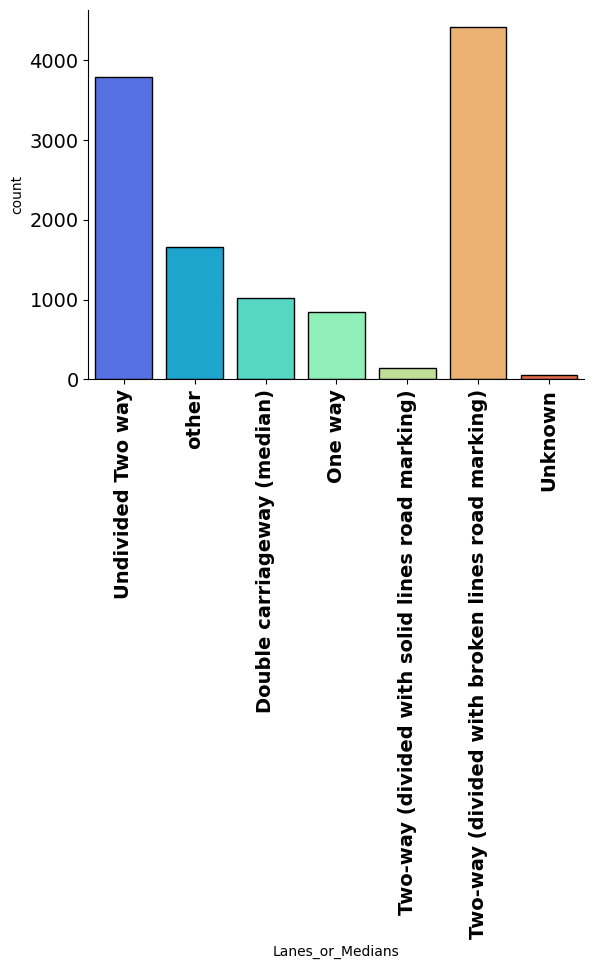

In [ ]:
x=sns.countplot(x=data['Lanes_or_Medians'],palette="rainbow",hue=data['Lanes_or_Medians'],edgecolor="k")
plt.xticks(rotation=90,fontsize=14,fontweight="bold")
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
x.legend_.remove()
plt.show()

In [ ]:
data['Road_allignment'].value_counts()

Road_allignment
Tangent road with flat terrain                   10459
Tangent road with mild grade and flat terrain      501
Steep grade downward with mountainous terrain      429
Tangent road with mountainous terrain and          396
Gentle horizontal curve                            163
Escarpments                                        113
Sharp reverse curve                                 57
Tangent road with rolling terrain                   37
Steep grade upward with mountainous terrain         19
Name: count, dtype: int64

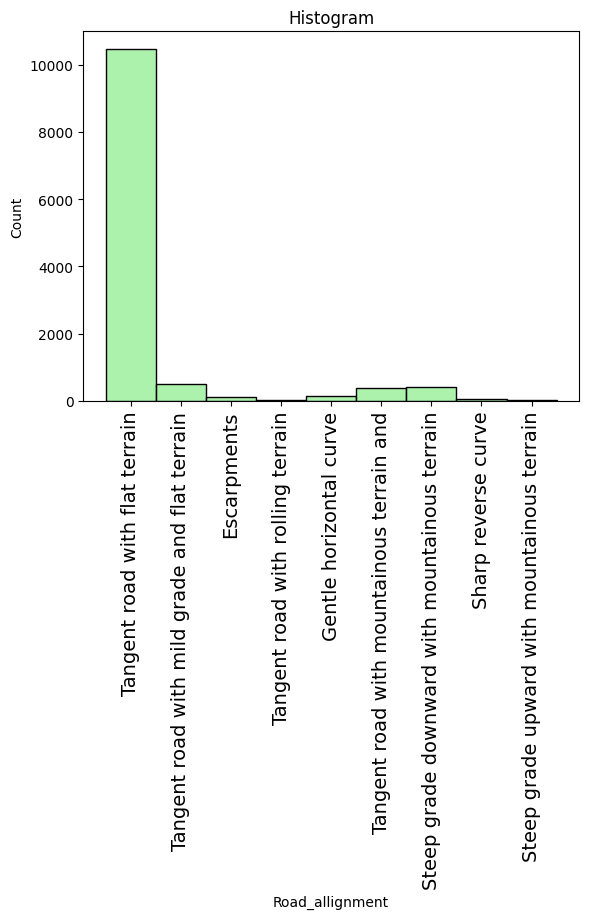

In [ ]:
cp=sns.histplot(x=data['Road_allignment'],color="lightgreen",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Road_allignment")
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
data['Types_of_Junction'].value_counts()

Types_of_Junction
Y Shape        4543
No junction    3837
Crossing       2177
Other           445
Unknown         191
O Shape         164
T Shape          60
X Shape          12
Name: count, dtype: int64

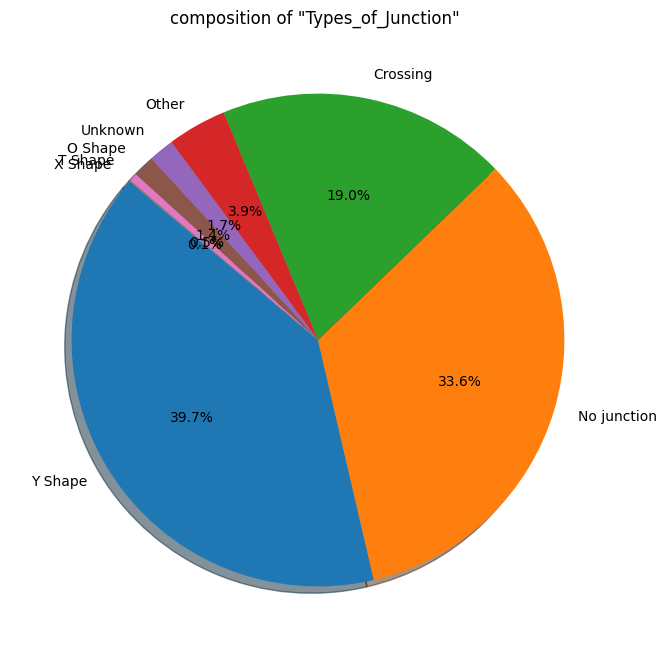

In [ ]:
cp=Types_of_Junction=data['Types_of_Junction'].value_counts()
plt.figure(figsize=(10,8))
fig_1=plt.pie(Types_of_Junction,labels=Types_of_Junction.index,autopct='%1.1f%%',startangle=140,shadow=True)
plt.title('composition of "Types_of_Junction" ')

plt.show()

inference on Accident Area

* majority of accident occured in office areas ratherthan residential areas.
* majority of accidents occured in type of junction and least number of accidents in x type junction

## road and weather

In [ ]:
data['Road_surface_type'].value_counts()

Road_surface_type
Asphalt roads                       11296
Earth roads                           358
Gravel roads                          242
Other                                 167
Asphalt roads with some distress       81
Name: count, dtype: int64

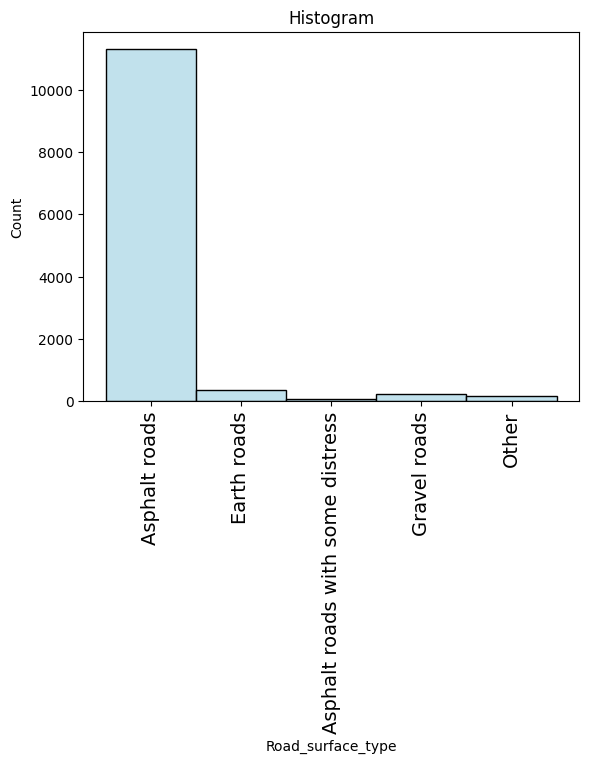

In [ ]:

cp=sns.histplot(x=data['Road_surface_type'],color="lightblue",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Road_surface_type")
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
data['Road_surface_conditions'].value_counts()

Road_surface_conditions
Dry                     9340
Wet or damp             2904
Snow                      70
Flood over 3cm. deep       2
Name: count, dtype: int64

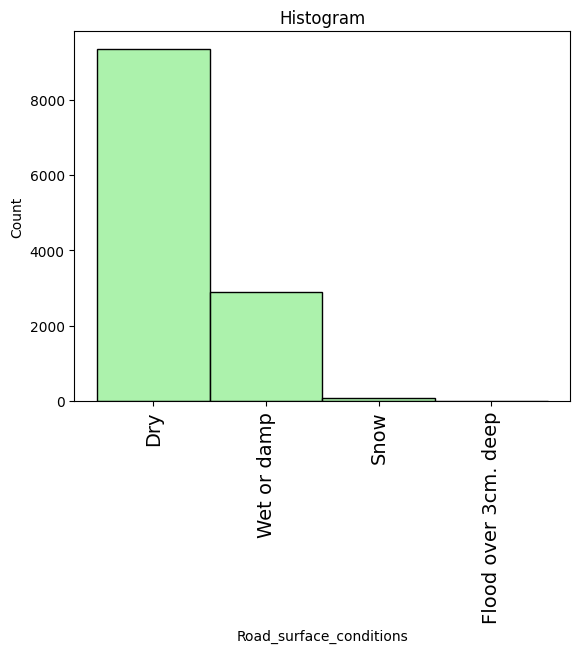

In [ ]:
cp=sns.histplot(x=data['Road_surface_conditions'],color="lightgreen",edgecolor="k")
plt.title("Histogram")
plt.xlabel("Road_surface_conditions")
plt.xticks(rotation=90,fontsize=14)
plt.show()

In [ ]:
data["Weather_conditions"].value_counts()

Weather_conditions
Normal               10063
Raining               1331
Other                  296
Unknown                292
Cloudy                 125
Windy                   98
Snow                    61
Raining and Windy       40
Fog or mist             10
Name: count, dtype: int64

inference on road features

* most of the accidents occured at two-way  lines in dry surface road
* majority of accidents occured in normal day light and in normal whether


## collision

In [ ]:
data["Type_of_collision"].value_counts()


Type_of_collision
Vehicle with vehicle collision             8774
Collision with roadside objects            1786
Collision with pedestrians                  896
Rollover                                    397
Collision with animals                      171
Collision with roadside-parked vehicles      54
Fall from vehicles                           34
Other                                        26
Unknown                                      14
With Train                                    9
Name: count, dtype: int64

In [ ]:
data["Number_of_vehicles_involved"].value_counts()

Number_of_vehicles_involved
2    8340
1    1996
3    1568
4     363
6      42
7       7
Name: count, dtype: int64

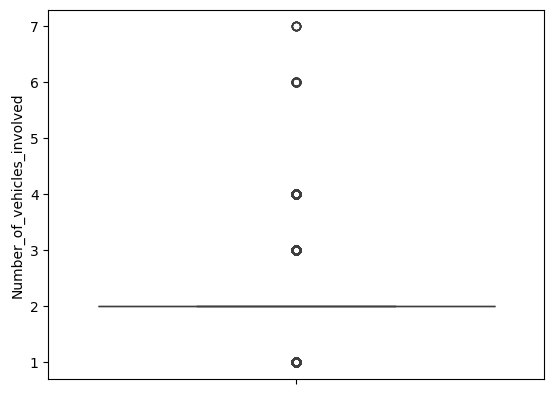

In [ ]:
sns.boxplot(data["Number_of_vehicles_involved"])
plt.show()

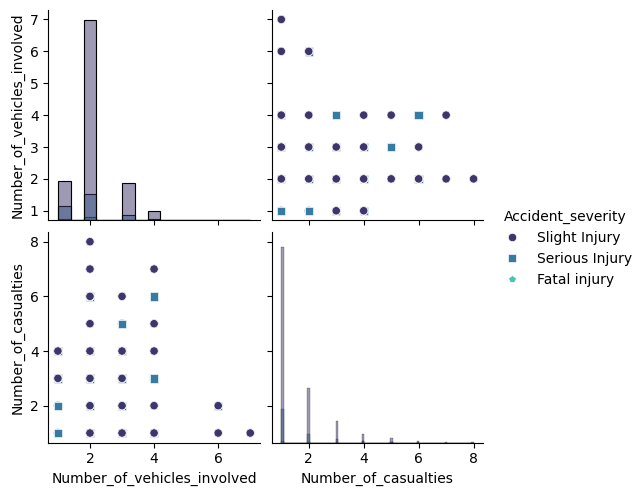

In [ ]:
cp=sns.pairplot(data,hue="Accident_severity",markers=['o',"s","p"],diag_kind="hist",palette="mako")
plt.show()

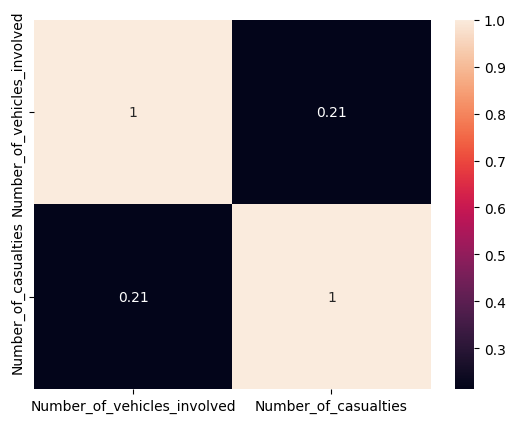

In [ ]:
corr_matrix=data[['Number_of_vehicles_involved',"Number_of_casualties"]].corr()
sns.heatmap(corr_matrix,annot=True)
plt.show()

In [ ]:
data["Vehicle_movement"].value_counts()

Vehicle_movement
Going straight         8158
Moving Backward         985
Other                   937
Reversing               563
Turnover                489
Getting off             339
Entering a junction     193
Overtaking               96
Unknown                  88
Stopping                 61
U-Turn                   50
Waiting to go            39
Parked                   10
Name: count, dtype: int64

inference on type of collision

* majority of accidents occured in vehicle-vehicle coliision
* the number of vehicles involved is 2 in majority of accidents
* major cause of accidents is not keeping sufficient distance between vehicles and lane changing

## cause  of accident

In [ ]:
data["Pedestrian_movement"].value_counts()

Pedestrian_movement
Not a Pedestrian                                                                                                                         11390
Crossing from nearside - masked by parked or statioNot a Pedestrianry vehicle                                                              337
Unknown or other                                                                                                                           293
Crossing from driver's nearside                                                                                                            140
Crossing from offside - masked by  parked or statioNot a Pedestrianry vehicle                                                               72
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing)                                                              46
Walking along in carriageway, back to traffic                                                                                               18
In carriageway, statioNot a Pedestrianry - not crossing  (standing or playing) - masked by parked or statioNot a Pedestrianry vehicle       13
Walking along in carriageway, facing traffic                                                                                                 7
Name: count, dtype: int64

In [ ]:
data["Cause_of_accident"].value_counts()

Cause_of_accident
No distancing                           2263
Changing lane to the right              1808
Changing lane to the left               1473
Driving carelessly                      1402
No priority to vehicle                  1207
Moving Backward                         1137
No priority to pedestrian                721
Other                                    456
Overtaking                               430
Driving under the influence of drugs     340
Driving to the left                      284
Getting off the vehicle improperly       197
Driving at high speed                    174
Overturning                              149
Turnover                                  78
Overspeed                                 61
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

## Target Variable

In [ ]:
data['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: count, dtype: int64

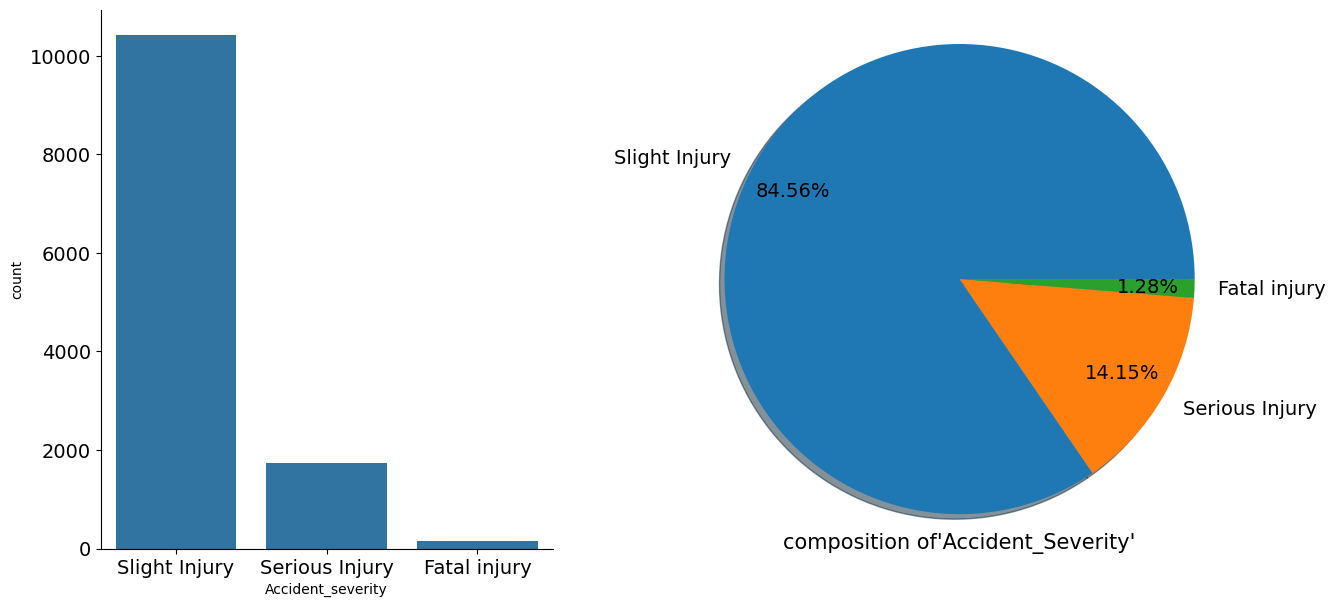

In [ ]:
# cheaking the target - # univariate Analyisis
plt.figure(figsize=(14,7))
#barplot
ax1=plt.subplot(1,2,1)
cp=sns.countplot(x=data["Accident_severity"])
ax1.set_xlabel("Accident_severity")
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
sns.despine(top=True,right=True)
 #pieplot
ax2=plt.subplot(1,2,2)
plt.pie(x=data["Accident_severity"].value_counts(),
        labels=list(data['Accident_severity'].unique()),
        autopct='%2.2f%%',pctdistance=0.8,
        shadow=True,
        radius=1.3,
        textprops={'fontsize':14})
plt.xlabel("composition of'Accident_Severity'",fontsize=15,labelpad=20)
plt.subplots_adjust(wspace=0.4)
plt.show()

inference :
1. 84% of accidents led to slight  injuries
2. There is large different between slight injuries and seroius injuries
3. only 1.3% of people died in accidents . intant deaths are less , most people survived with slight injuries and few survived with very

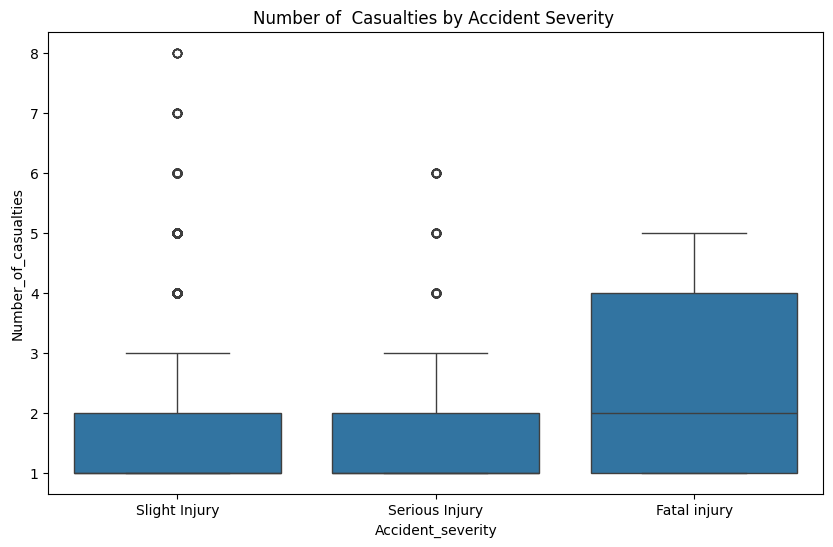

In [ ]:
# Bivariate Analysis
plt.figure(figsize=(10,6))
sns.boxplot(x='Accident_severity',y="Number_of_casualties",data=data)
plt.title("Number of  Casualties by Accident Severity ")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: UserWarning: 
The palette list has fewer values (3) than needed (6) and will cycle, which may produce an uninterpretable plot.
  func(*plot_args, **plot_kwargs)


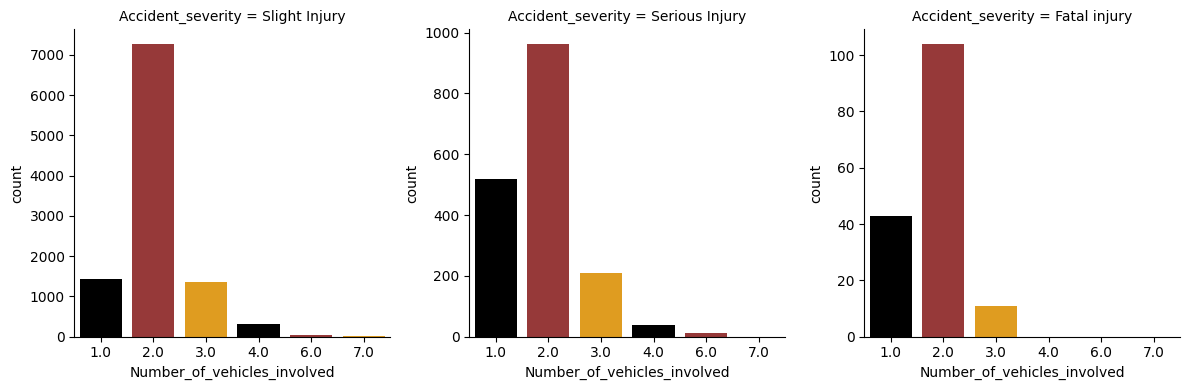

In [ ]:
# creating a facet grid with columns as survived=0, survived =1
grid=sns.FacetGrid(data=data,col="Accident_severity",height=4,aspect=1,sharey=False)
#mapping barplot and the data on the grid
grid.map(sns.countplot,"Number_of_vehicles_involved",palette=["black","brown","orange"],hue=data["Number_of_vehicles_involved"])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

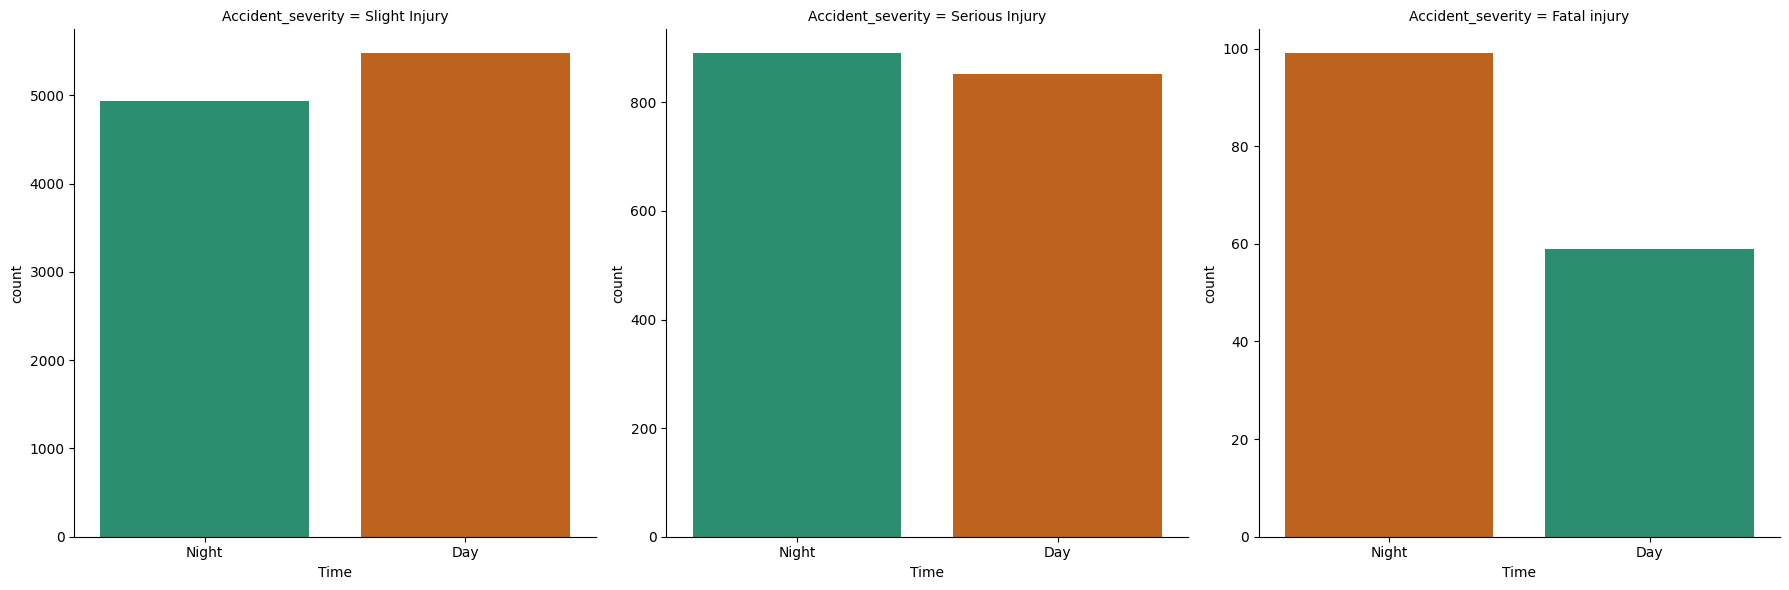

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

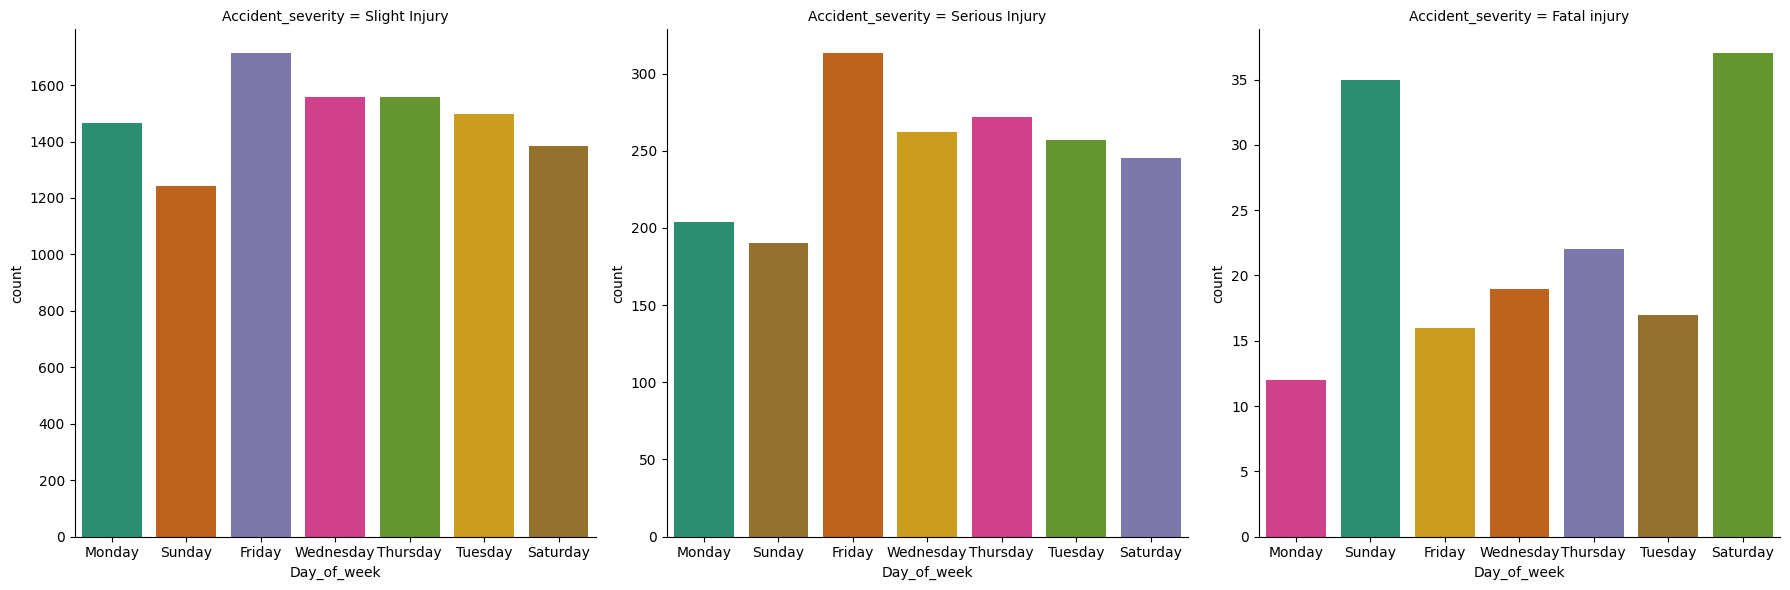

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

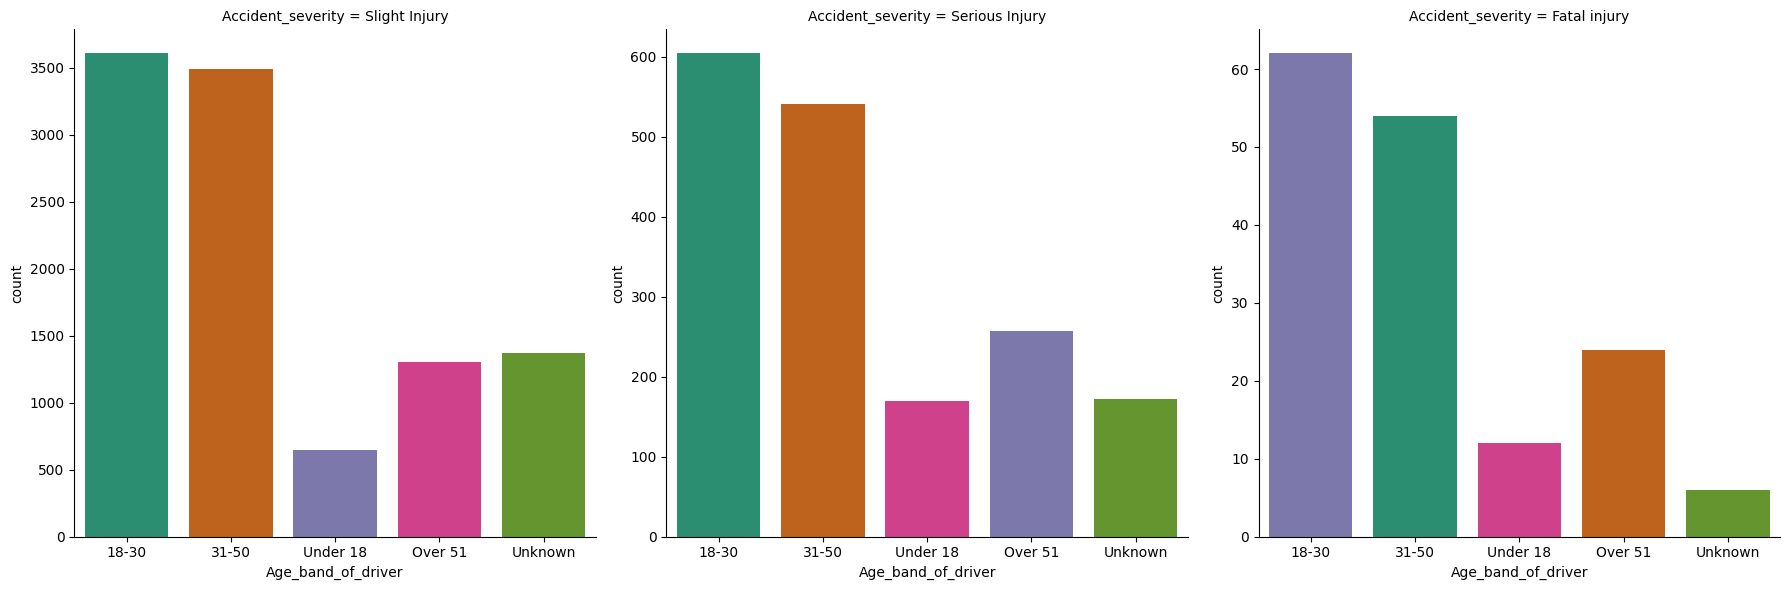

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

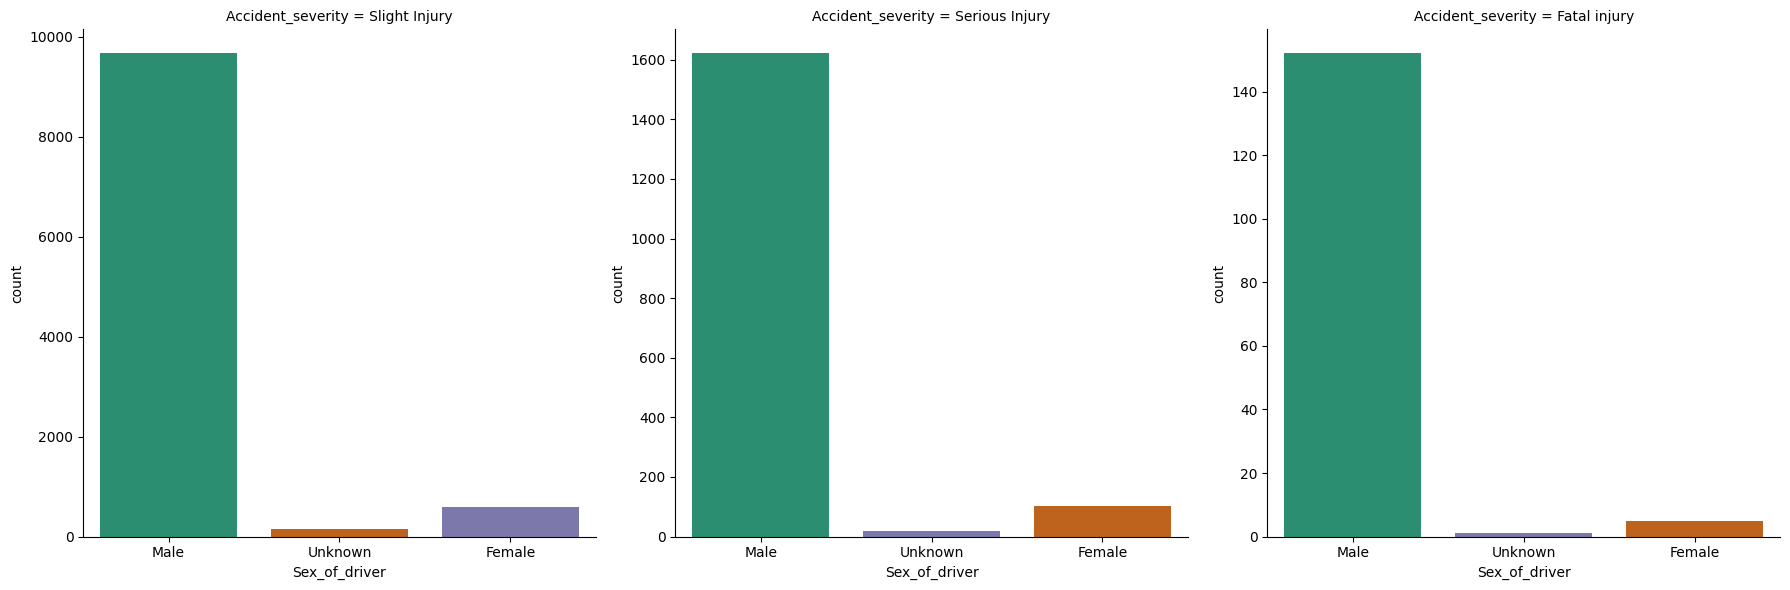

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

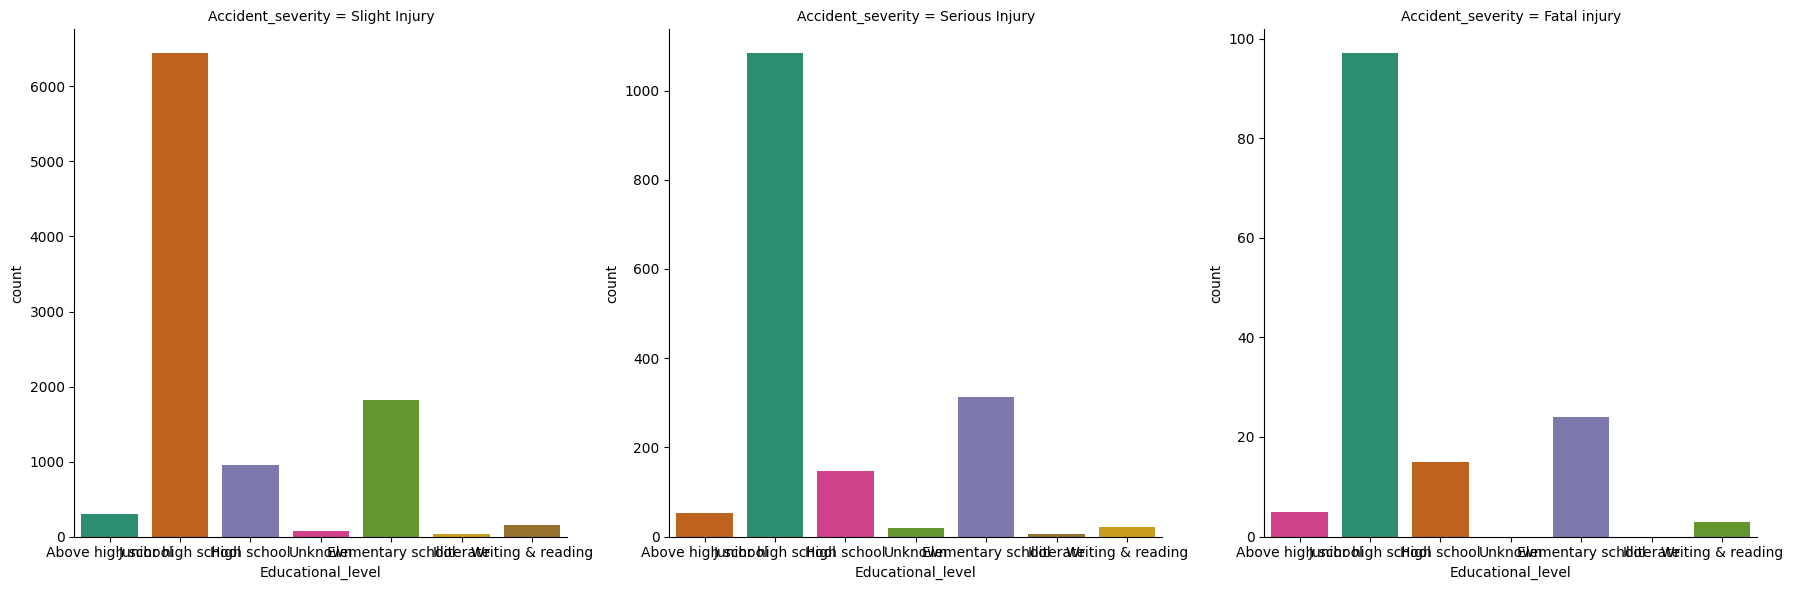

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

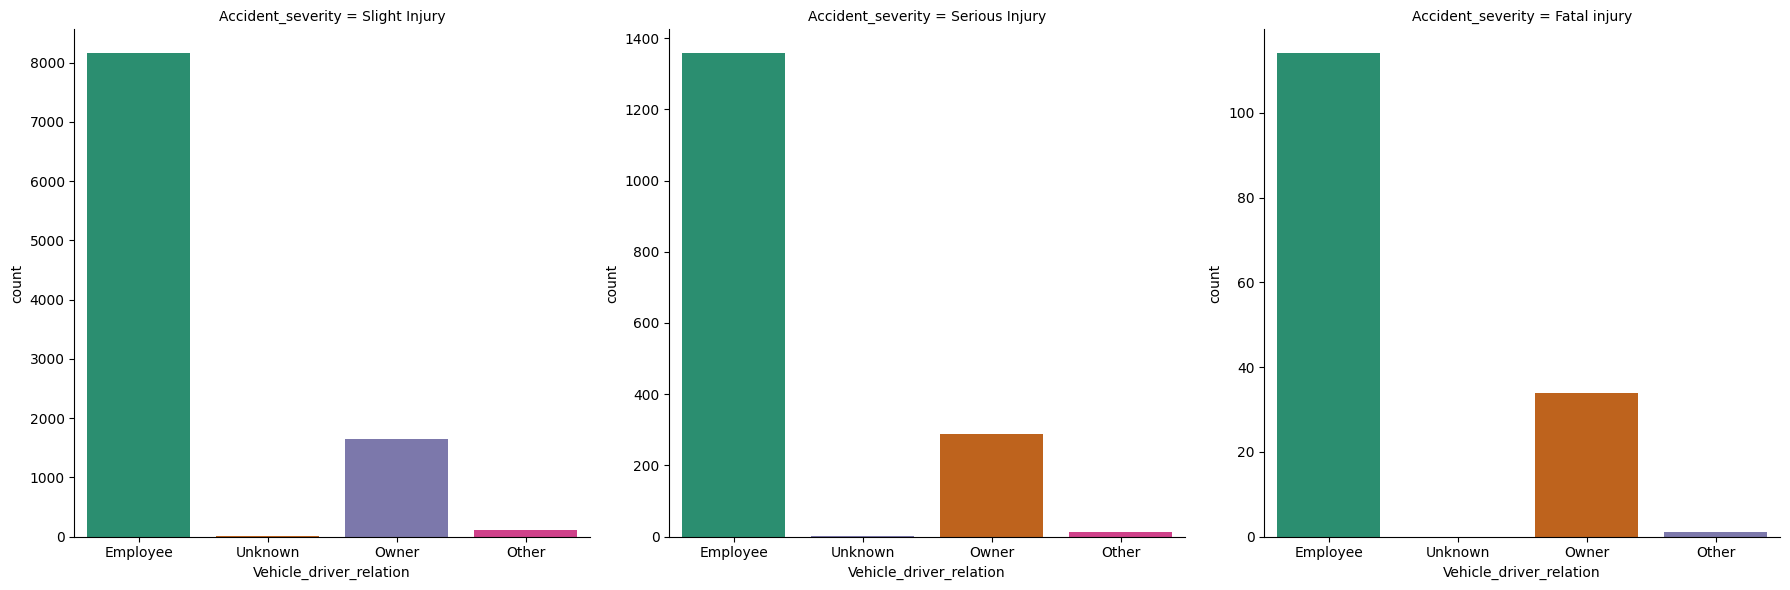

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

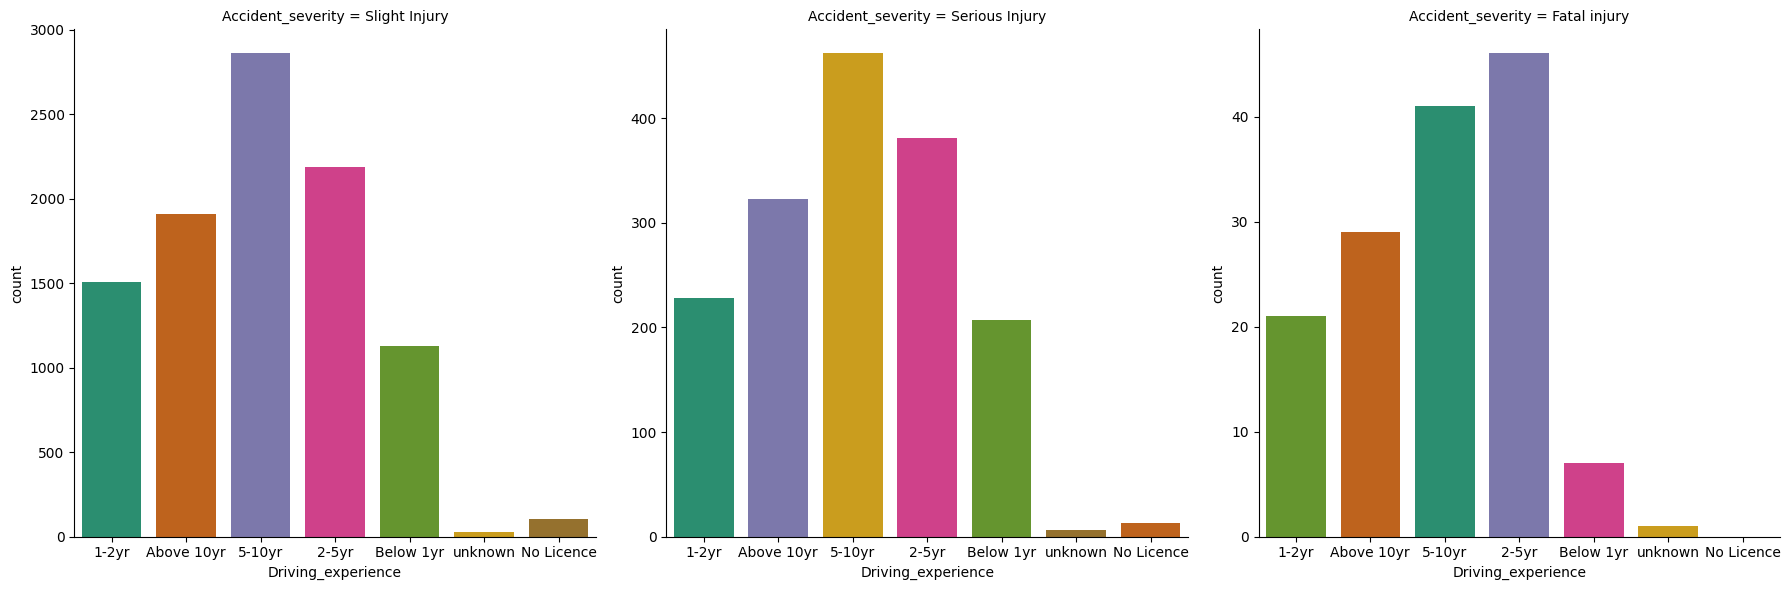

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

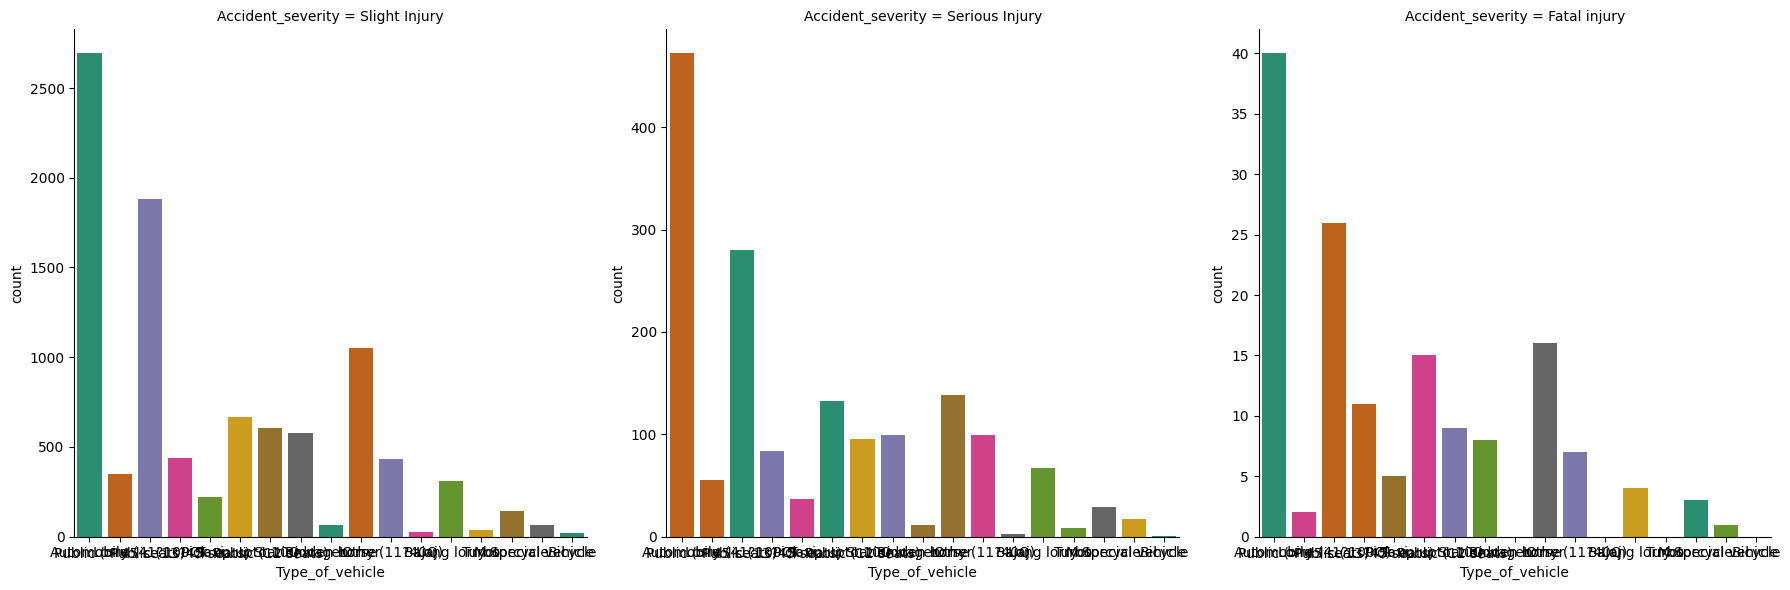

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

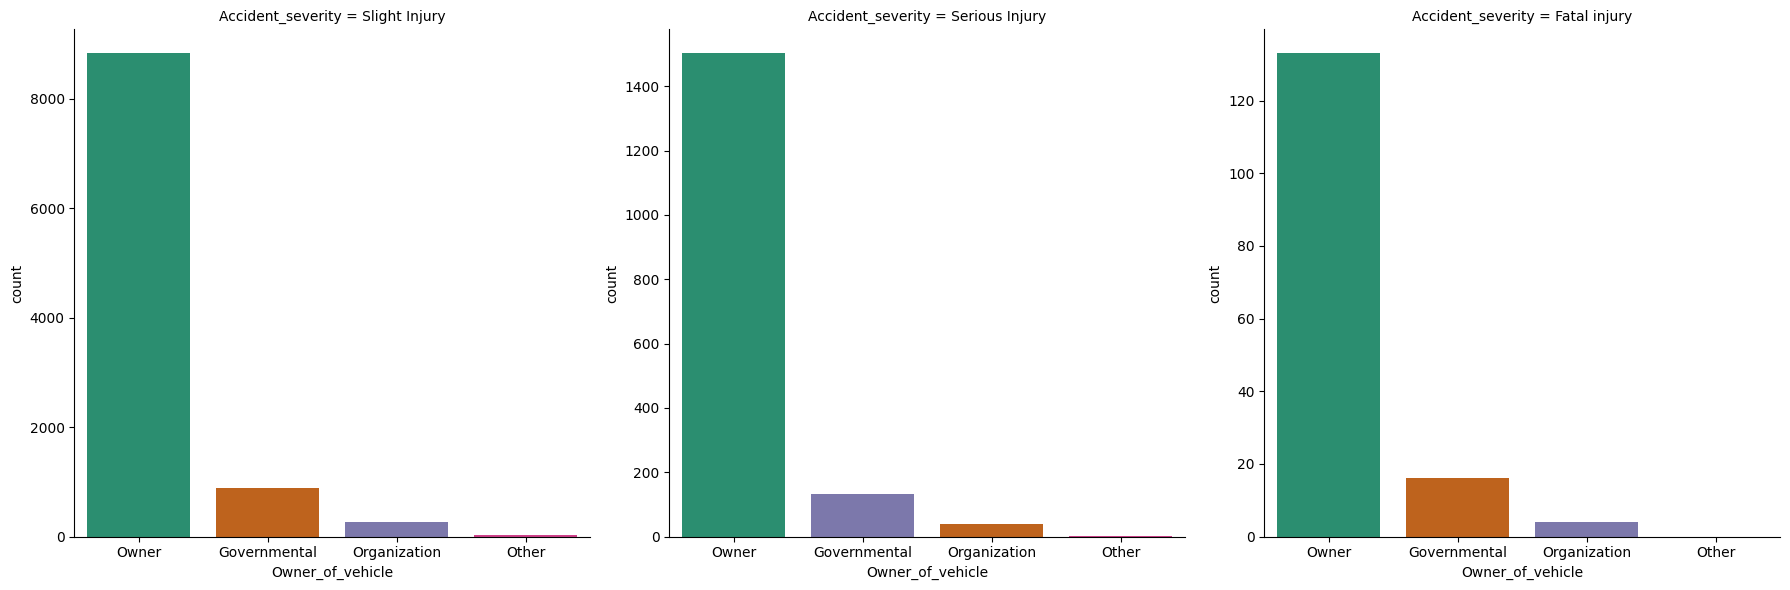

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

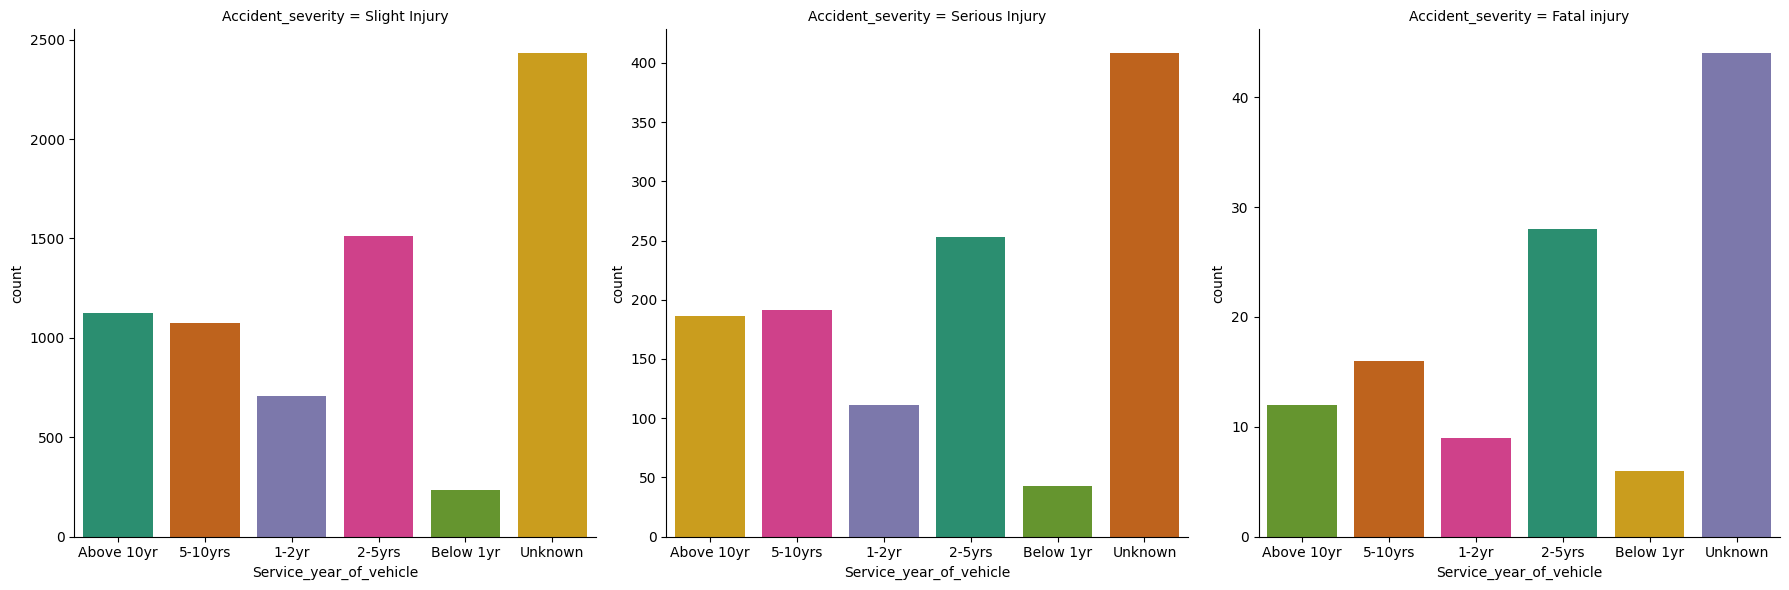

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

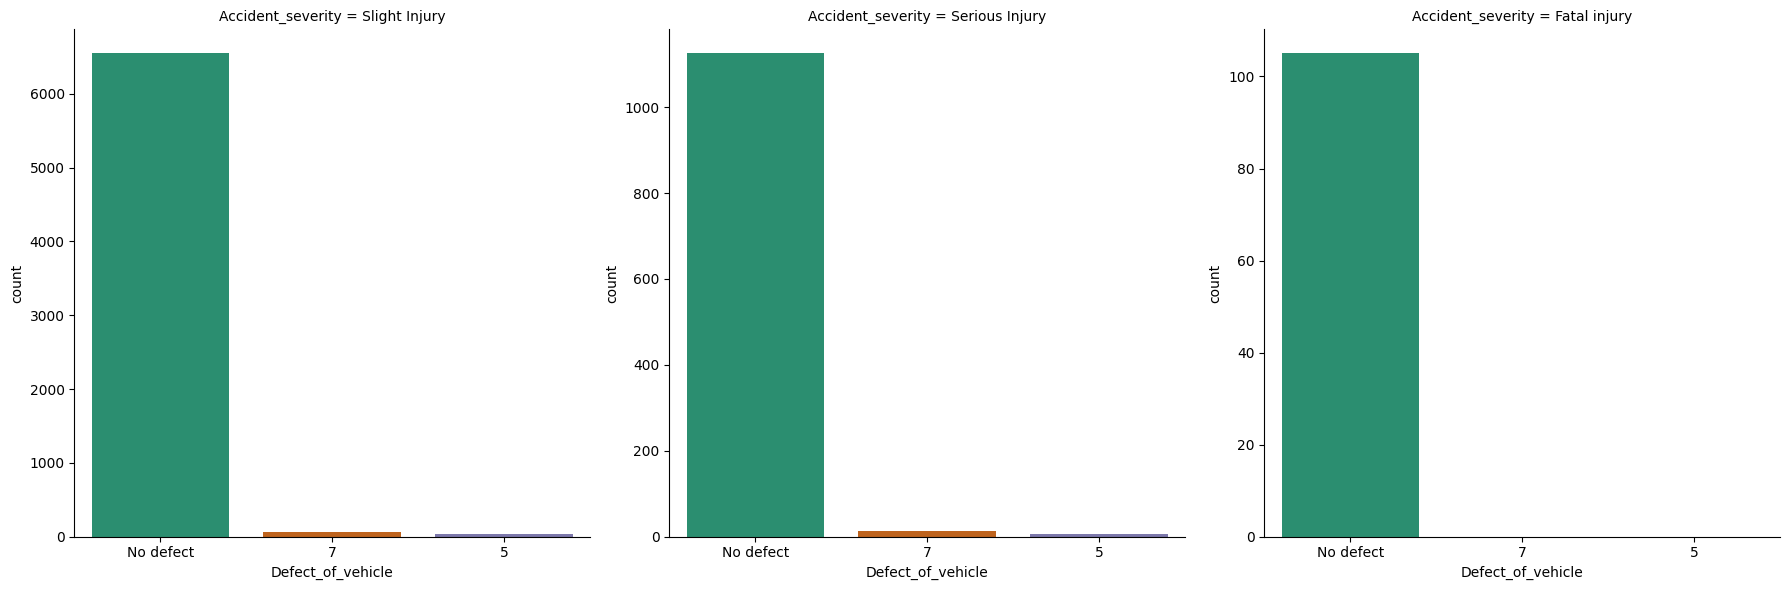

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

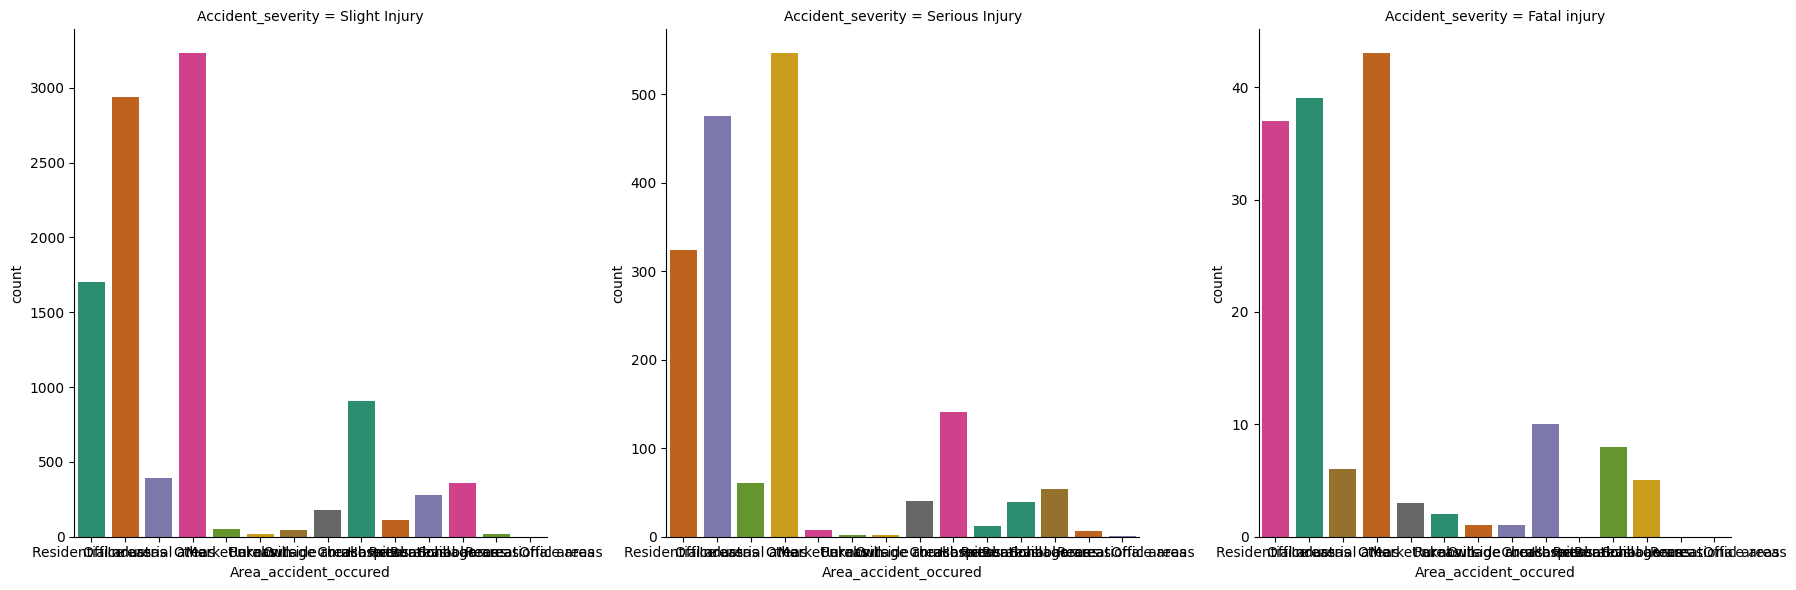

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

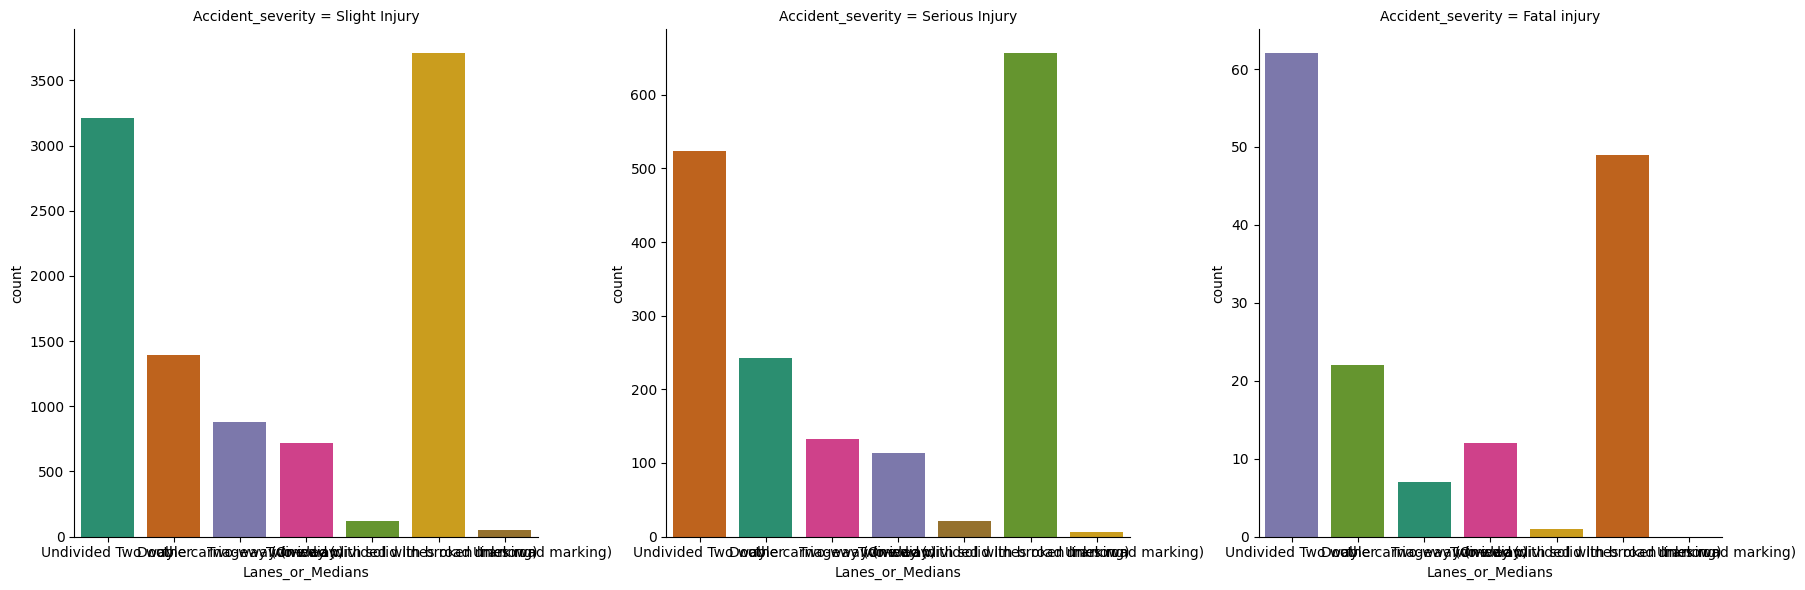

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

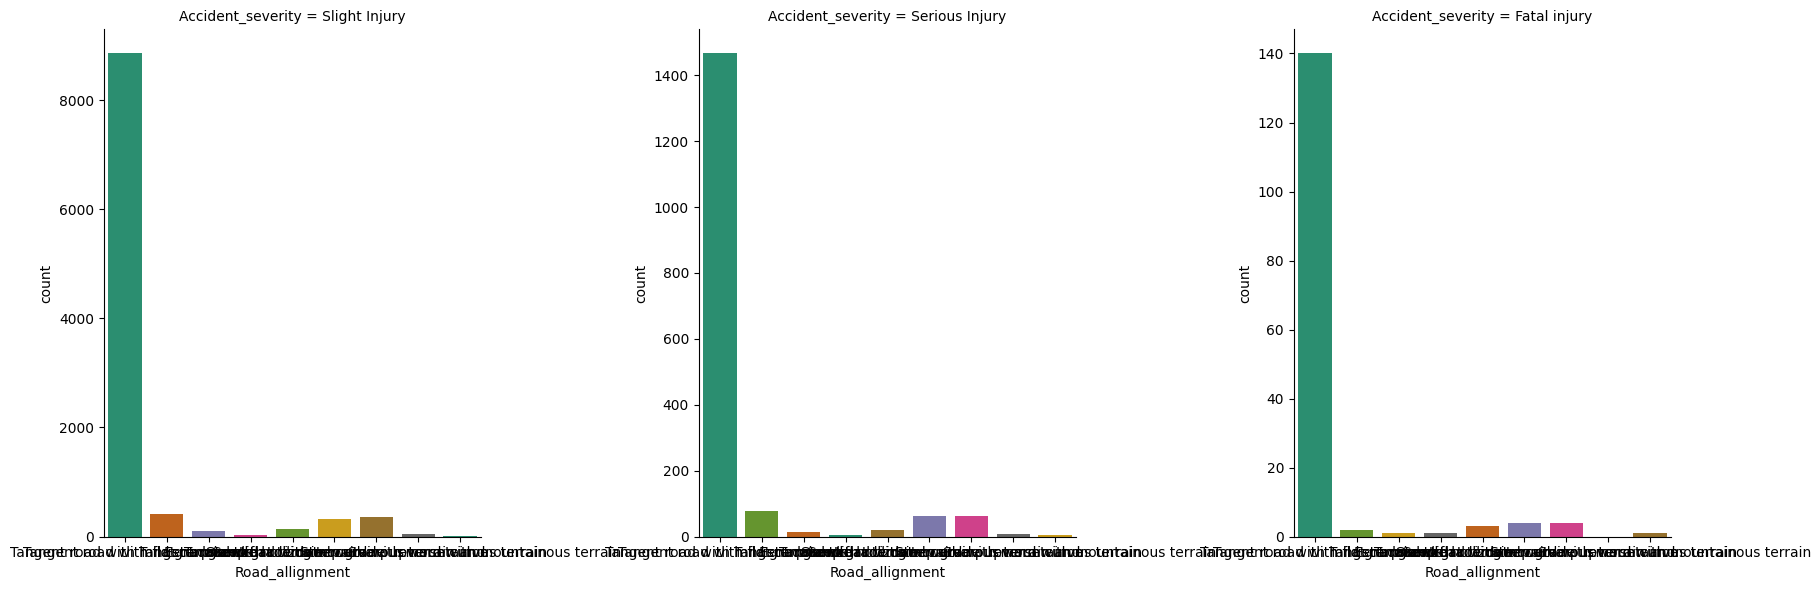

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

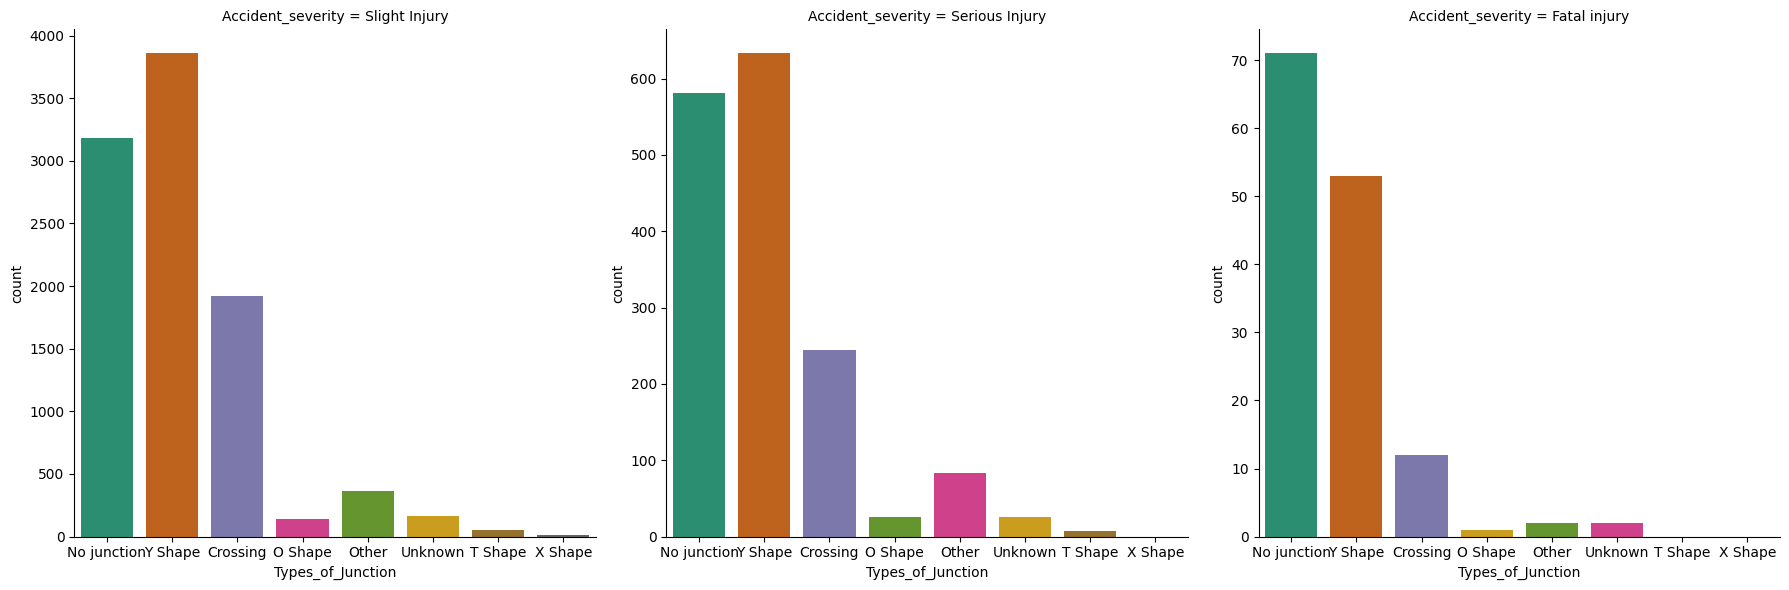

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

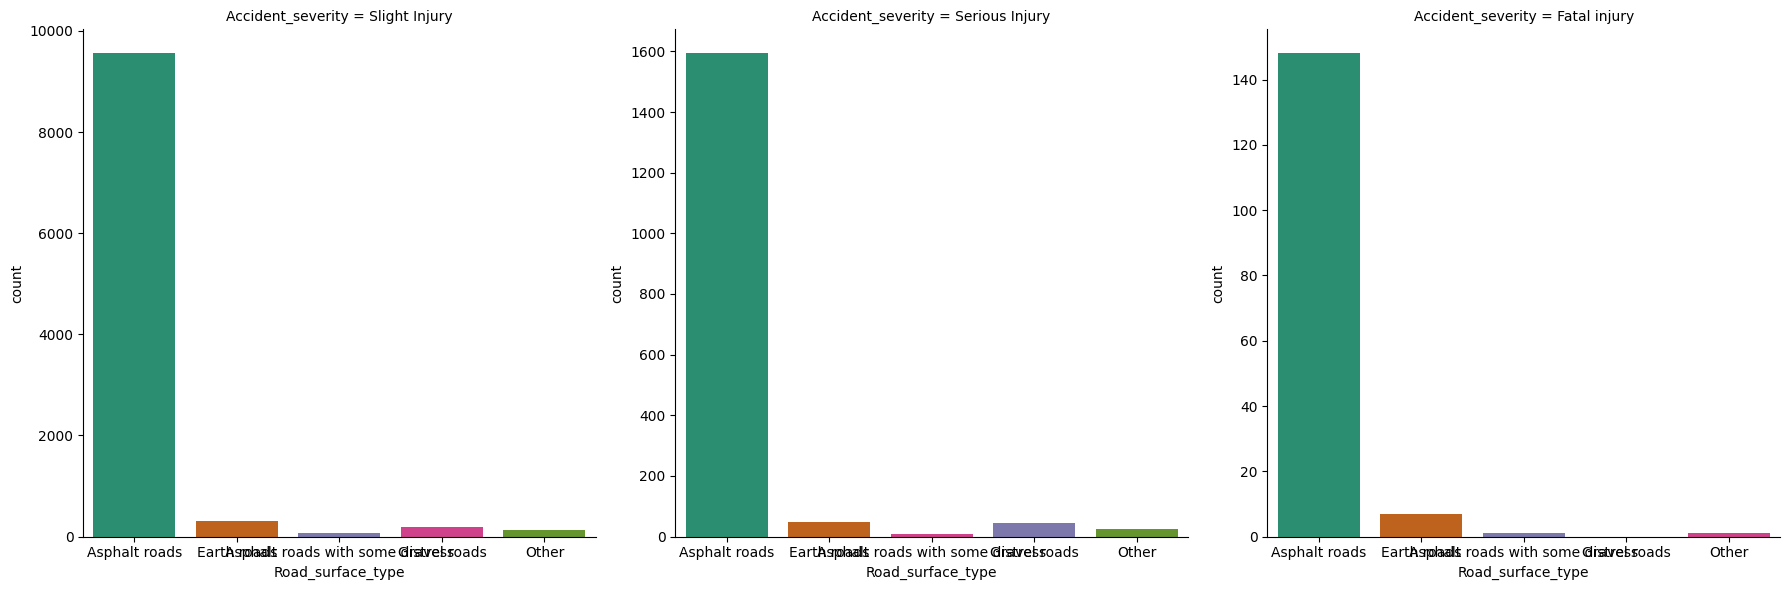

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

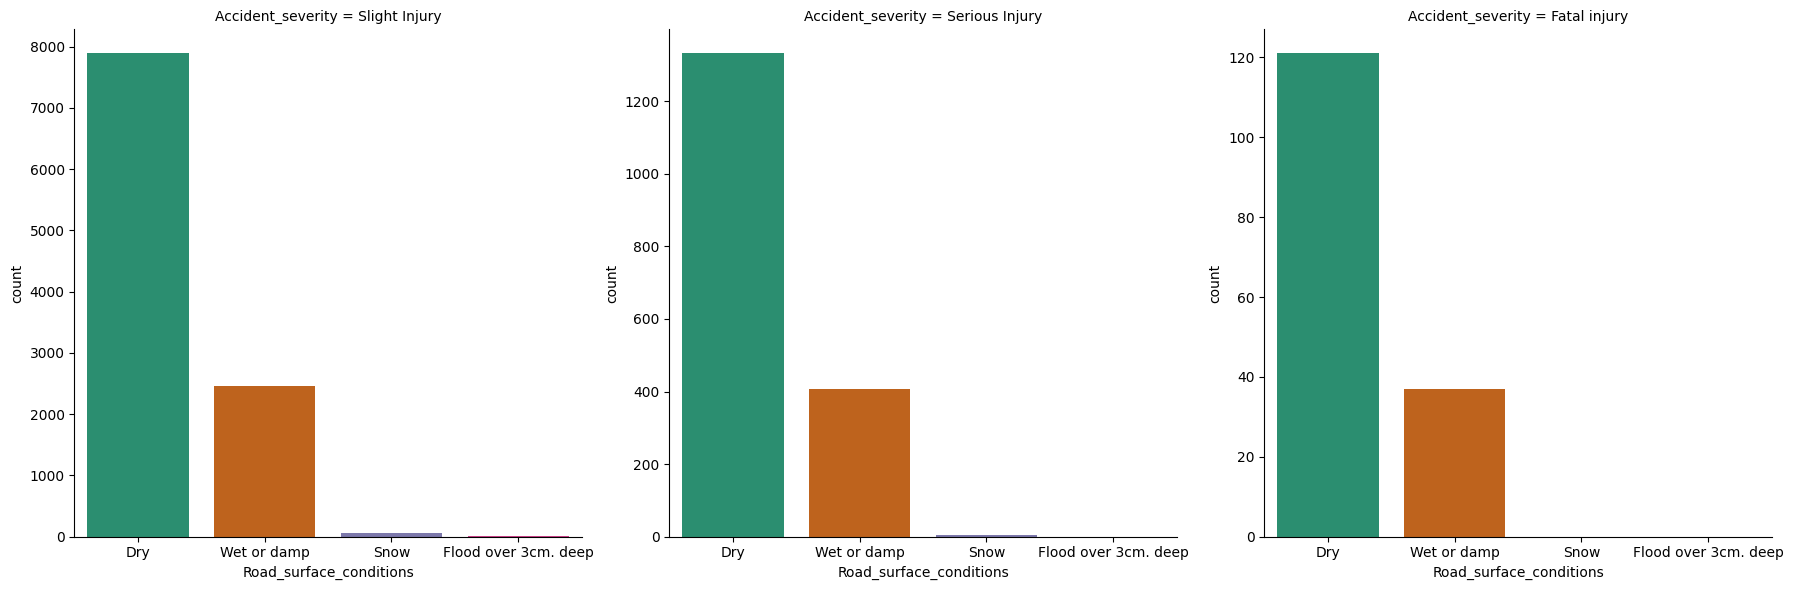

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

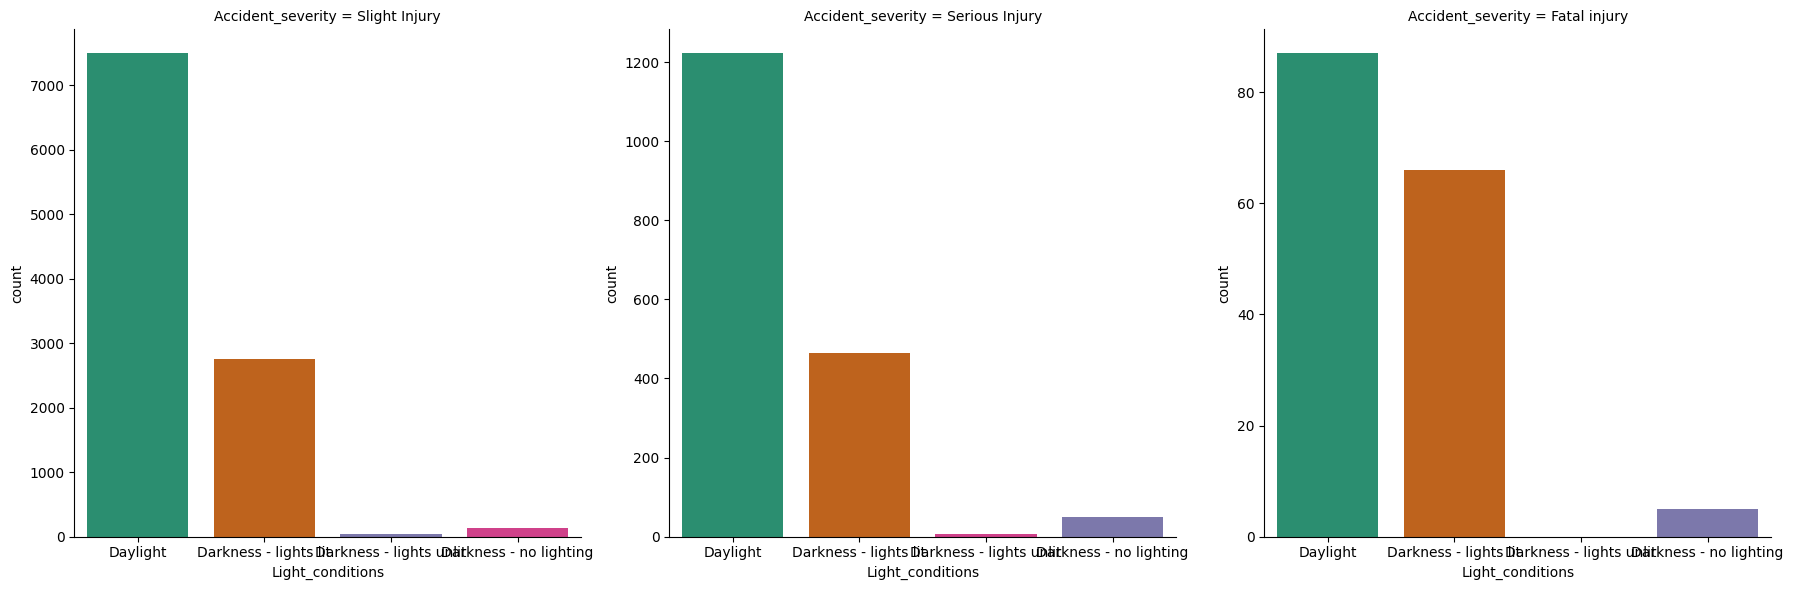

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

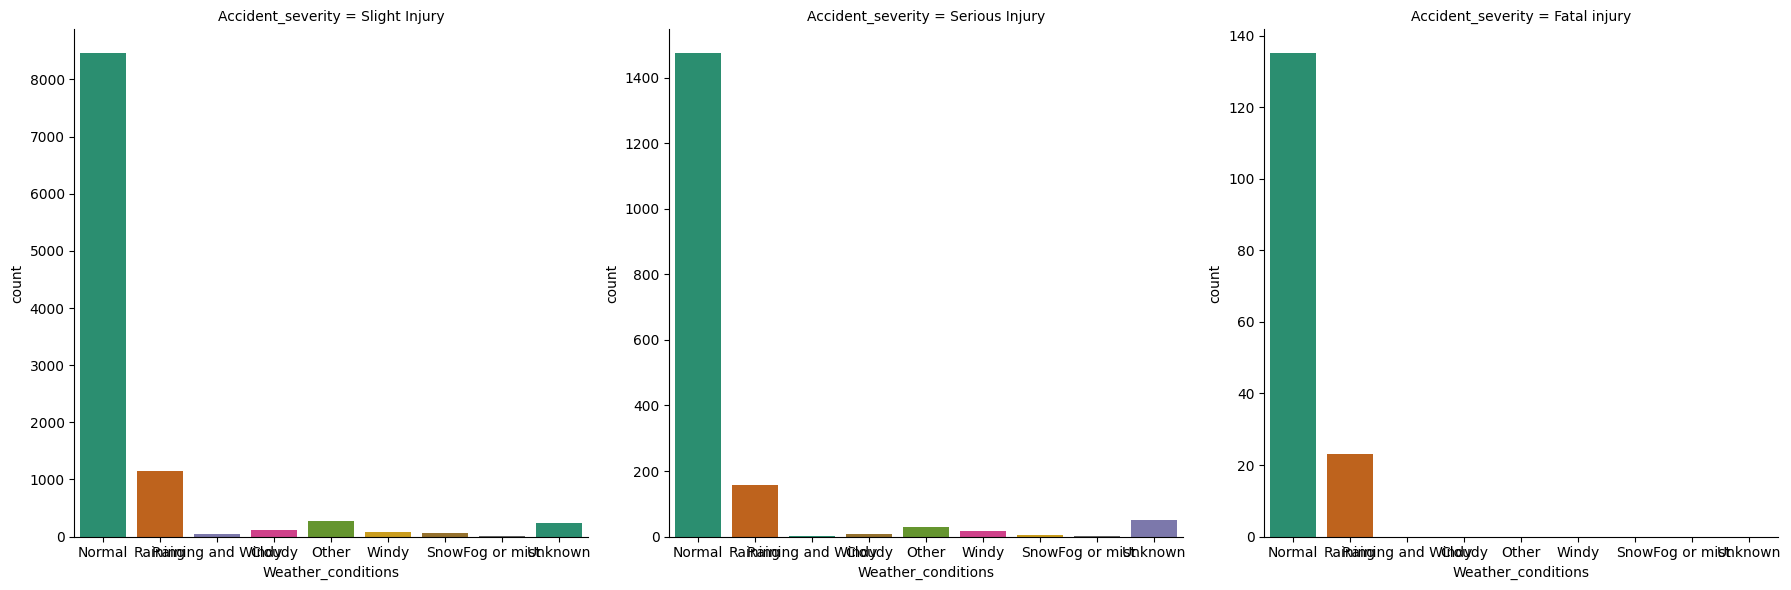

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

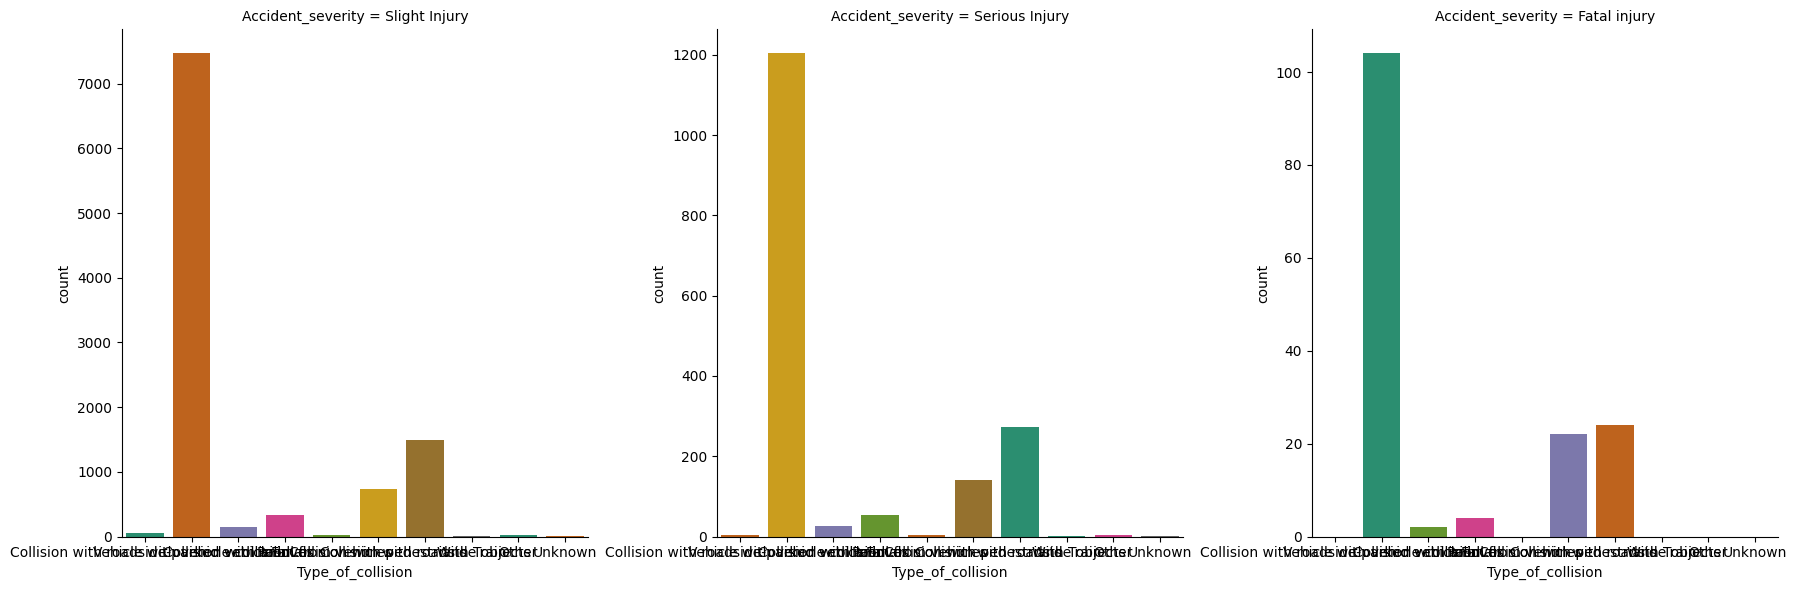

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

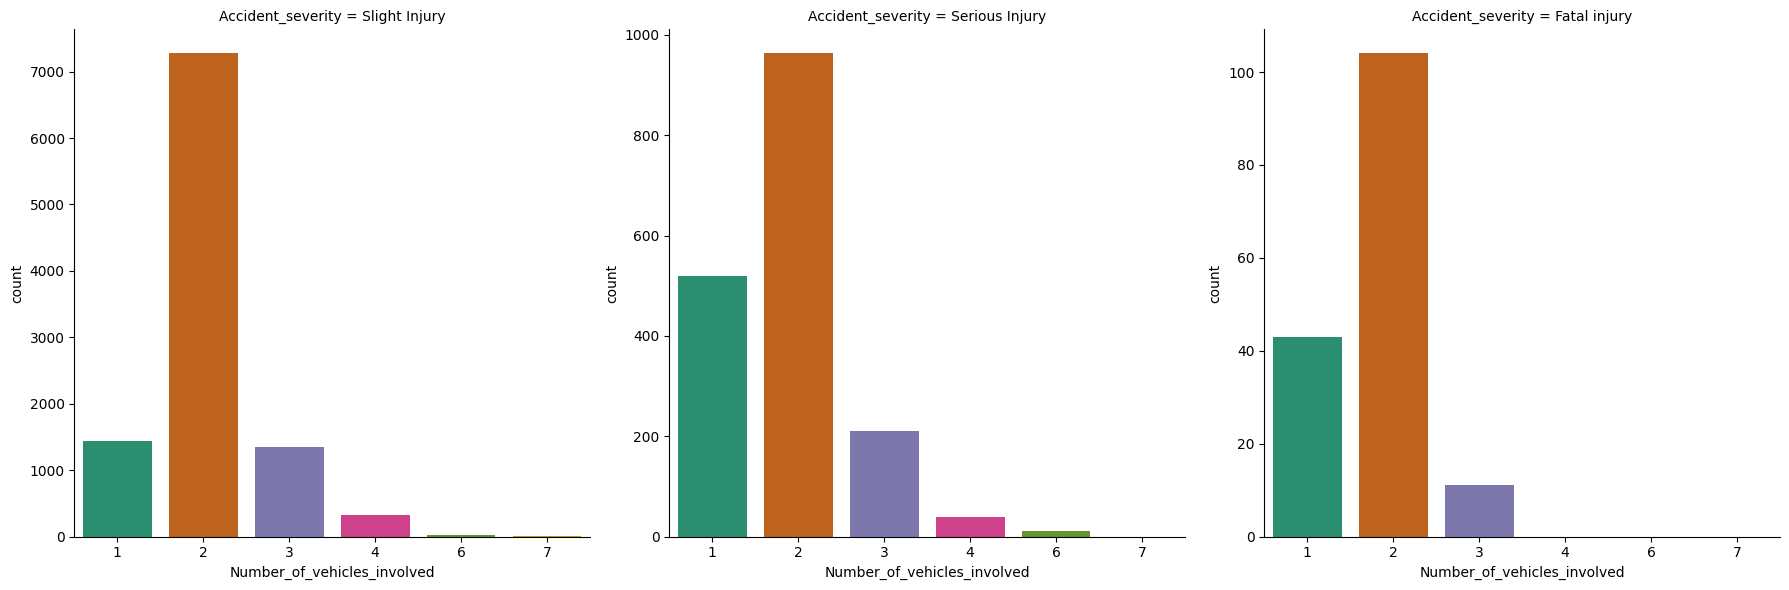

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

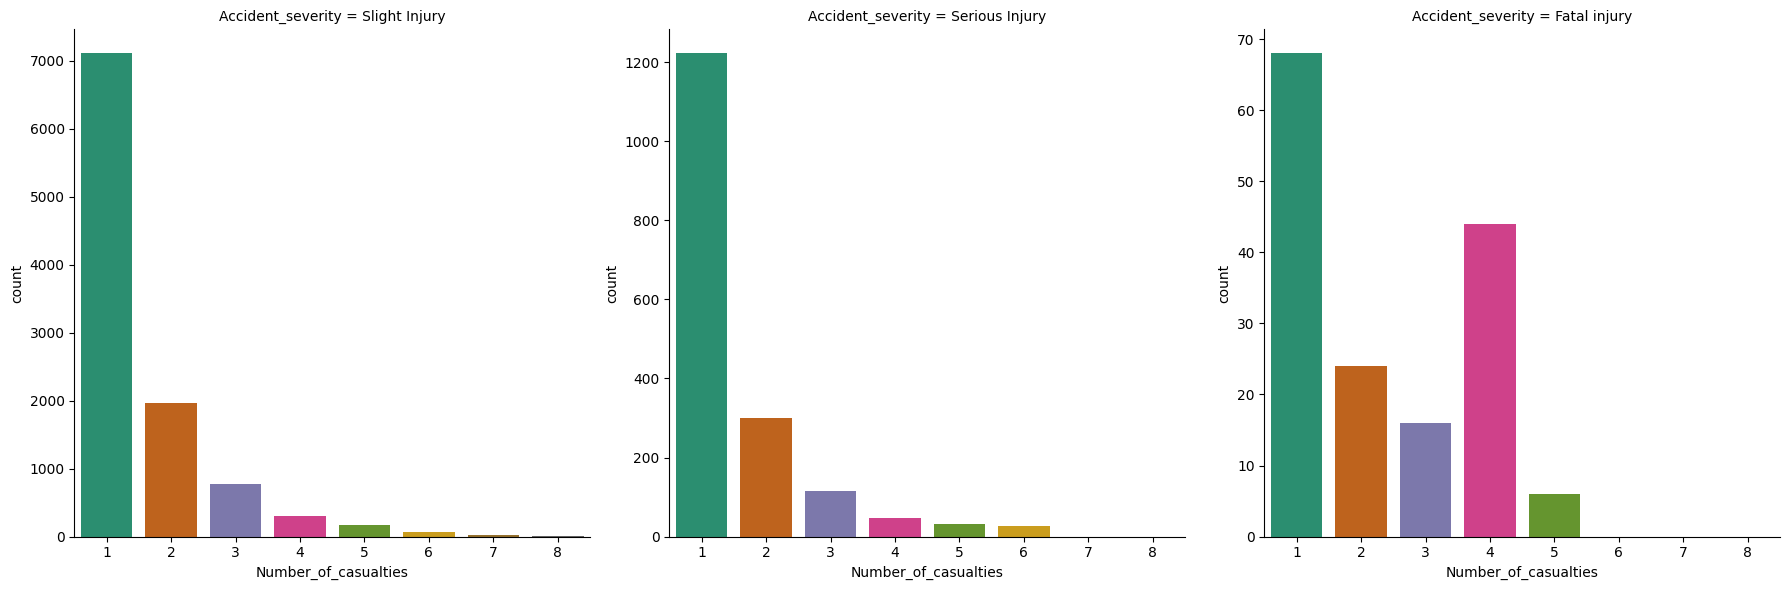

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

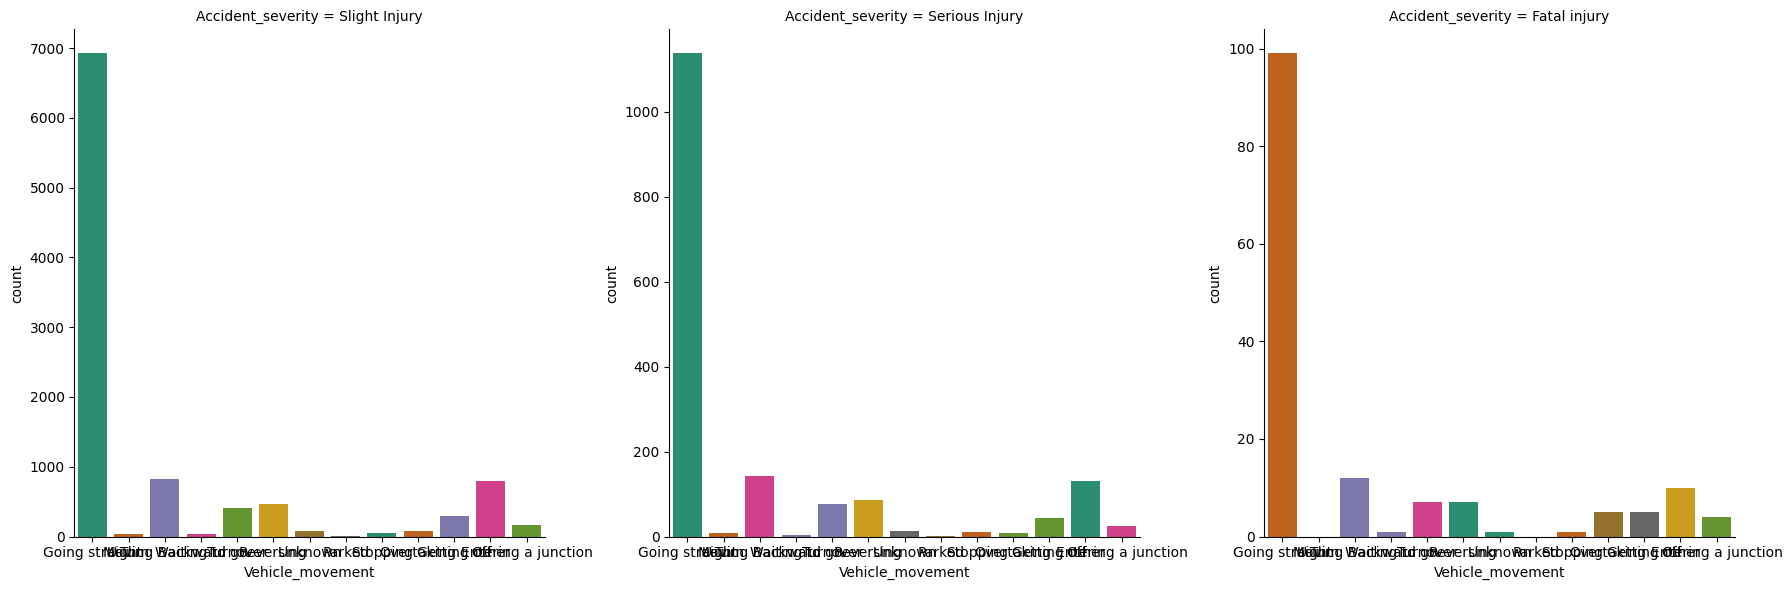

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

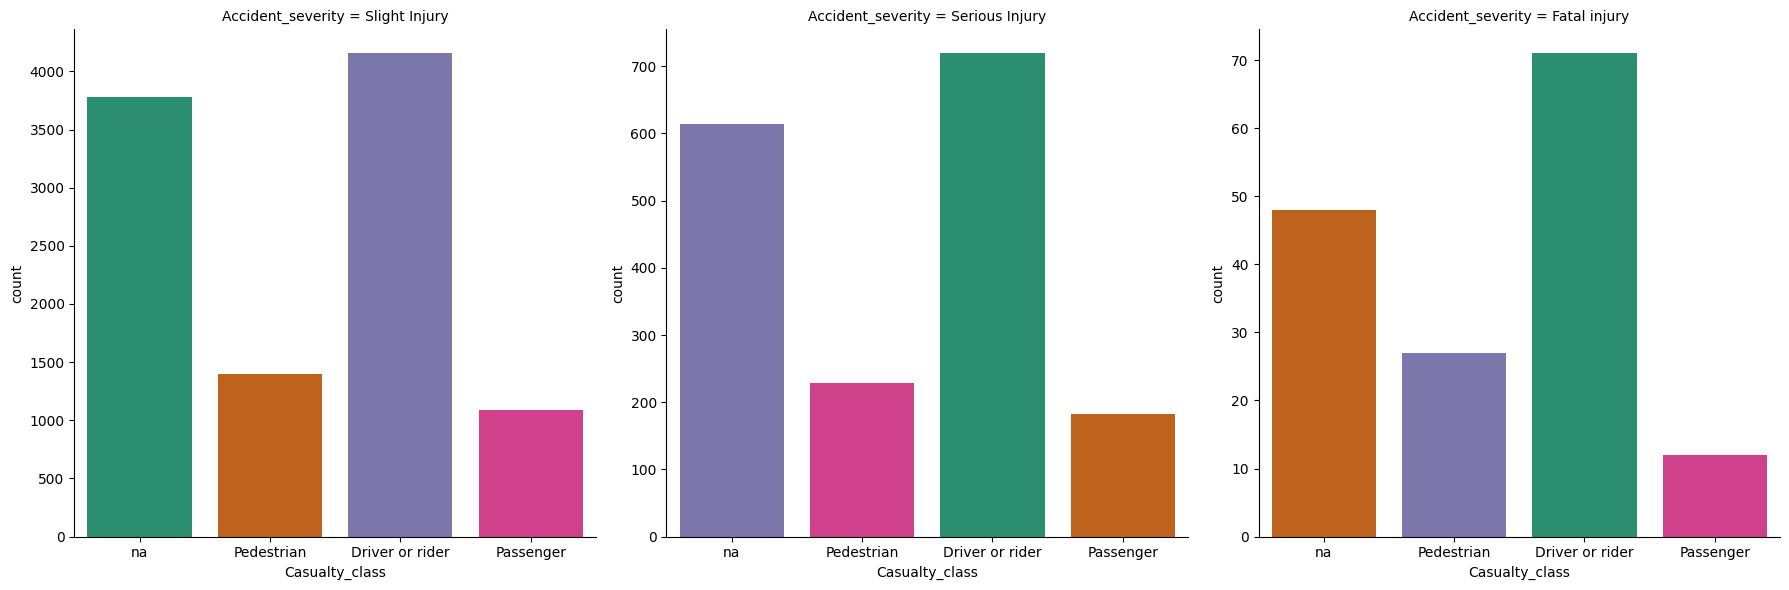

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

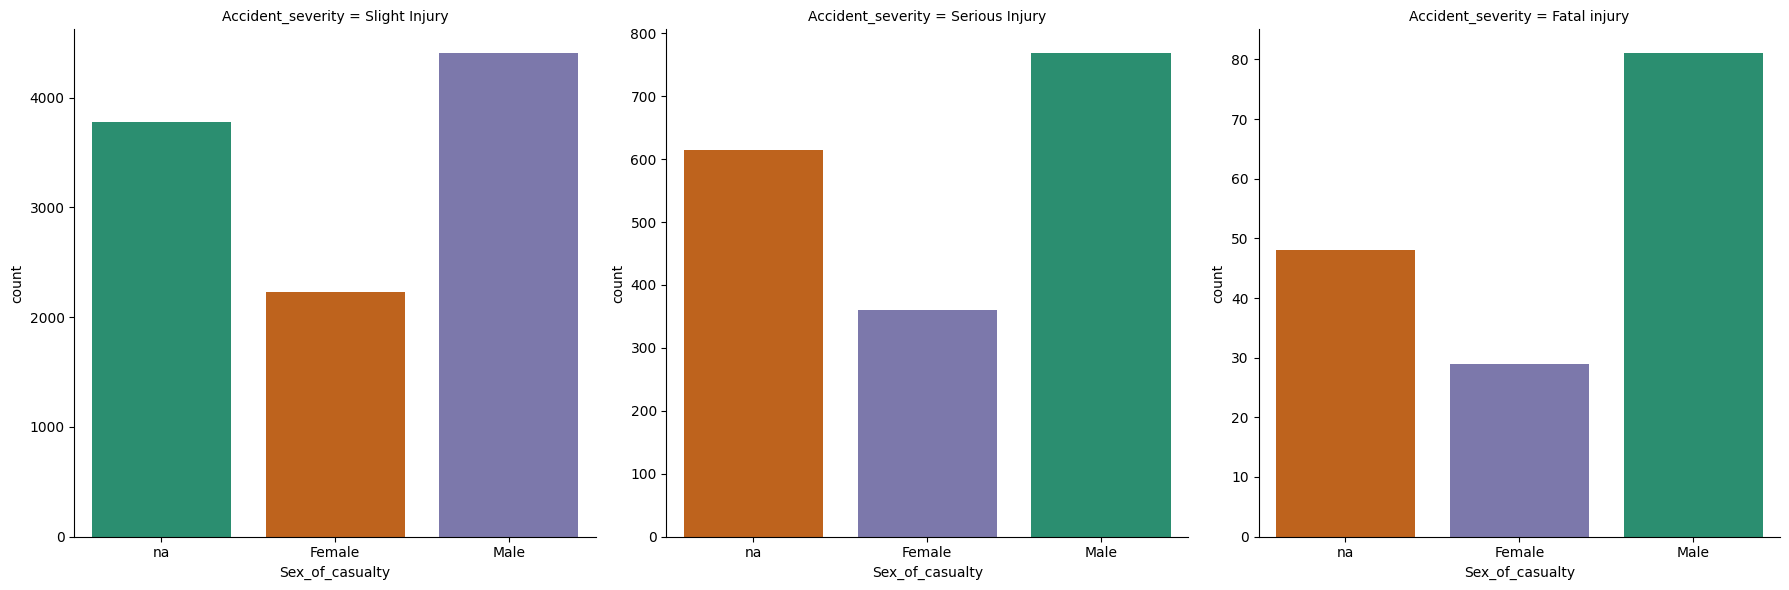

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

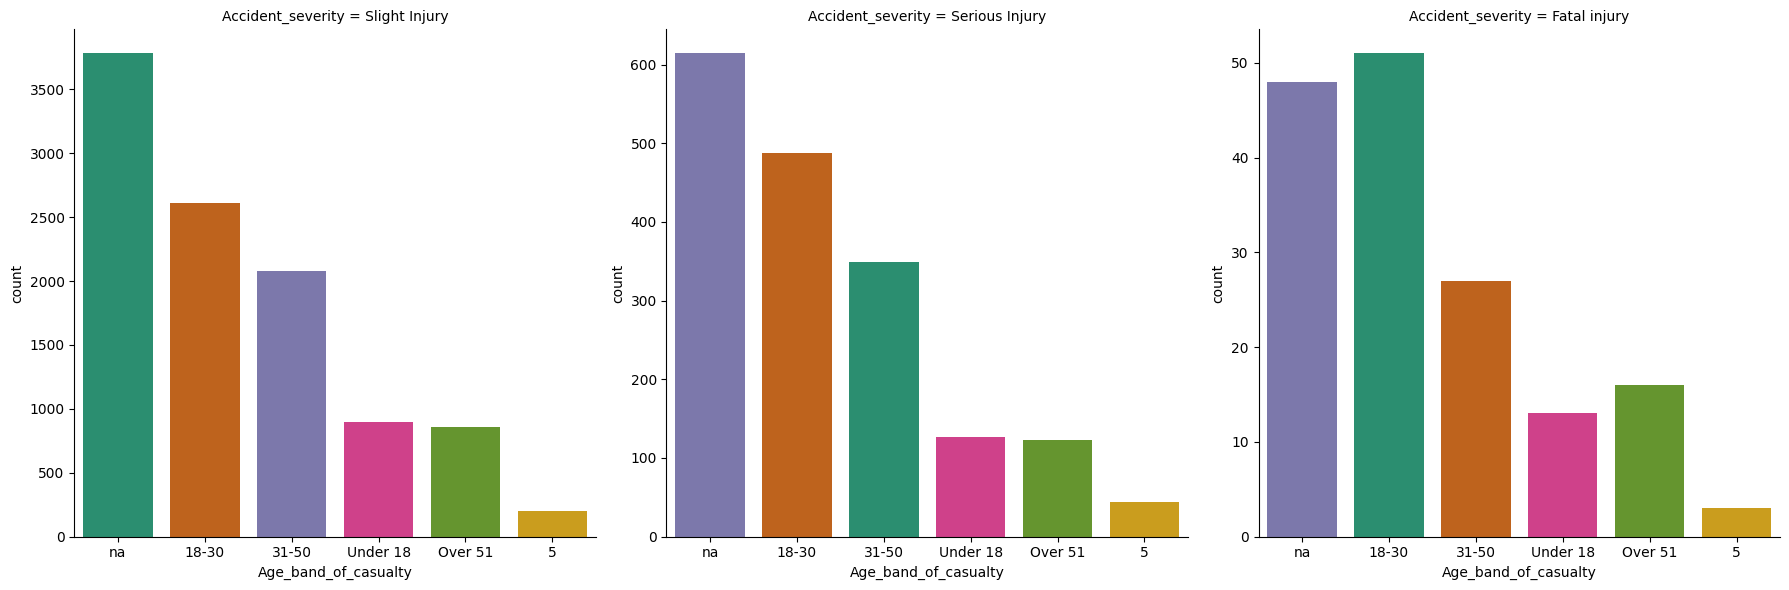

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

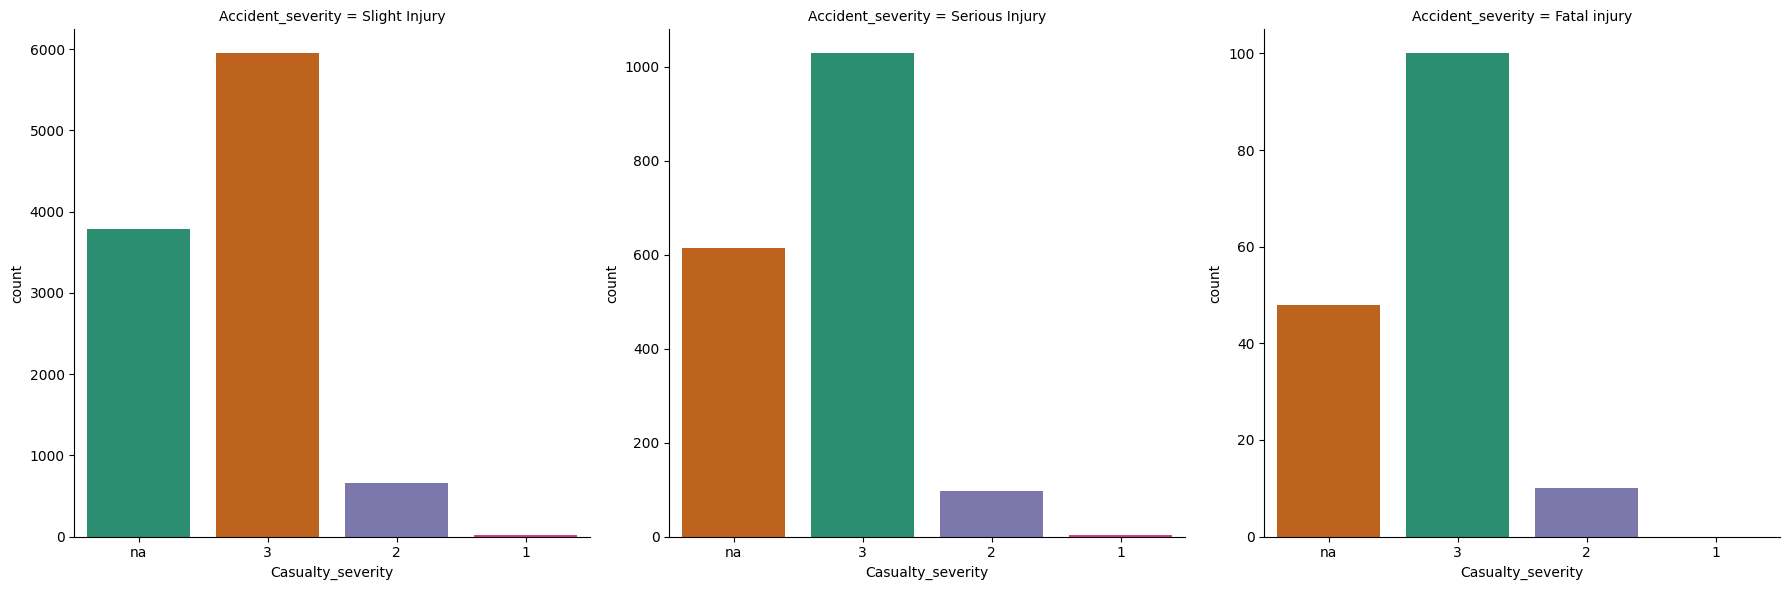

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

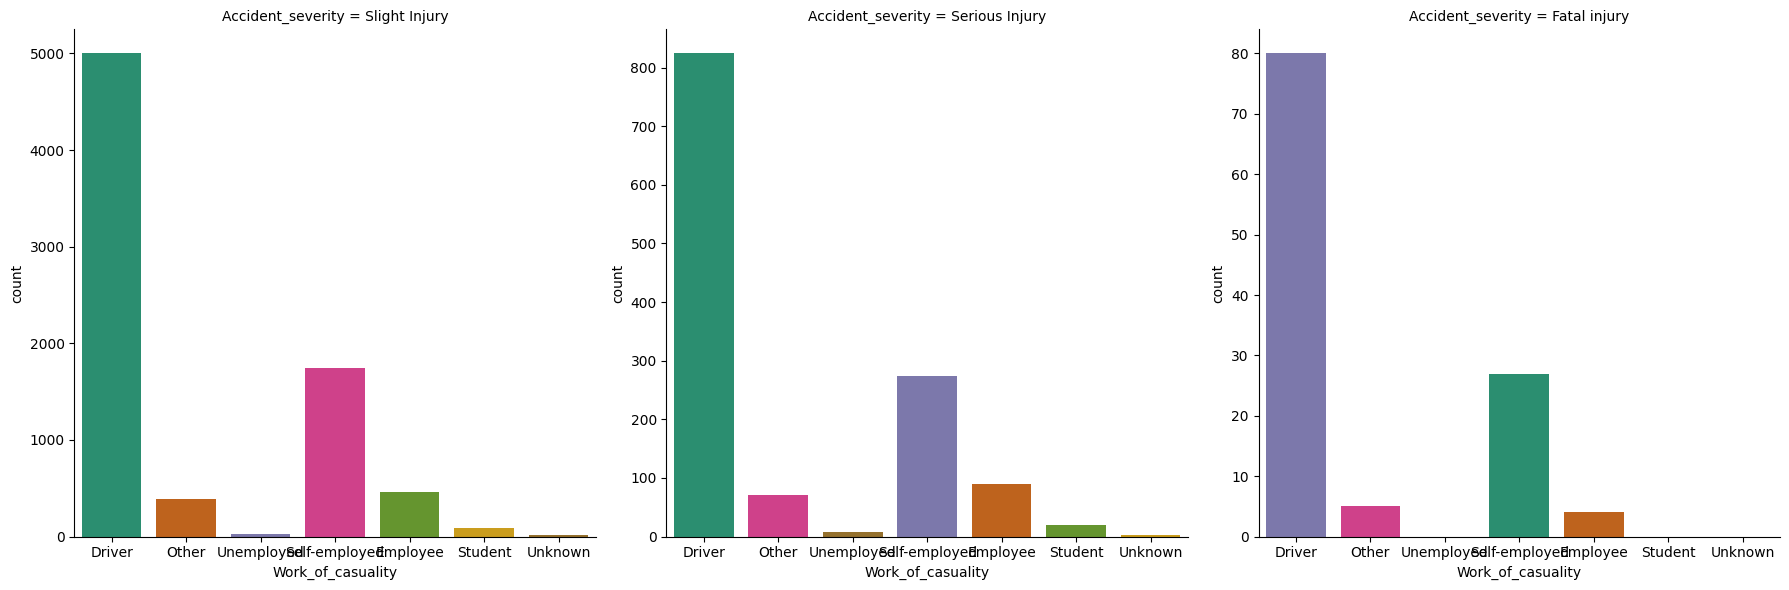

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

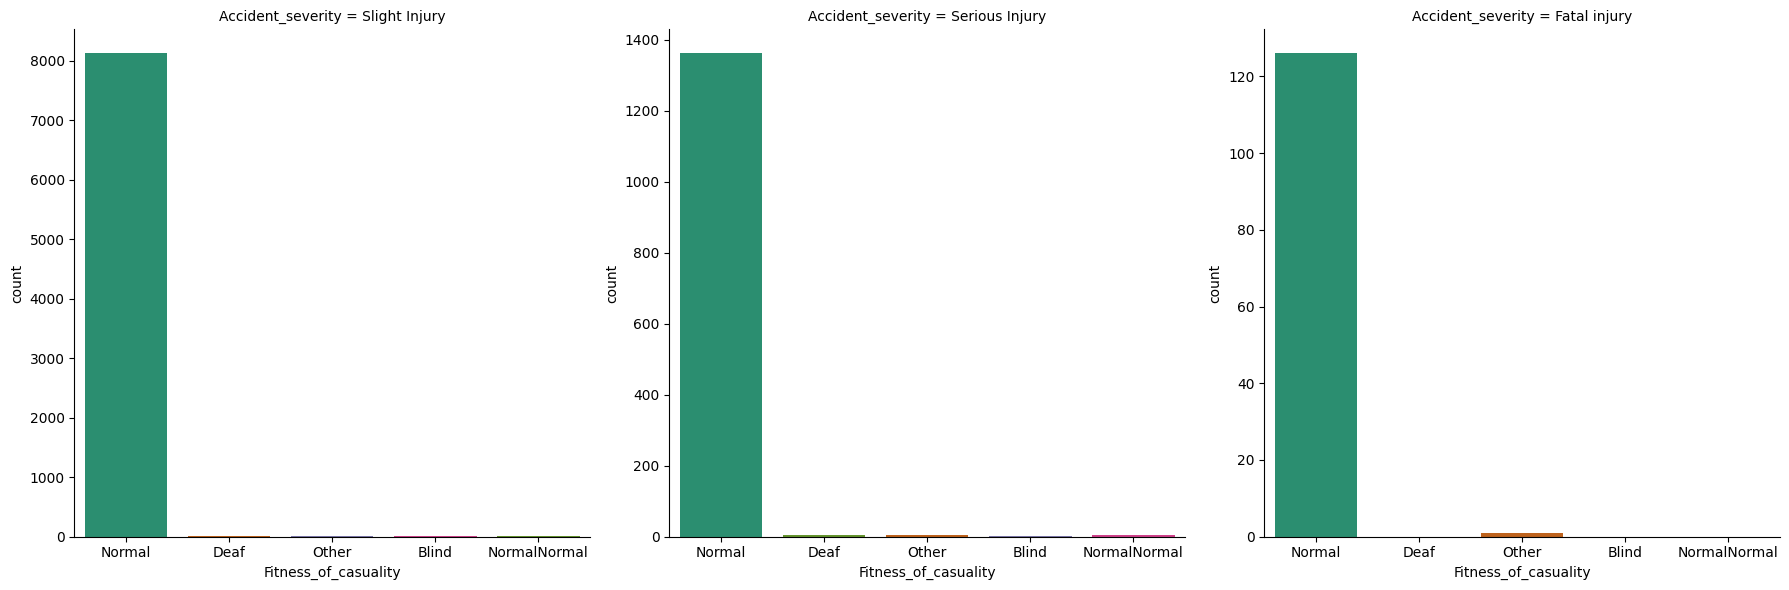

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

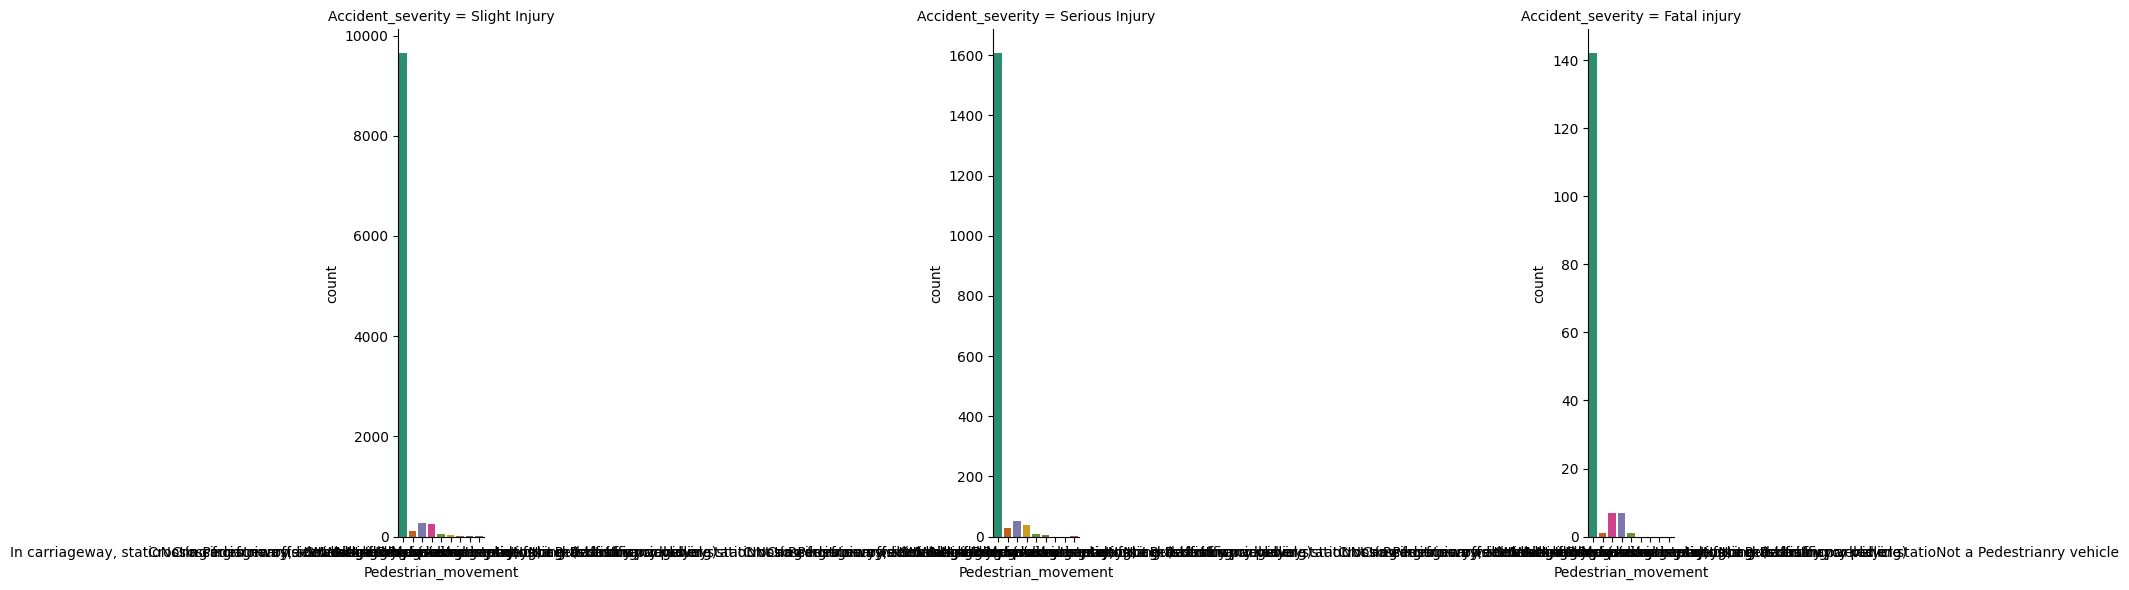

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the sam

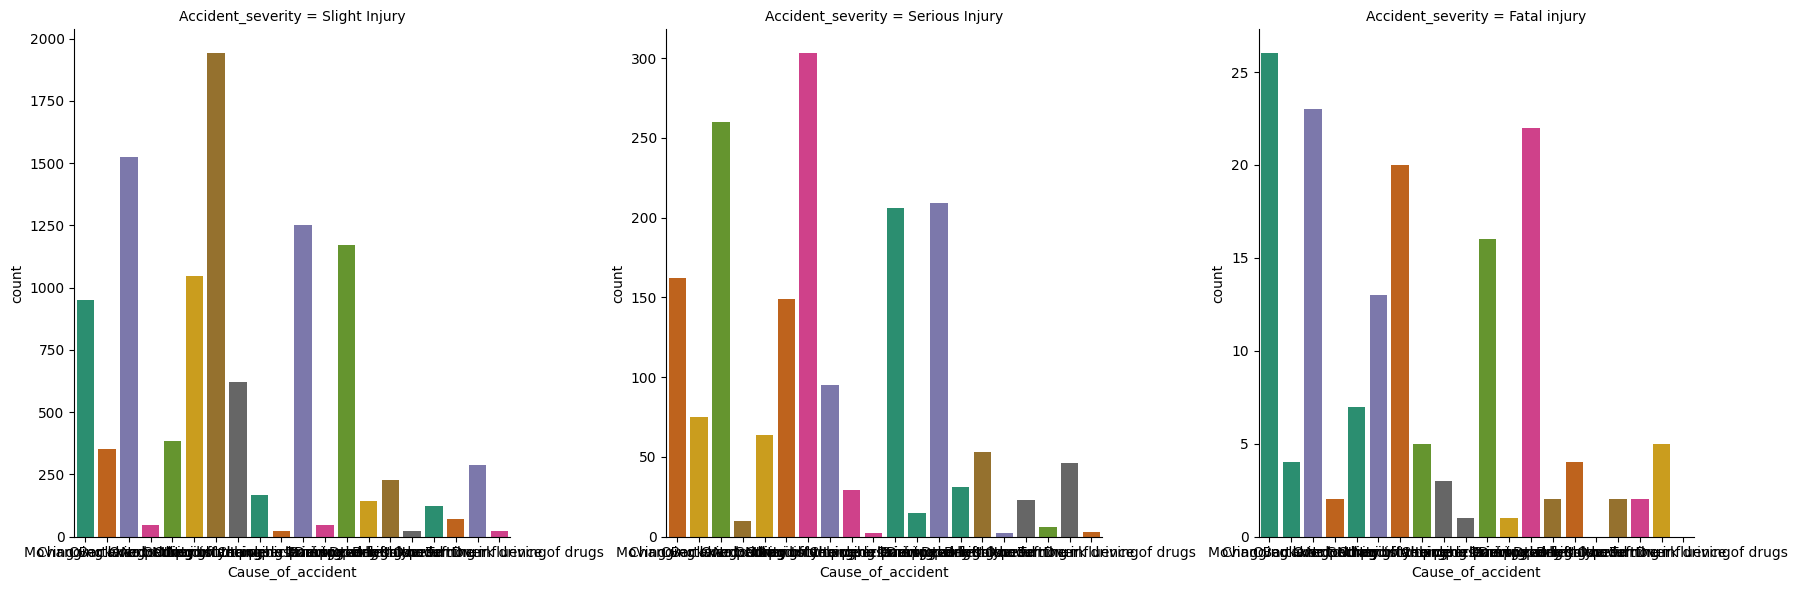

In [ ]:
for col in data.drop('Accident_severity',axis=1):
  g=sns.FacetGrid(data,col="Accident_severity",height=6,aspect=1,sharey=False)
  g.map(sns.countplot,col,palette="Dark2")
  plt.show()

Observation

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

## Categorical data analysis

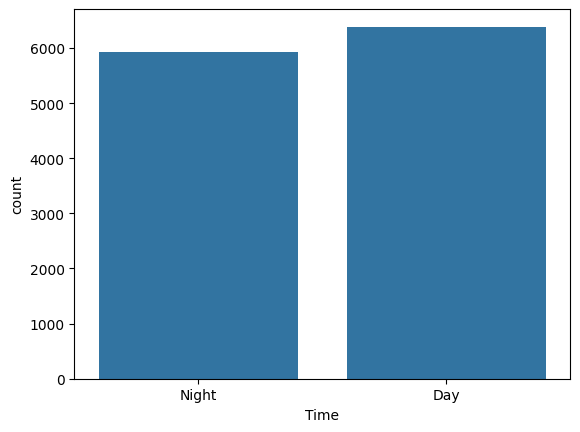

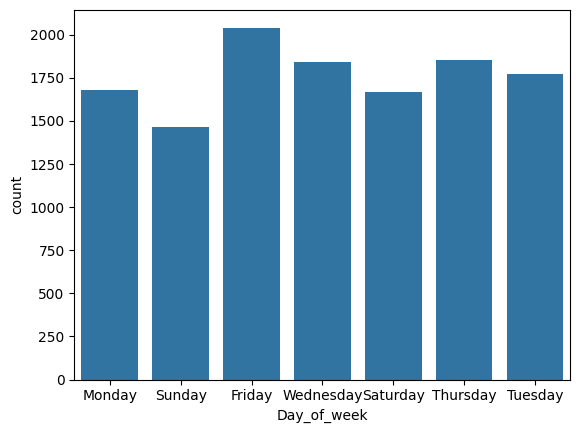

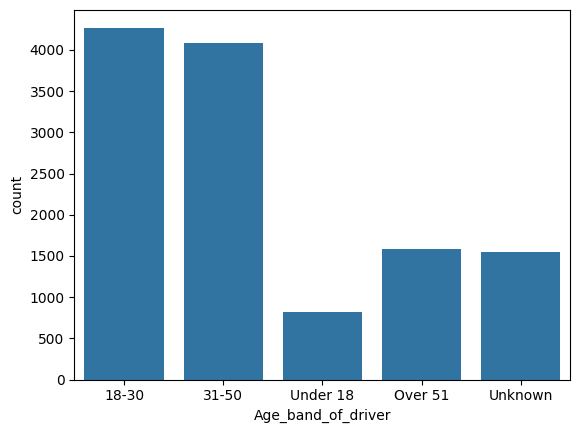

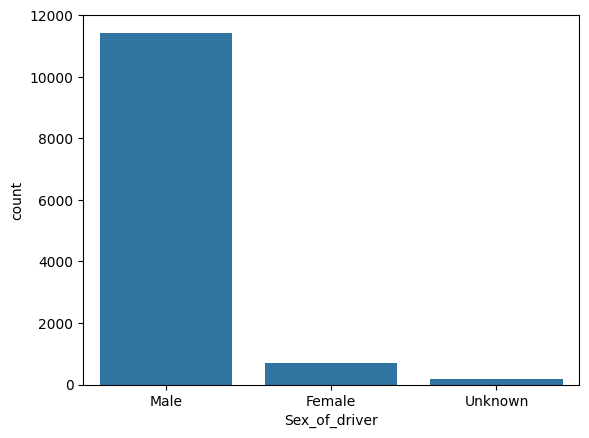

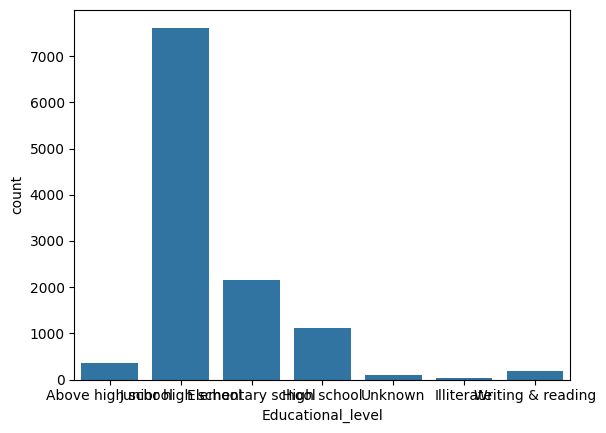

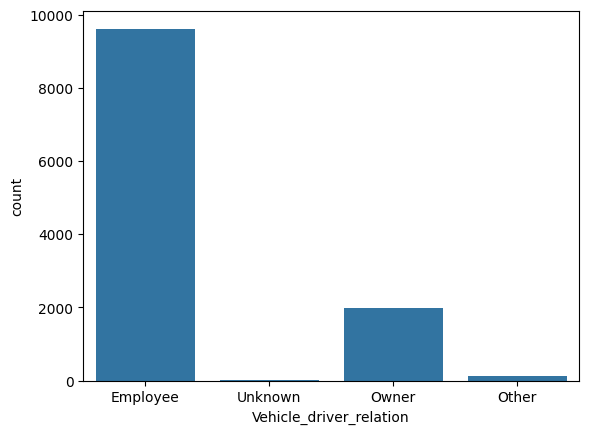

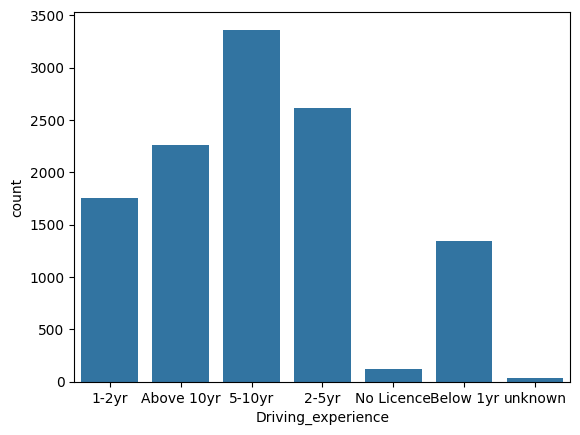

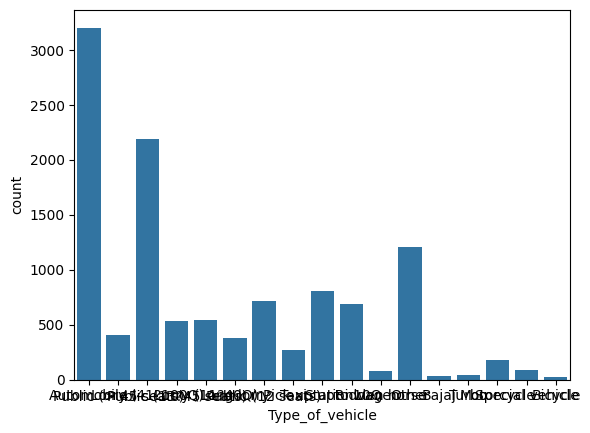

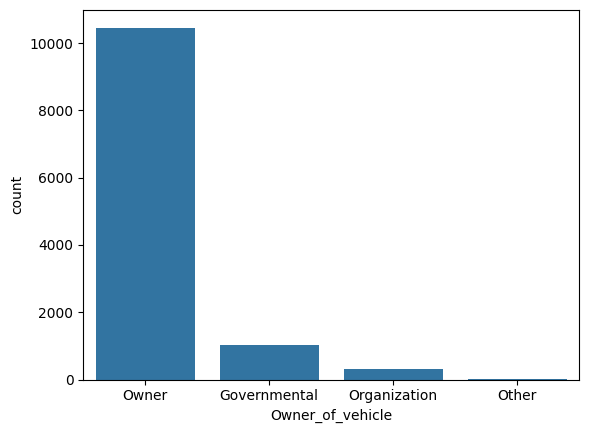

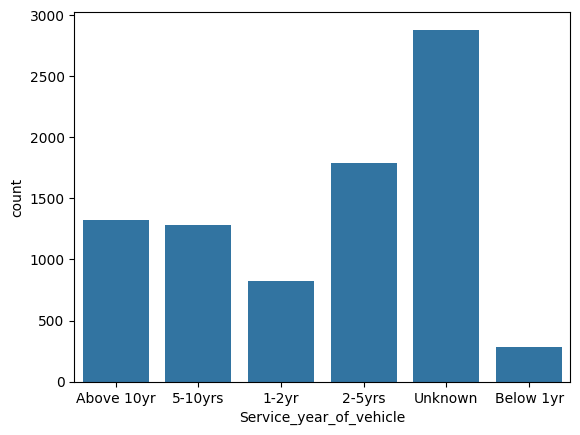

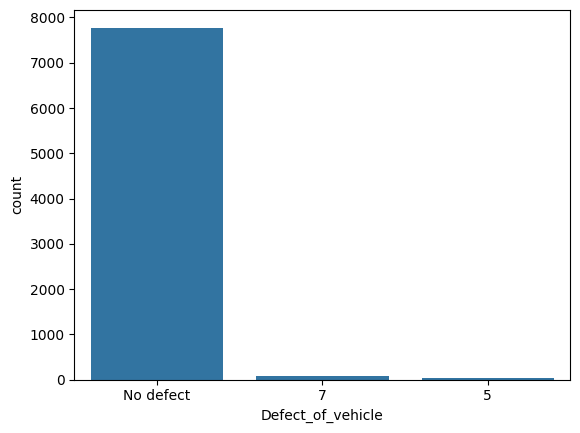

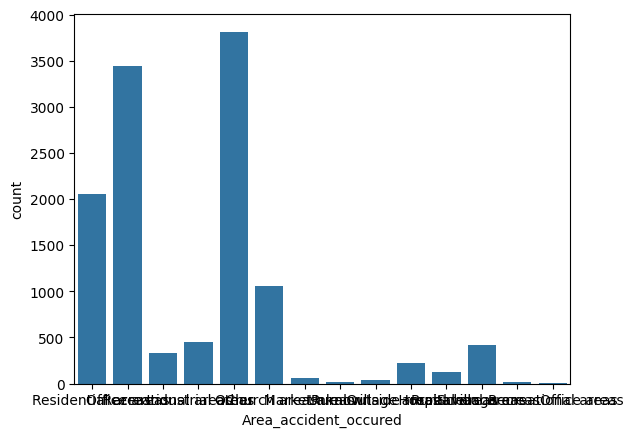

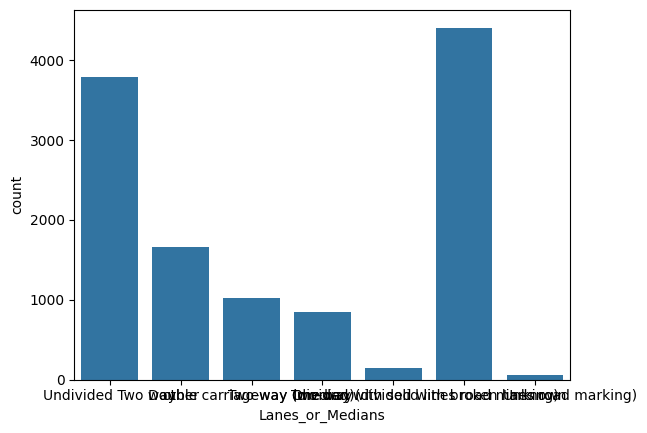

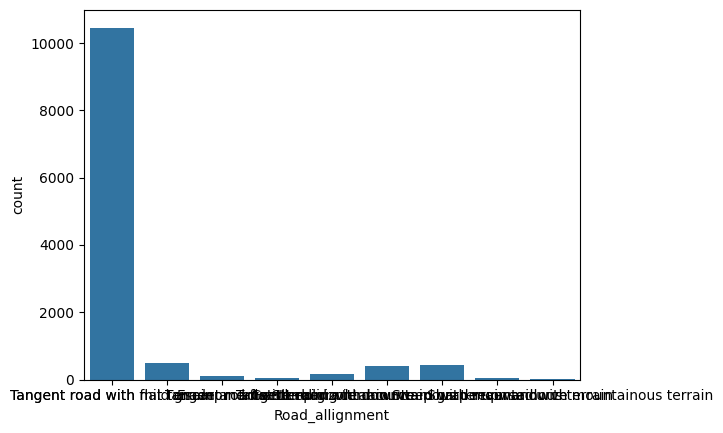

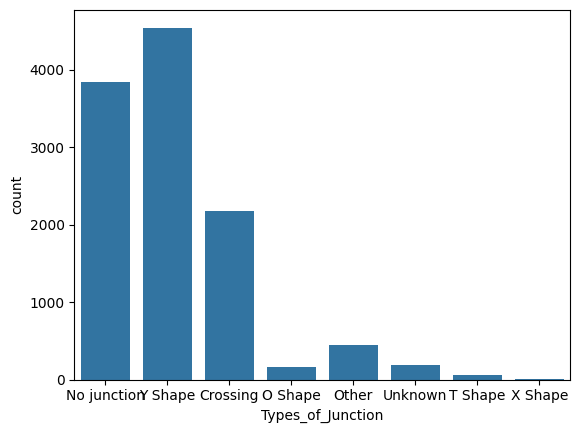

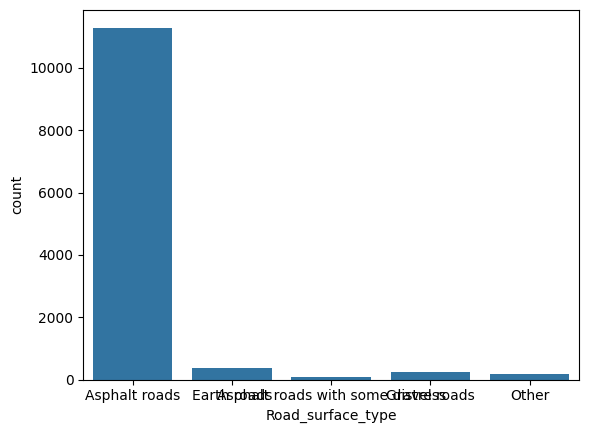

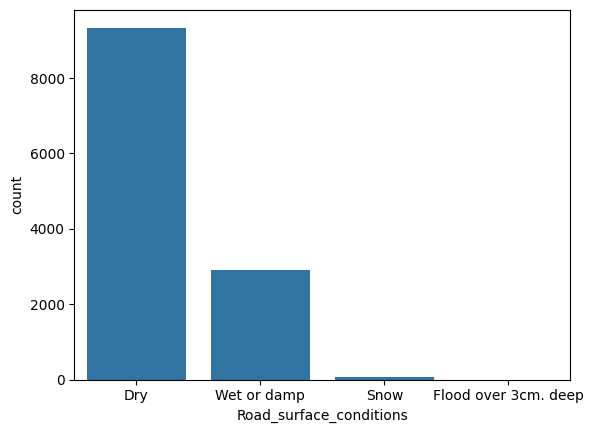

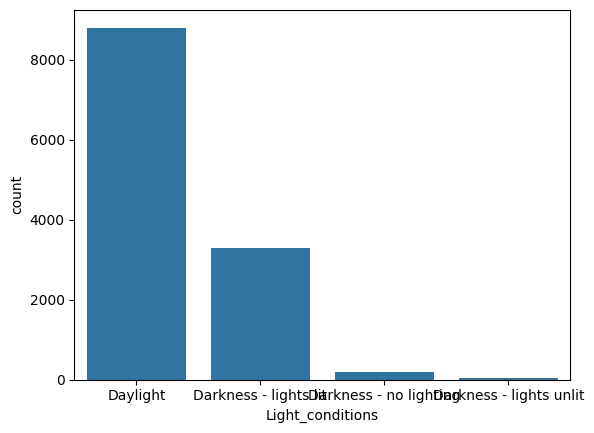

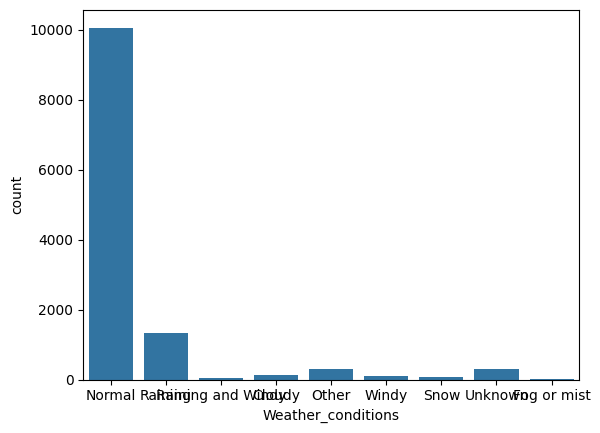

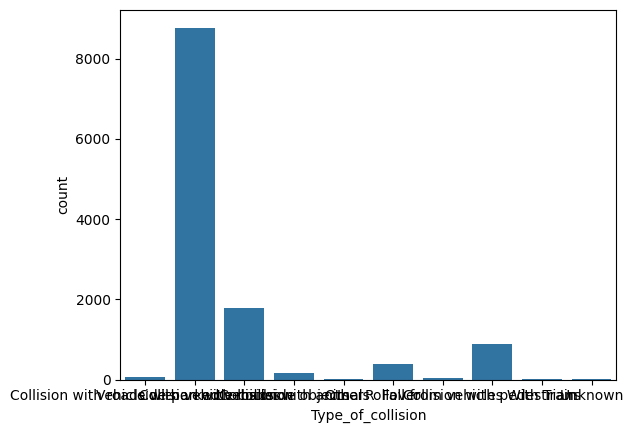

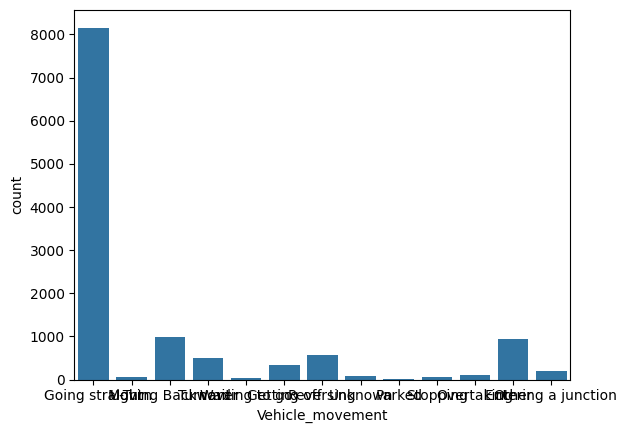

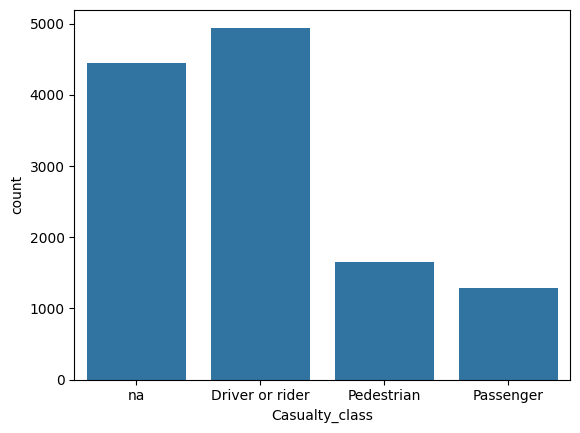

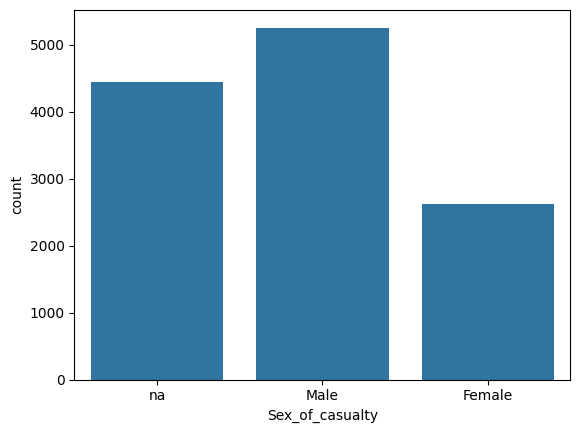

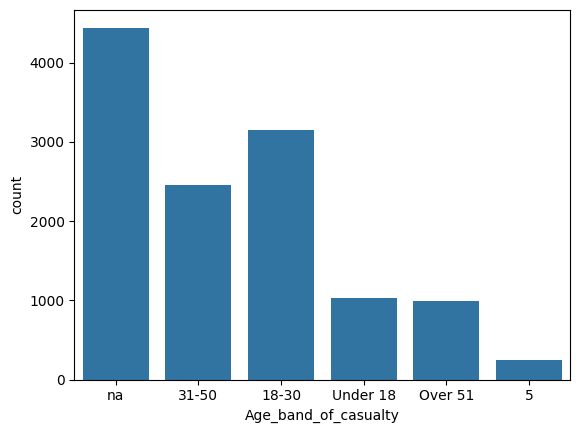

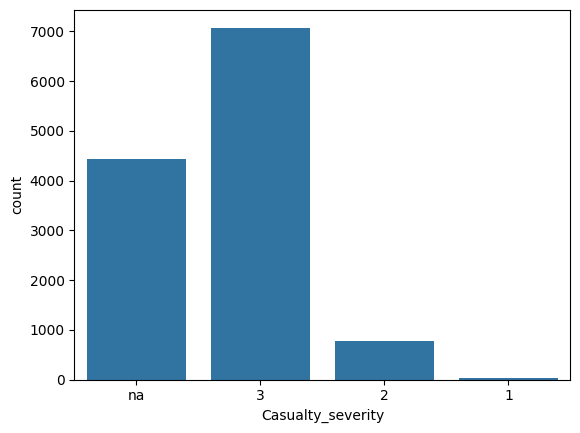

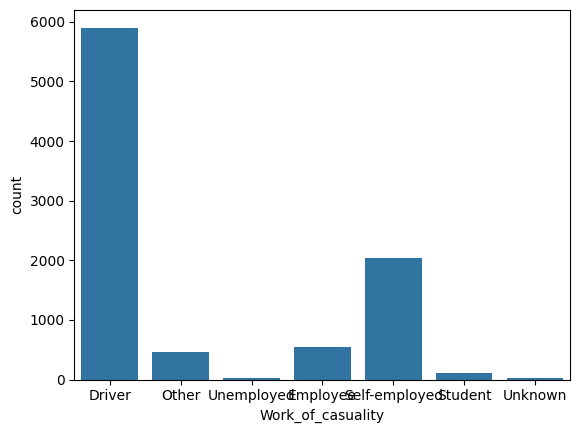

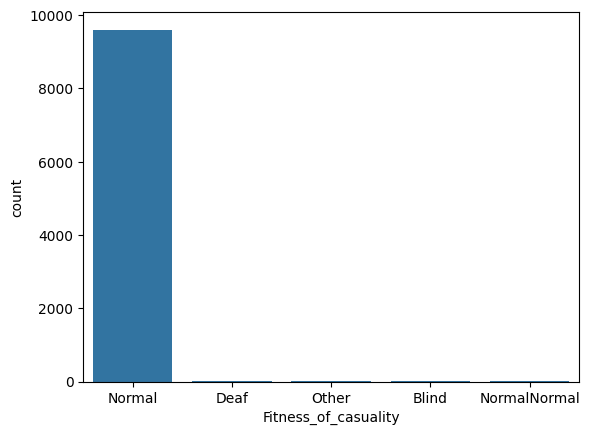

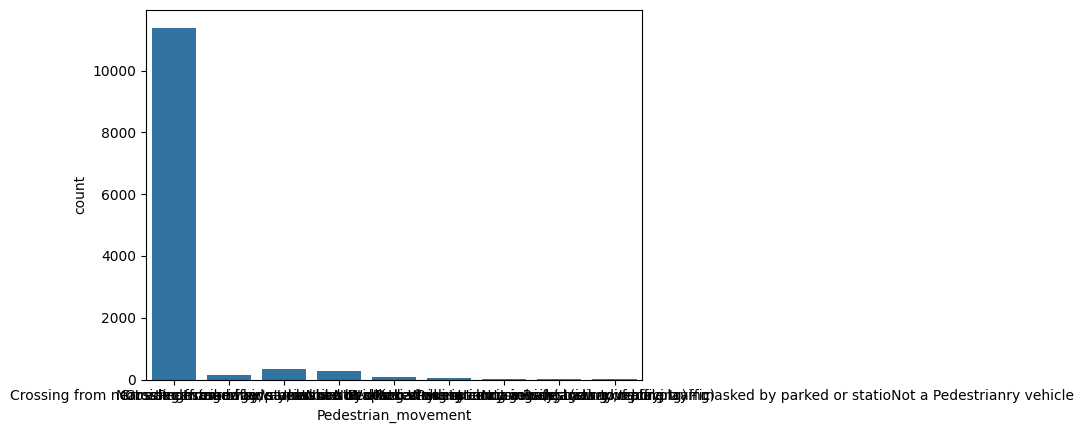

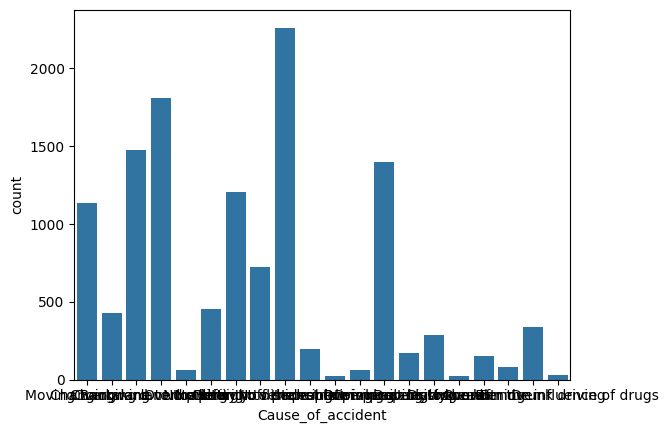

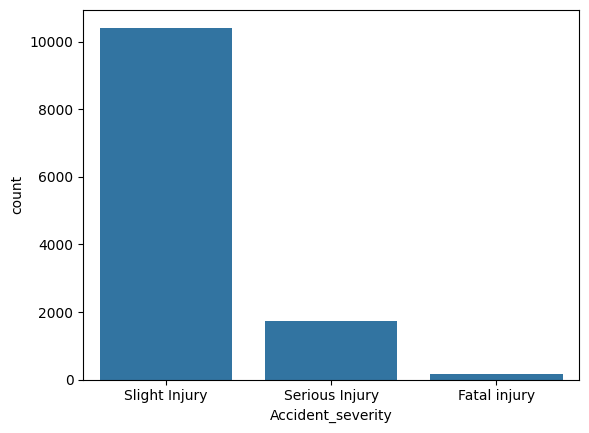

In [ ]:
for  col in data.select_dtypes(include='object'):
  if data[col].nunique()<=22:
    sns.countplot(x=col,data=data)
    plt.show()

inferences:

**Observations:**

* Most of the accidents with fatal injuries happened in night.
* Most of the accidents with fatal injuries happened on weekends.
* Fatality occured on saturdays and sundays.
* Highest number of non-fatal injuries happened on fridays.
* Most accidents are caused by drivers aged 18-30 and the least by drivers aged under 18.
* Proportion of fatal accidents are lower for female drivers.
* Drivers with 2-5yrs of experience caused most accidents with fatal injury and those with 5-       10yrs experience caused most accidents with non-fatal injuries.
* Proportion of fatal injuries caused by vehicles with more than 10yrs of service is lower compared to non-fatal injuries.
* Though most of the accident happened around offices, a higher proportion of accidents happened around residential areas have led to fatal injuries.
* Most accidents with fatal injuries occured on undivided two-ways.
* Most accidents with non-fatal injuries occured on two-way divided with broken lines road marking
* Double carriageway has a lower proportion of fatal accidents compared to non-fatal accidents.
* Severity of accidents increases at places with no junctions and the most number of fatal injuries occured at places with no junctions.
* Crossings and Y-shaped junctions shows a decreasing trend with respect to severity of accidents though the numbers are high.
* Most of the accidents with fatal injury have happened at night.
* Collisions with pedestrians have resulted in more fatal injuries compared to non-fatal injuries.
* Accidents with 4 casualties have a huge proportion on fatal injuries compared to non-fatal injuries.
* Accidents involving drivers with 18-30yrs of age have an increasing pattern with respect to severity of injuries.
* Moving backward led to most of the accidents with fatal injuries whereas failing to keep enough distance between vehicles led to more number of accidents with non-fatal injuries.

# 5)Data Cleaning

## Spelling mistake handling

In [ ]:
# Replacing misspelled vehicles types names

# lorry
data.loc[(data['Type_of_vehicle']=="Lorry (41?100Q)")|
          (data['Type_of_vehicle']=="Lorry (11?40Q)")|
           (data['Type_of_vehicle']=="Pick up upto 10Q")
           ,'Type_of_vehicle']='lorry'
data.loc[(data['Type_of_vehicle']=="Public (12 seats)")|
          (data['Type_of_vehicle']=="Public (13?45 seats)")|
           (data['Type_of_vehicle']=="Public (> 45 seats)")
           ,'Type_of_vehicle']='Public Vehicles'

In [ ]:
data["Type_of_vehicle"].value_counts()

Type_of_vehicle
lorry              3538
Automobile         3205
Public Vehicles    1647
Other              1208
Stationwagen        687
Long lorry          383
Taxi                265
Motorcycle          177
Special vehicle      84
Ridden horse         76
Turbo                46
Bajaj                29
Bicycle              21
Name: count, dtype: int64

In [ ]:
from typing import List
def display_cols_values_counts(col_names:List[str]):
  for col_name in col_names:
    print("-"*30)
    print(f"column:{col_name}")
    print("-"*30)
    print(data[col_name].value_counts())
    print("")
display_cols_values_counts(data.columns)

------------------------------
column:Time
------------------------------
Time
Day      6387
Night    5929
Name: count, dtype: int64

------------------------------
column:Day_of_week
------------------------------
Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64

------------------------------
column:Age_band_of_driver
------------------------------
Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64

------------------------------
column:Sex_of_driver
------------------------------
Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64

------------------------------
column:Educational_level
------------------------------
Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & rea

In [ ]:
data.loc[data['Defect_of_vehicle']=="No defect",'Defect_of_vehicle']="0"


In [ ]:
data['Defect_of_vehicle'].value_counts()


Defect_of_vehicle
0    7777
7      76
5      36
Name: count, dtype: int64

In [ ]:
# replacing misspelled Area_accident_occured names
# rural village areasOfiice Areas
data.loc[data['Area_accident_occured']=="Rural village areasOffice areas", "Area_accident_occured"]='Rural village areas or office  areas'

In [ ]:
data['Area_accident_occured'].value_counts()

Area_accident_occured
Other                                   3819
Office areas                            3451
Residential areas                       2060
 Church areas                           1060
 Industrial areas                        456
School areas                             415
  Recreational areas                     327
 Outside rural areas                     218
 Hospital areas                          121
  Market areas                            63
Rural village areas                       44
Unknown                                   22
Rural village areas or office  areas      20
Recreational areas                         1
Name: count, dtype: int64

In [ ]:
# to_remove 5 in age band of casuality
data=data.drop(data.index[data["Age_band_of_casualty"]=="5"])


In [ ]:
data['Age_band_of_casualty'].value_counts()

Age_band_of_casualty
na          4443
18-30       3145
31-50       2455
Under 18    1035
Over 51      994
Name: count, dtype: int64

In [ ]:
data["Cause_of_accident"].replace("Driving at high speed","Overspeed",inplace=True)


<ipython-input-72-2ec3407d89b2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Cause_of_accident"].replace("Driving at high speed","Overspeed",inplace=True)


In [ ]:
data['Cause_of_accident'].value_counts()

Cause_of_accident
No distancing                           2211
Changing lane to the right              1775
Changing lane to the left               1454
Driving carelessly                      1371
No priority to vehicle                  1182
Moving Backward                         1113
No priority to pedestrian                706
Other                                    444
Overtaking                               423
Driving under the influence of drugs     336
Driving to the left                      280
Overspeed                                226
Getting off the vehicle improperly       195
Overturning                              144
Turnover                                  76
Overloading                               59
Drunk driving                             27
Improper parking                          25
Unknown                                   25
Name: count, dtype: int64

## handling Duplicates

In [ ]:
# delecting duplicates
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
12310    False
12311    False
12312    False
12313    False
12314    False
Length: 12072, dtype: bool

* no data duplicated in this dataset

## handling missing values

In [ ]:
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               724
Vehicle_driver_relation         566
Driving_experience              811
Type_of_vehicle                 931
Owner_of_vehicle                472
Service_year_of_vehicle        3866
Defect_of_vehicle              4347
Area_accident_occured           234
Lanes_or_Medians                377
Road_allignment                 141
Types_of_Junction               863
Road_surface_type               170
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               151
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                299
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality              3140
Fitness_of_casuality           2588
Pedestrian_movement               0
Cause_of_accident                 0
Accident_severity                 0
dtype: int64

In [ ]:
data.isna().sum()[data.isna().sum()!=0]

Educational_level           724
Vehicle_driver_relation     566
Driving_experience          811
Type_of_vehicle             931
Owner_of_vehicle            472
Service_year_of_vehicle    3866
Defect_of_vehicle          4347
Area_accident_occured       234
Lanes_or_Medians            377
Road_allignment             141
Types_of_Junction           863
Road_surface_type           170
Type_of_collision           151
Vehicle_movement            299
Work_of_casuality          3140
Fitness_of_casuality       2588
dtype: int64

In [ ]:
# calcuting the percentage of missing values and round to 2
(data.isna().sum()/data.shape[0]*100).round (2)


Time                            0.00
Day_of_week                     0.00
Age_band_of_driver              0.00
Sex_of_driver                   0.00
Educational_level               6.00
Vehicle_driver_relation         4.69
Driving_experience              6.72
Type_of_vehicle                 7.71
Owner_of_vehicle                3.91
Service_year_of_vehicle        32.02
Defect_of_vehicle              36.01
Area_accident_occured           1.94
Lanes_or_Medians                3.12
Road_allignment                 1.17
Types_of_Junction               7.15
Road_surface_type               1.41
Road_surface_conditions         0.00
Light_conditions                0.00
Weather_conditions              0.00
Type_of_collision               1.25
Number_of_vehicles_involved     0.00
Number_of_casualties            0.00
Vehicle_movement                2.48
Casualty_class                  0.00
Sex_of_casualty                 0.00
Age_band_of_casualty            0.00
Casualty_severity               0.00
Work_of_casuality              26.01
Fitness_of_casuality           21.44
Pedestrian_movement             0.00
Cause_of_accident               0.00
Accident_severity               0.00
dtype: float64

In [ ]:
# Fill NaN values with mode of each of column
data.fillna(data.mode().iloc[0],inplace=True)
data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Service_year_of_vehicle        0
Defect_of_vehicle              0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Work_of_casuality              0
Fitness_of_casuality           0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

In [ ]:
#data["Road_surface_type"].fillna(data["Road_surface_type"].mode()[0],inplace=True)
#data["Road_allignment"].fillna(data["Road_allignment"].mode()[0],inplace=True)

## Handling "unknown" and "na" Values

we can handle all null values. but there also, "unknown" and "na" as value in the column which is also equal to null . have to with that too!

In [ ]:
# replace "unknown" ,"unknown" , and 'na' with the mode of each column
def replace_with_mode(df,values_to_replace=["Unknown","unknown","na"]):
  for column in df. columns:
    mode_value=df[column].mode()[0] # Get the mode (most frequent values)
    df[column]=df[column].replace(values_to_replace,mode_value)
replace_with_mode(data)
data.head()

Time Day_of_week Age_band_of_driver Sex_of_driver   Educational_level  \
0  Night      Monday              18-30          Male   Above high school   
1  Night      Monday              31-50          Male  Junior high school   
2  Night      Monday              18-30          Male  Junior high school   
3  Night      Sunday              18-30          Male  Junior high school   
4  Night      Sunday              18-30          Male  Junior high school   

  Vehicle_driver_relation Driving_experience  Type_of_vehicle  \
0                Employee              1-2yr       Automobile   
1                Employee         Above 10yr  Public Vehicles   
2                Employee              1-2yr            lorry   
3                Employee             5-10yr  Public Vehicles   
4                Employee              2-5yr            lorry   

  Owner_of_vehicle Service_year_of_vehicle  ... Vehicle_movement  \
0            Owner              Above 10yr  ...   Going straight   
1            Owner                 5-10yrs  ...   Going straight   
2            Owner                 Unknown  ...   Going straight   
3     Governmental                 Unknown  ...   Going straight   
4            Owner                 5-10yrs  ...   Going straight   

    Casualty_class Sex_of_casualty Age_band_of_casualty Casualty_severity  \
0  Driver or rider            Male                   na                 3   
1  Driver or rider            Male                   na                 3   
2  Driver or rider            Male                31-50                 3   
3       Pedestrian          Female                18-30                 3   
4  Driver or rider            Male                   na                 3   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4            Driver               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  
0             Moving Backward     Slight Injury  
1                  Overtaking     Slight Injury  
2   Changing lane to the left    Serious Injury  
3  Changing lane to the right     Slight Injury  
4                  Overtaking     Slight Injury  

[5 rows x 32 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Service_year_of_vehicle      12072 non-null  object
 10  Defect_of_vehicle            12072 non-null  object
 11  Area_accident_occured        12072 non-null  object
 12  Lanes_or_Medians             12072 non-null  object
 13  Road_allignment              12072 n

In [ ]:
data.describe(include=["O"]).T

count unique  \
Time                     12072      2   
Day_of_week              12072      7   
Age_band_of_driver       12072      4   
Sex_of_driver            12072      2   
Educational_level        12072      6   
Vehicle_driver_relation  12072      3   
Driving_experience       12072      6   
Type_of_vehicle          12072     13   
Owner_of_vehicle         12072      4   
Service_year_of_vehicle  12072      6   
Defect_of_vehicle        12072      3   
Area_accident_occured    12072     13   
Lanes_or_Medians         12072      6   
Road_allignment          12072      9   
Types_of_Junction        12072      7   
Road_surface_type        12072      5   
Road_surface_conditions  12072      4   
Light_conditions         12072      4   
Weather_conditions       12072      8   
Type_of_collision        12072      9   
Vehicle_movement         12072     12   
Casualty_class           12072      3   
Sex_of_casualty          12072      2   
Age_band_of_casualty     12072      5   
Casualty_severity        12072      3   
Work_of_casuality        12072      6   
Fitness_of_casuality     12072      5   
Pedestrian_movement      12072      9   
Cause_of_accident        12072     18   
Accident_severity        12072      3   

                                                                      top  \
Time                                                                  Day   
Day_of_week                                                        Friday   
Age_band_of_driver                                                  18-30   
Sex_of_driver                                                        Male   
Educational_level                                      Junior high school   
Vehicle_driver_relation                                          Employee   
Driving_experience                                                 5-10yr   
Type_of_vehicle                                                     lorry   
Owner_of_vehicle                                                    Owner   
Service_year_of_vehicle                                           Unknown   
Defect_of_vehicle                                                       0   
Area_accident_occured                                               Other   
Lanes_or_Medians         Two-way (divided with broken lines road marking)   
Road_allignment                            Tangent road with flat terrain   
Types_of_Junction                                                 Y Shape   
Road_surface_type                                           Asphalt roads   
Road_surface_conditions                                               Dry   
Light_conditions                                                 Daylight   
Weather_conditions                                                 Normal   
Type_of_collision                          Vehicle with vehicle collision   
Vehicle_movement                                           Going straight   
Casualty_class                                            Driver or rider   
Sex_of_casualty                                                      Male   
Age_band_of_casualty                                                   na   
Casualty_severity                                                       3   
Work_of_casuality                                                  Driver   
Fitness_of_casuality                                               Normal   
Pedestrian_movement                                      Not a Pedestrian   
Cause_of_accident                                           No distancing   
Accident_severity                                           Slight Injury   

                          freq  
Time                      6252  
Day_of_week               1992  
Age_band_of_driver        5696  
Sex_of_driver            11388  
Educational_level         8290  
Vehicle_driver_relation  10024  
Driving_experience        4145  
Type_of_vehicle           4388  
Owner_of_vehicle         10726  
Service_year_of_vehicle   6682  
De

In [ ]:
data['Accident_severity'].value_counts()

Accident_severity
Slight Injury     10218
Serious Injury     1699
Fatal injury        155
Name: count, dtype: int64

In [ ]:
data=data.drop(['Age_band_of_casualty','Service_year_of_vehicle'],axis=1)

In [ ]:
from typing import List
def display_cols(col_names:List[str]):
  for col_name in col_names:
    print('-'*30)
    print(f"columns:{col_name}")
    print("-"*30)
    print(data[col_name].unique())
    print('')
display_cols(data.columns)

------------------------------
columns:Time
------------------------------
['Night' 'Day']

------------------------------
columns:Day_of_week
------------------------------
['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']

------------------------------
columns:Age_band_of_driver
------------------------------
['18-30' '31-50' 'Under 18' 'Over 51']

------------------------------
columns:Sex_of_driver
------------------------------
['Male' 'Female']

------------------------------
columns:Educational_level
------------------------------
['Above high school' 'Junior high school' 'Elementary school'
 'High school' 'Illiterate' 'Writing & reading']

------------------------------
columns:Vehicle_driver_relation
------------------------------
['Employee' 'Owner' 'Other']

------------------------------
columns:Driving_experience
------------------------------
['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' 'No Licence' 'Below 1yr']

------------------------------
columns:Ty

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

## converting categorical variables to Numerical

In [ ]:
# columns of object type
cats_cols=data.columns[data.dtypes=="object"]
cats_cols


Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Defect_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Casualty_severity', 'Work_of_casuality', 'Fitness_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

### Ordinal encoding

Map logical categorial colums using dictionary

In [ ]:
data["Sex_of_driver"].value_counts()

Sex_of_driver
Male      11388
Female      684
Name: count, dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  object
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  object
 3   Sex_of_driver                12072 non-null  object
 4   Educational_level            12072 non-null  object
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  object
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

In [ ]:
data["Age_band_of_driver"].value_counts()

Age_band_of_driver
18-30       5696
31-50       4015
Over 51     1561
Under 18     800
Name: count, dtype: int64

In [ ]:
data["Educational_level"].value_counts()

Educational_level
Junior high school    8290
Elementary school     2116
High school           1094
Above high school      353
Writing & reading      176
Illiterate              43
Name: count, dtype: int64

In [ ]:
data["Sex_of_driver"]=data['Sex_of_driver'].map({'Female':0,'Male':1})
data['Time']=data['Time'].map({'Day':1,'Night':0})
data["Age_band_of_driver"]=data['Age_band_of_driver'].map({'Under 18':0,'18-30':1,'31-50':2,'Over 51':3})
data["Driving_experience"]=data['Driving_experience'].map({'No Licence':0,'Below 1yr':1,'1-2yr':2,'2-5yr':3,'5-10yr':4,"Above 10yr":5})
data["Educational_level"]=data['Educational_level'].map({'Illiterate':0,"Writing & reading":1,'Elementary school':2,'Junior high school':3,'High school':4,'Above high school':5})
data['Accident_severity']=data['Accident_severity'].map({'Slight Injury':0,'Serious Injury':1,'Fatal injury':2})
data["Sex_of_casualty"]=data['Sex_of_casualty'].map({'Female':0,'Male':1})


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12072 non-null  int64 
 1   Day_of_week                  12072 non-null  object
 2   Age_band_of_driver           12072 non-null  int64 
 3   Sex_of_driver                12072 non-null  int64 
 4   Educational_level            12072 non-null  int64 
 5   Vehicle_driver_relation      12072 non-null  object
 6   Driving_experience           12072 non-null  int64 
 7   Type_of_vehicle              12072 non-null  object
 8   Owner_of_vehicle             12072 non-null  object
 9   Defect_of_vehicle            12072 non-null  object
 10  Area_accident_occured        12072 non-null  object
 11  Lanes_or_Medians             12072 non-null  object
 12  Road_allignment              12072 non-null  object
 13  Types_of_Junction            12072 n

### converting columns to integer Type

In [ ]:
data['Defect_of_vehicle']=data['Defect_of_vehicle'].astype('int')
data['Casualty_severity']=data['Casualty_severity'].astype('int')

In [ ]:
data.dtypes

Time                            int64
Day_of_week                    object
Age_band_of_driver              int64
Sex_of_driver                   int64
Educational_level               int64
Vehicle_driver_relation        object
Driving_experience              int64
Type_of_vehicle                object
Owner_of_vehicle               object
Defect_of_vehicle               int64
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                 int64
Casualty_severity               int64
Work_of_casuality              object
Fitness_of_casuality           object
Pedestrian_movement            object
Cause_of_accident              object
Accident_severity               int64
dtype: object

### one Hot Encoding - Nominal Data

In [ ]:
# columns of Object Type
cats_cols=data.columns[data.dtypes=='object']
cats_cols

Index(['Day_of_week', 'Vehicle_driver_relation', 'Type_of_vehicle',
       'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Vehicle_movement', 'Casualty_class',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident'],
      dtype='object')

In [ ]:
for col in cats_cols:
  print(col,':',data[col].nunique())


Day_of_week : 7
Vehicle_driver_relation : 3
Type_of_vehicle : 13
Owner_of_vehicle : 4
Area_accident_occured : 13
Lanes_or_Medians : 6
Road_allignment : 9
Types_of_Junction : 7
Road_surface_type : 5
Road_surface_conditions : 4
Light_conditions : 4
Weather_conditions : 8
Type_of_collision : 9
Vehicle_movement : 12
Casualty_class : 3
Work_of_casuality : 6
Fitness_of_casuality : 5
Pedestrian_movement : 9
Cause_of_accident : 18


In [ ]:
data=pd.get_dummies(data,columns=['Casualty_class'],prefix=['Casualty_class'],drop_first=False,dtype=int)

In [ ]:
data.head()

Time Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0     0      Monday                   1              1                  5   
1     0      Monday                   2              1                  3   
2     0      Monday                   1              1                  3   
3     0      Sunday                   1              1                  3   
4     0      Sunday                   1              1                  3   

  Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                Employee                   2       Automobile   
1                Employee                   5  Public Vehicles   
2                Employee                   2            lorry   
3                Employee                   4  Public Vehicles   
4                Employee                   3            lorry   

  Owner_of_vehicle  Defect_of_vehicle  ... Sex_of_casualty Casualty_severity  \
0            Owner                  0  ...               1                 3   
1            Owner                  0  ...               1                 3   
2            Owner                  0  ...               1                 3   
3     Governmental                  0  ...               0                 3   
4            Owner                  0  ...               1                 3   

  Work_of_casuality Fitness_of_casuality Pedestrian_movement  \
0            Driver               Normal    Not a Pedestrian   
1            Driver               Normal    Not a Pedestrian   
2            Driver               Normal    Not a Pedestrian   
3            Driver               Normal    Not a Pedestrian   
4            Driver               Normal    Not a Pedestrian   

            Cause_of_accident Accident_severity  \
0             Moving Backward                 0   
1                  Overtaking                 0   
2   Changing lane to the left                 1   
3  Changing lane to the right                 0   
4                  Overtaking                 0   

  Casualty_class_Driver or rider Casualty_class_Passenger  \
0                              1                        0   
1                              1                        0   
2                              1                        0   
3                              0                        0   
4                              1                        0   

   Casualty_class_Pedestrian  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  

[5 rows x 32 columns]

### Label encoding -Nominal Data

* converting Categorical Feature values to numerical values using Label encoding
* label encoding provides values from 1 to n

In [ ]:
cats_cols=data.columns[data.dtypes=='object']
for cats_col in cats_cols:
  le=LabelEncoder()
  data[cats_col]=le.fit_transform(data[cats_col])
data.head()

Time  Day_of_week  Age_band_of_driver  Sex_of_driver  Educational_level  \
0     0            1                   1              1                  5   
1     0            1                   2              1                  3   
2     0            1                   1              1                  3   
3     0            3                   1              1                  3   
4     0            3                   1              1                  3   

   Vehicle_driver_relation  Driving_experience  Type_of_vehicle  \
0                        0                   2                0   
1                        0                   5                6   
2                        0                   2               12   
3                        0                   4                6   
4                        0                   3               12   

   Owner_of_vehicle  Defect_of_vehicle  ...  Sex_of_casualty  \
0                 3                  0  ...                1   
1                 3                  0  ...                1   
2                 3                  0  ...                1   
3                 0                  0  ...                0   
4                 3                  0  ...                1   

   Casualty_severity  Work_of_casuality  Fitness_of_casuality  \
0                  3                  0                     2   
1                  3                  0                     2   
2                  3                  0                     2   
3                  3                  0                     2   
4                  3                  0                     2   

   Pedestrian_movement  Cause_of_accident  Accident_severity  \
0                    5                  8                  0   
1                    5                 15                  0   
2                    5                  0                  1   
3                    5                  1                  0   
4                    5                 15                  0   

   Casualty_class_Driver or rider  Casualty_class_Passenger  \
0                               1                         0   
1                               1                         0   
2                               1                         0   
3                               0                         0   
4                               1                         0   

   Casualty_class_Pedestrian  
0                          0  
1                          0  
2                          0  
3                          1  
4                          0  

[5 rows x 32 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Time                            12072 non-null  int64
 1   Day_of_week                     12072 non-null  int64
 2   Age_band_of_driver              12072 non-null  int64
 3   Sex_of_driver                   12072 non-null  int64
 4   Educational_level               12072 non-null  int64
 5   Vehicle_driver_relation         12072 non-null  int64
 6   Driving_experience              12072 non-null  int64
 7   Type_of_vehicle                 12072 non-null  int64
 8   Owner_of_vehicle                12072 non-null  int64
 9   Defect_of_vehicle               12072 non-null  int64
 10  Area_accident_occured           12072 non-null  int64
 11  Lanes_or_Medians                12072 non-null  int64
 12  Road_allignment                 12072 non-null  int64
 13  Types_

# Data Transformation - Numerical data analysis

## outlier

<Axes: ylabel='Number_of_casualties'>

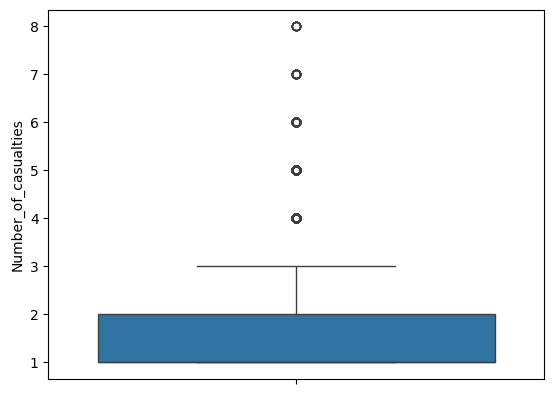

In [ ]:
sns.boxplot(data['Number_of_casualties'])

<Axes: ylabel='Number_of_vehicles_involved'>

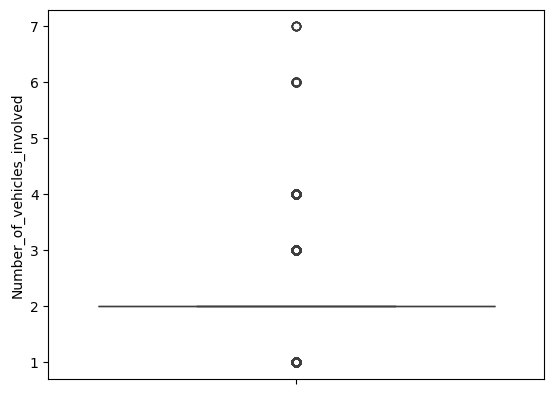

In [ ]:
sns.boxplot(data['Number_of_vehicles_involved'])

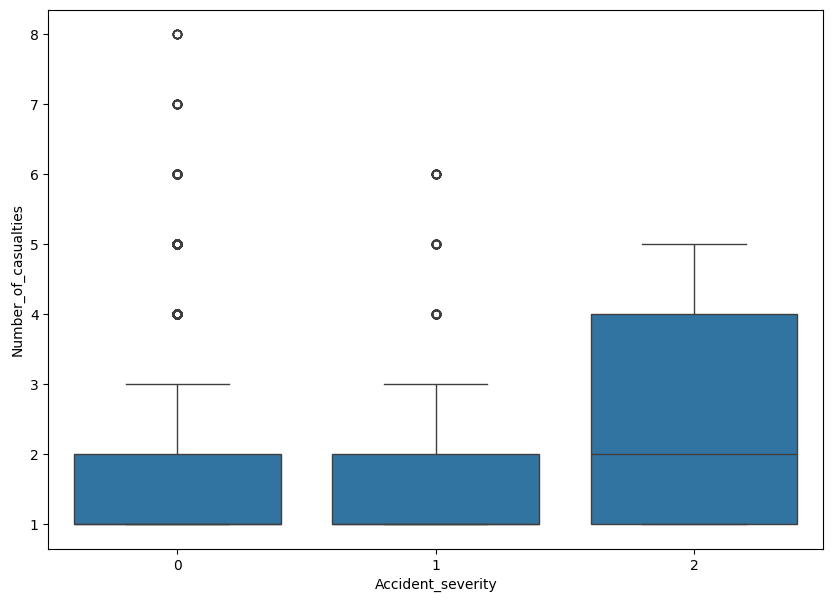

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='Accident_severity',y='Number_of_casualties')
plt.show()

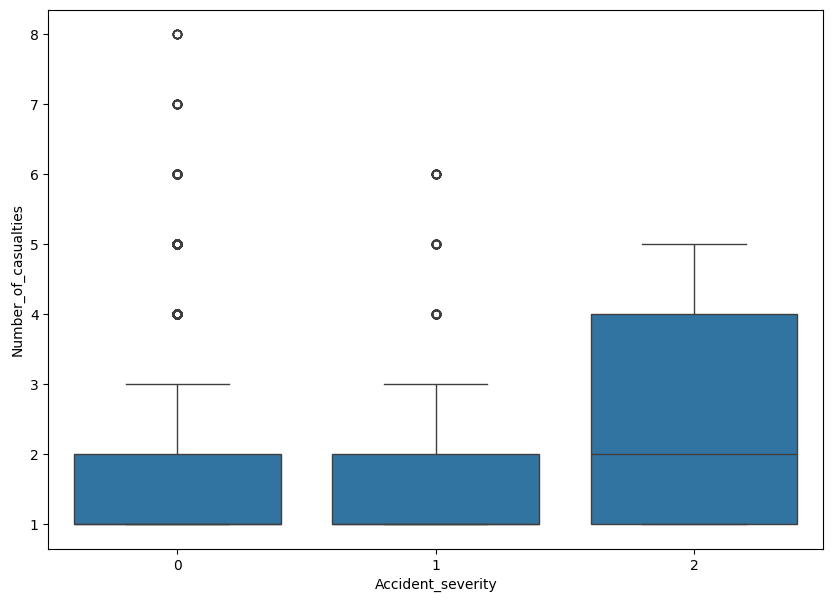

In [ ]:
plt.figure(figsize=(10,7))
sns.boxplot(data=data,x='Accident_severity',y='Number_of_casualties')
plt.show()

since there are only 2 discrete numerical variables(no continous numerical variables in this dataset) we dont drop any outliers here

## correlation of numerical variables

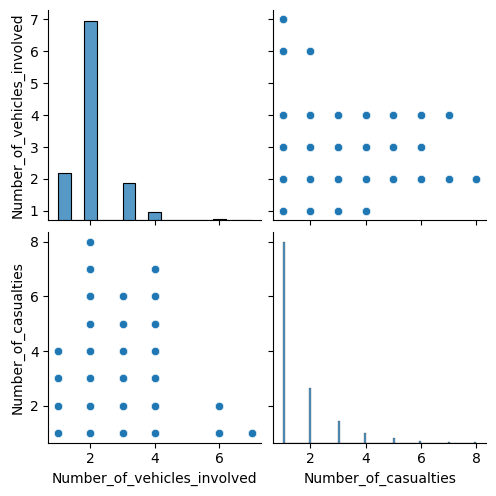

In [ ]:
sns.pairplot(data[['Number_of_vehicles_involved','Number_of_casualties']])
plt.show()

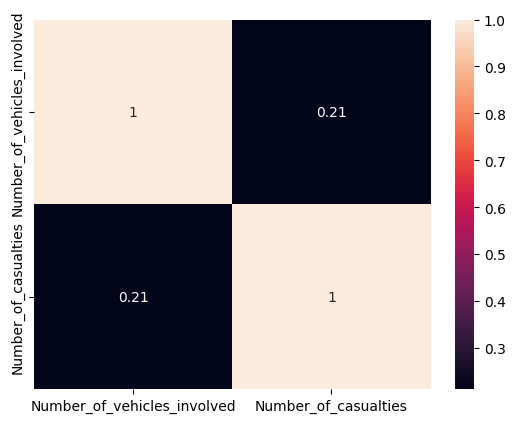

In [ ]:
corre_matrix=data[['Number_of_vehicles_involved','Number_of_casualties']].corr()
sns.heatmap(corre_matrix,annot=True)
plt.show()

inference:

  We raally need "Number_of_vehicles_involved" because that might be lead to severity of accident (for Example : if number of vehicle is 2 and if lorry and bike collided , then the severity of bike rider is severe , elif bikw and bike injury , and so on..cases).

   1. we amny or may not need the "Number_of_vehicles_involved", but there is a  1 supporting case , so this many a useful feature as data cannot be lost if there is a slight chance of dependency

   2. coming to "Number_of_casualities",we really dont consider the number of patients. As we are aiming for severity of Accident. so we can drop the "Number_of _casualities" column.
   3. in this heatmap , we can find that these are not much extremely correlated variable

## scaling

no need of scaling here!!!!

## Non relvent columns

<Axes: >

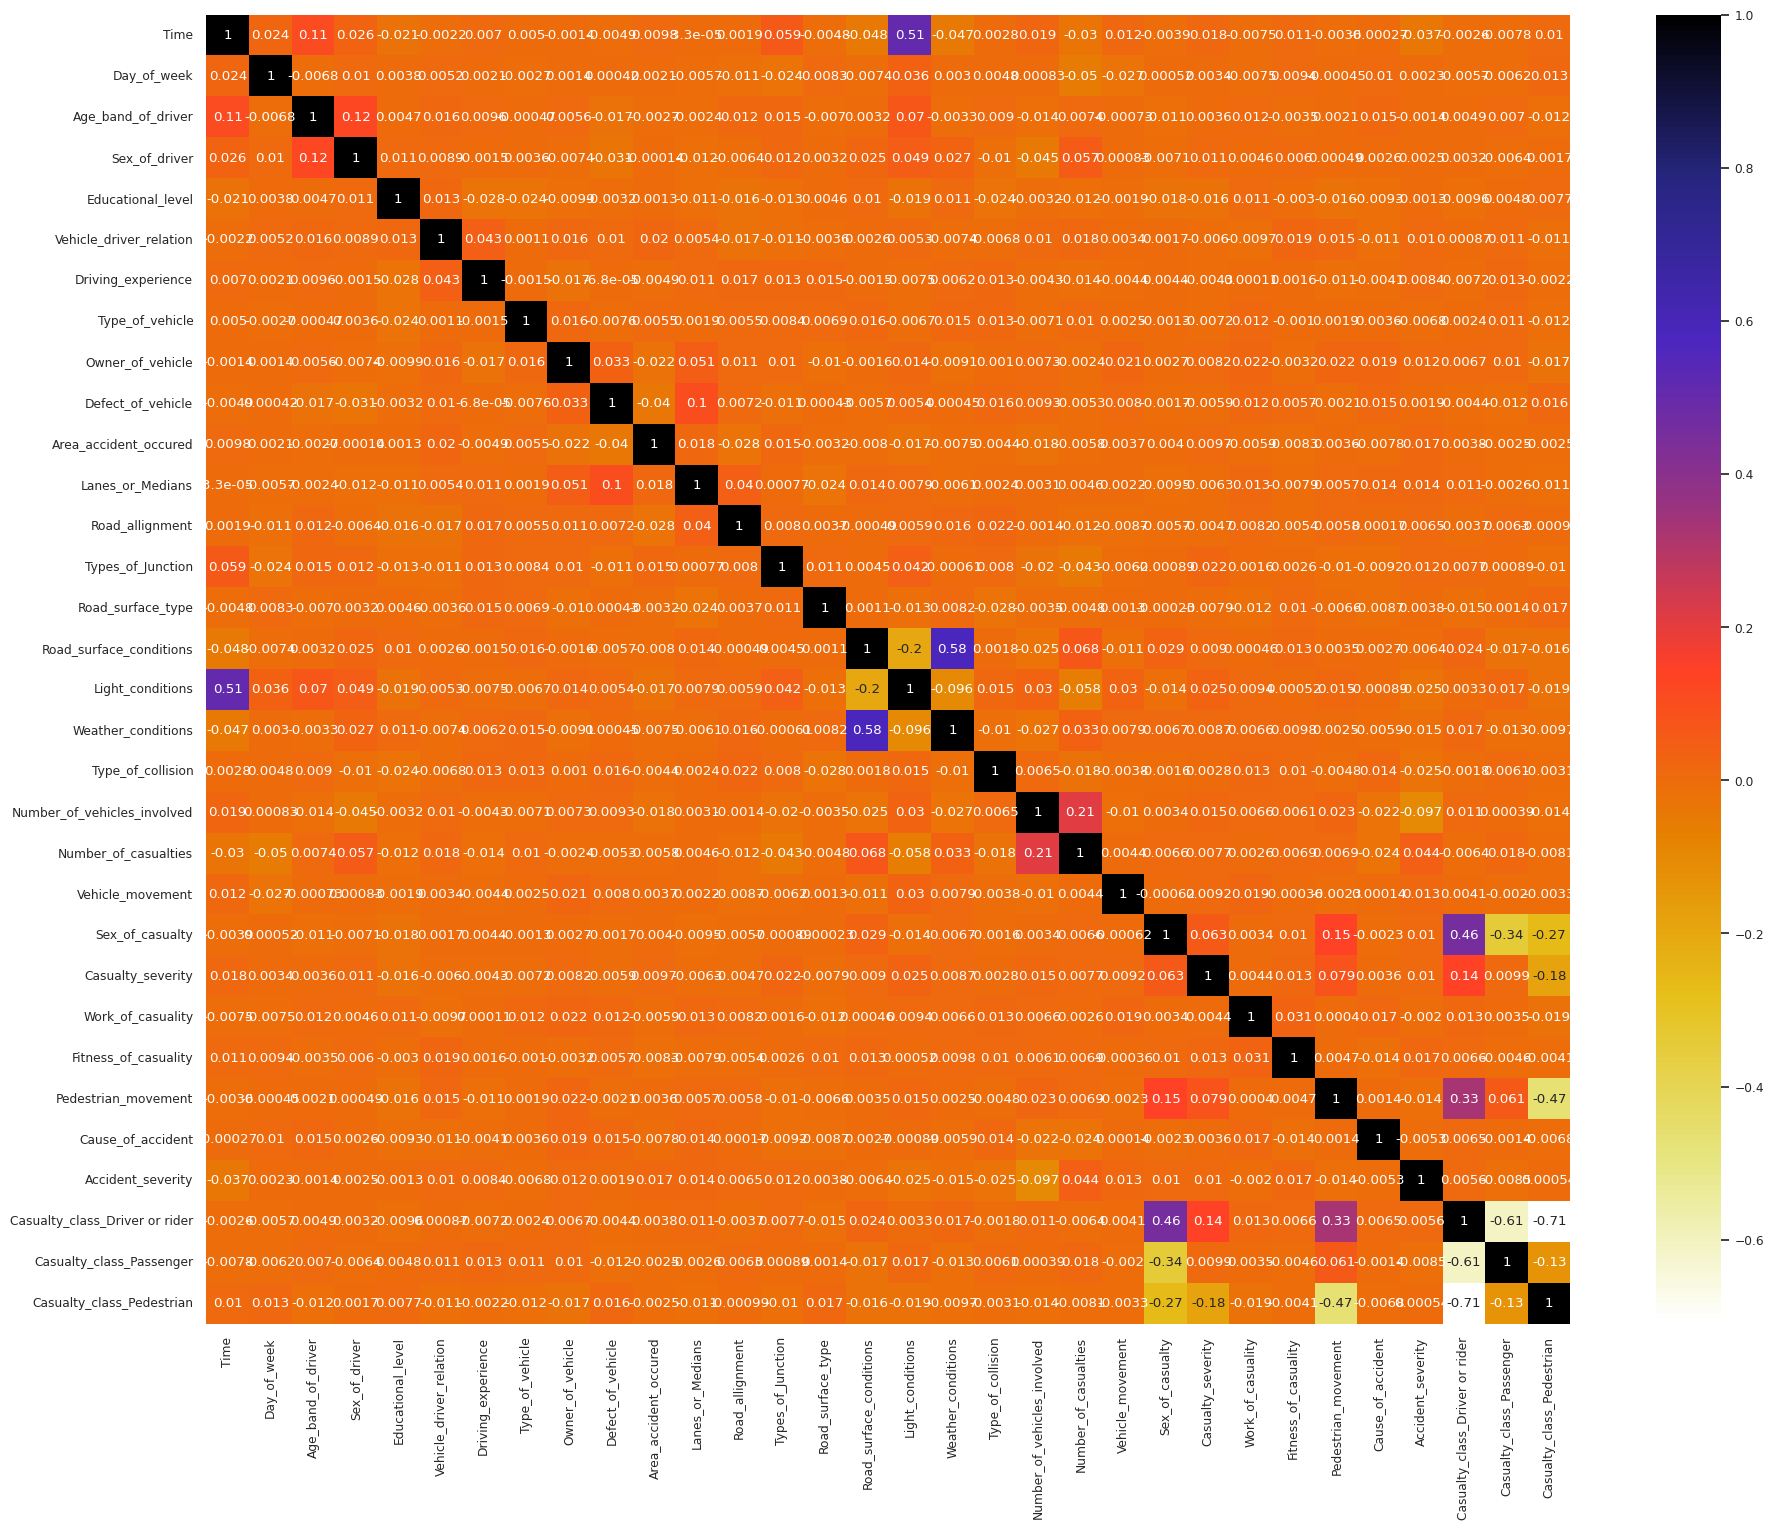

In [ ]:
plt.figure(figsize=(22,17))
sns.set(font_scale=0.8)
sns.heatmap(data.corr(),annot=True,cmap=plt.cm.CMRmap_r)


In [ ]:
data_data_corr=data.corr()
data_data_corr.style.background_gradient(cmap="viridis")

In [ ]:
# correlation valuess of all features with the target variable
data.corr()['Accident_severity'].sort_values(ascending=False)

Accident_severity                 1.000000
Number_of_casualties              0.043857
Area_accident_occured             0.017143
Fitness_of_casuality              0.017116
Lanes_or_Medians                  0.013666
Vehicle_movement                  0.012717
Owner_of_vehicle                  0.011701
Types_of_Junction                 0.011552
Casualty_severity                 0.010430
Vehicle_driver_relation           0.010143
Sex_of_casualty                   0.010039
Driving_experience                0.008366
Road_allignment                   0.006488
Casualty_class_Driver or rider    0.005625
Road_surface_type                 0.003821
Sex_of_driver                     0.002501
Day_of_week                       0.002276
Defect_of_vehicle                 0.001906
Casualty_class_Pedestrian         0.000541
Educational_level                -0.001302
Age_band_of_driver               -0.001427
Work_of_casuality                -0.002040
Cause_of_accident                -0.005288
Road_surface_conditions          -0.006382
Type_of_vehicle                  -0.006793
Casualty_class_Passenger         -0.008523
Pedestrian_movement              -0.013921
Weather_conditions               -0.014942
Light_conditions                 -0.024994
Type_of_collision                -0.025082
Time                             -0.037389
Number_of_vehicles_involved      -0.096960
Name: Accident_severity, dtype: float64

irrelevant features inference

**Observing useful features:**

As from the data, we are classifying the severity of accident happened.
1. So, we really dont need the date and time of particular instance. So, they can be left out.
2. Age_band_of_driver really would be an important feature, as the age signifes the immunity of patient. If the patient is older human (>50 or >60), his immunity levels are not so high so the injuries/recovering wont happen so easily. So, we can consider this.

3. Sex_of_driver, can be considered.

4. Educational_level doesn't really matter, while we are focussing on accident severity. We really dont think of educational_level when an accident happened to the person, we check for his condition. Whether he is educated or un-educated, the severity of accident wont show any kindness to the person. so, we can drop this.
5. Vehicle_driver_relation too doesnt matter, as we dont need whether he is a owner of it or not.

6. Driving_experience it may be useful, so we can consider
7. Type_of_vehicle it may be useful, suppose if it is a lorry, we can try to conclude the severity of accident.

8. Owner_of_vehicle, can be left out as we dont do any thing with owner.

9. Service_year_of_vehicle, this feature can be helpful as it specifies the condition of vehicle.

10. Defect_of_vehicle, can be considered for the condition as of "Service_year_of_vehicle".

11. Area_accident_occured, dont really matter the severity really depends on collision of two/three vehicles or other irrespective of place.

12. Lanes_or_medians,Road_alignment,Types_of_junction can be considered.


13. Road_surface_type, may be helpful in resulting of severity. Suppose, if the patient would fall from large distances or from highway which is at a height to normal layout road.

14. Road_surface_conditions, can be considered like "Road_surface_type".

15. Light_conditions and Weather_conditions can be considered because this may result in accidents.


16. Type_of_collision, can be considered.

17. Vehilce_movement, may be helpful.

18. Causalty_class, may be useful.

19. Sex_of_casualty, can be dropped.

20. Age_band_of_casulity, can be considered.

21. Casuality_severity, can be considered.

22. Work_of_casuality, can be dropped as we dont need any inferences from the patient's work.

23. Fitness_of_casuality, can be considered.

24. Pedestrian_movement, can be dropped.

25. Cause_of_accident, can be considered. It is an important feature.

In [ ]:
# irrelvent columns
# data.drop('service_year_of_vehicle',axis=1,inplace=True)
data.drop('Educational_level',axis=1,inplace=True)
#data.drop('Owner_of_vehicle',axis=1,inplace=True)
#data.drop('Area_Accident_oocured',axis=1,inplace=True)
data.drop('Work_of_casuality',axis=1,inplace=True)
data.drop('Sex_of_casualty',axis=1,inplace=True)
data.drop('Day_of_week',axis=1,inplace=True)
data.drop('Time',axis=1,inplace=True)

# model Building

### logistic Regression model

In [ ]:
x=data.drop(['Accident_severity'],axis=1)
y=data['Accident_severity']


x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [ ]:
print('shape of Training Features:',x_train.shape)
print('shape of Testing Features:',x_test.shape)
print('shape of Training Target:',x_train.shape)
print('shape of Testing Target :',x_test.shape)



shape of Training Features: (9657, 26)
shape of Testing Features: (2415, 26)
shape of Training Target: (9657, 26)
shape of Testing Target : (2415, 26)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12072 entries, 0 to 12314
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Age_band_of_driver              12072 non-null  int64
 1   Sex_of_driver                   12072 non-null  int64
 2   Vehicle_driver_relation         12072 non-null  int64
 3   Driving_experience              12072 non-null  int64
 4   Type_of_vehicle                 12072 non-null  int64
 5   Owner_of_vehicle                12072 non-null  int64
 6   Defect_of_vehicle               12072 non-null  int64
 7   Area_accident_occured           12072 non-null  int64
 8   Lanes_or_Medians                12072 non-null  int64
 9   Road_allignment                 12072 non-null  int64
 10  Types_of_Junction               12072 non-null  int64
 11  Road_surface_type               12072 non-null  int64
 12  Road_surface_conditions         12072 non-null  int64
 13  Light_

In [ ]:
# initalizing Logistic Regression model
logreg=LogisticRegression()
# Train the model
logreg.fit(x_train,y_train)
# predictions
y_pred=logreg.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# accuracy
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy:{accuracy:.4f}")

Accuracy:0.8489


In [ ]:
#classification Report
print("\nClassification Report:")
print(classification_report(y_test,y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


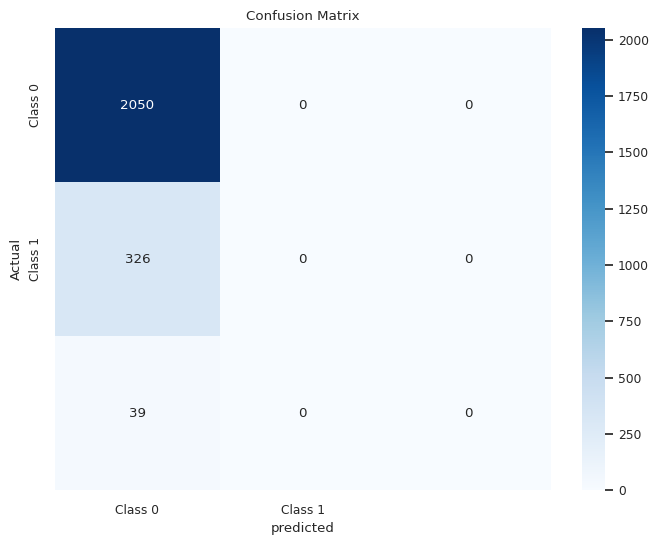

In [ ]:
# confusion Matrix
conf_matrix=confusion_matrix(y_test,y_pred)

# plot confusin matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="Blues",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0",'Class 1' ])
plt.title("Confusion Matrix")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()

## Best classification model

Training and Evaluating Logistic Regression...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

Accuracy:0.8489

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



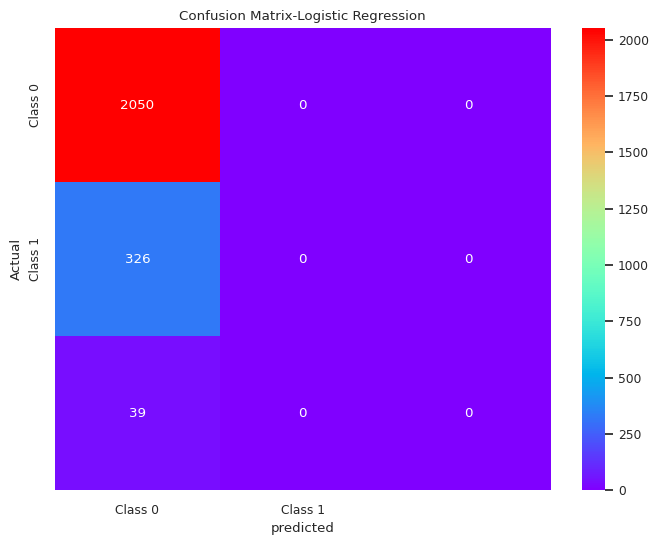

Training and Evaluating Random Forest...
Accuracy:0.8476

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2050
           1       0.39      0.03      0.05       326
           2       1.00      0.03      0.05        39

    accuracy                           0.85      2415
   macro avg       0.75      0.35      0.34      2415
weighted avg       0.79      0.85      0.79      2415



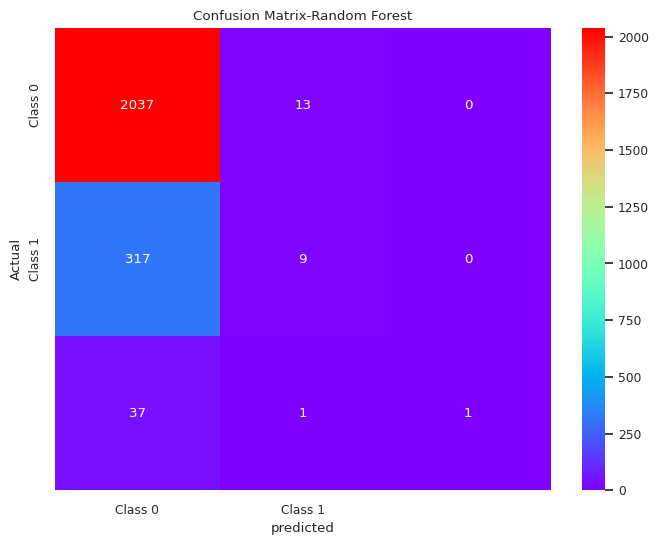

Training and Evaluating Decision Tree...
Accuracy:0.7366

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.83      0.85      2050
           1       0.18      0.21      0.20       326
           2       0.10      0.10      0.10        39

    accuracy                           0.74      2415
   macro avg       0.38      0.38      0.38      2415
weighted avg       0.75      0.74      0.75      2415



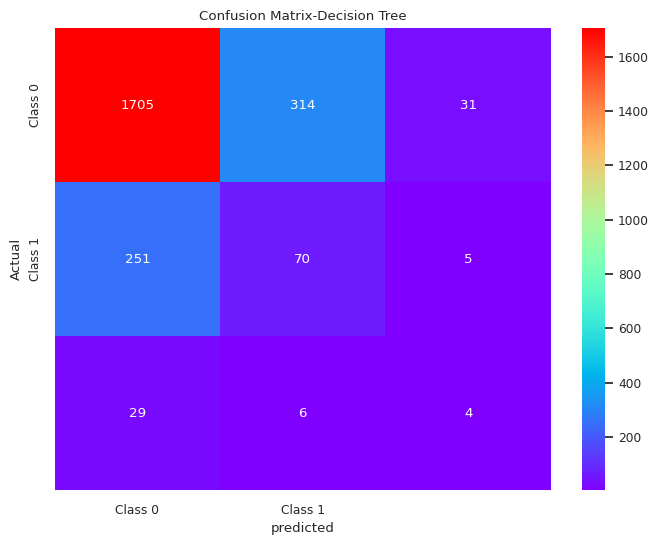

Training and Evaluating K-Nearest Neighbors...
Accuracy:0.8472

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


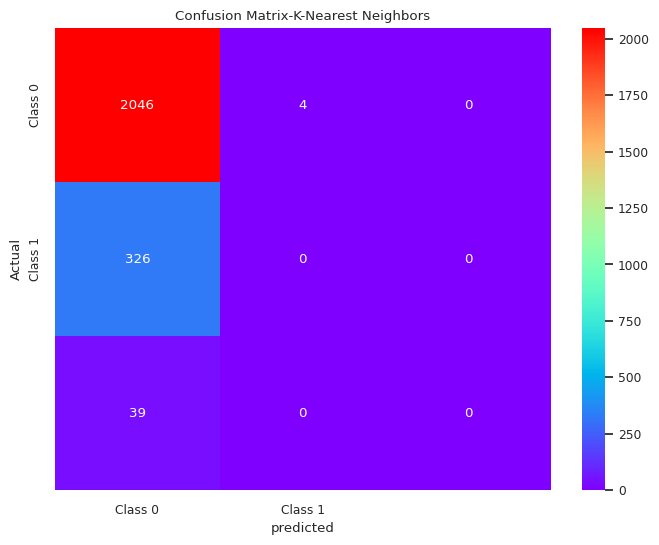

Training and Evaluating Support Vector Machine...
Accuracy:0.8489

Classification Report
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2050
           1       0.00      0.00      0.00       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.28      0.33      0.31      2415
weighted avg       0.72      0.85      0.78      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


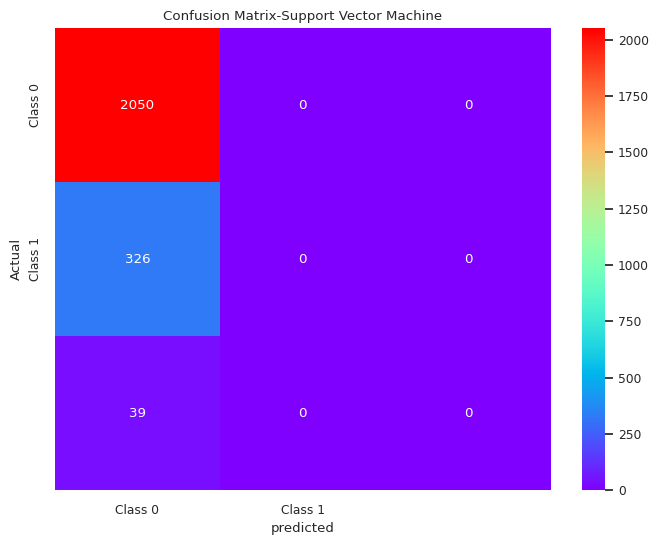

Training and Evaluating Extra Trees...
Accuracy:0.8460

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      2050
           1       0.37      0.03      0.06       326
           2       0.00      0.00      0.00        39

    accuracy                           0.85      2415
   macro avg       0.41      0.34      0.32      2415
weighted avg       0.77      0.85      0.79      2415



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


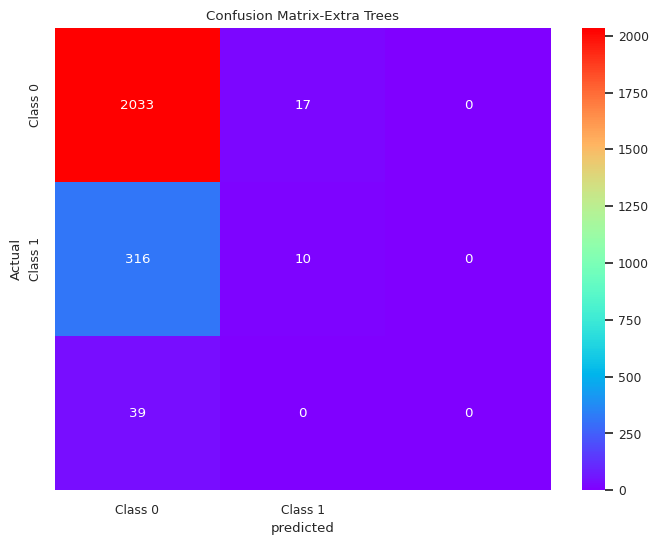

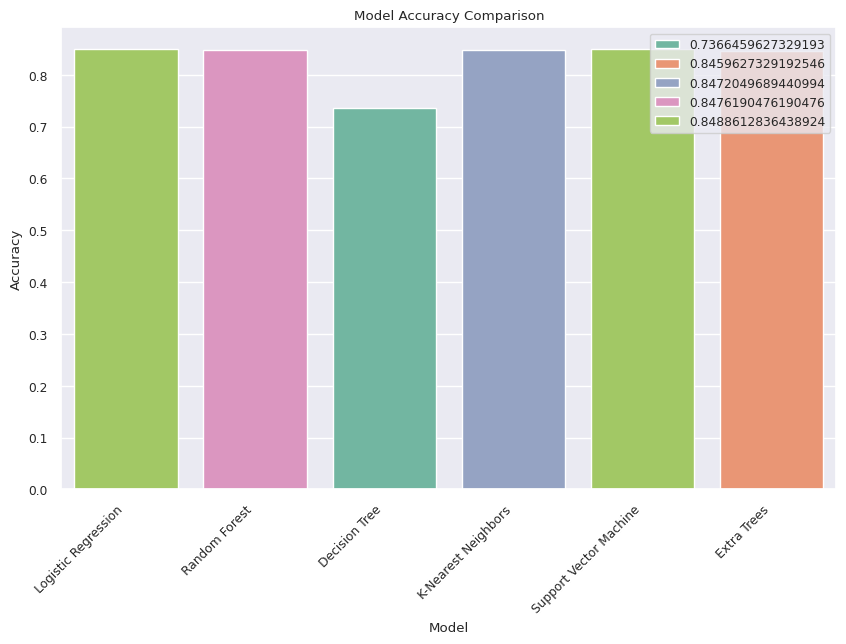

In [131]:
# Define models to evaluate
models={
    'Logistic Regression':LogisticRegression(),
    'Random Forest':RandomForestClassifier(),
    'Decision Tree':DecisionTreeClassifier(),
    'K-Nearest Neighbors':KNeighborsClassifier(n_neighbors=11),
    'Support Vector Machine':SVC(kernel='linear',probability=True),
    'Extra Trees':ExtraTreesClassifier()
}
# Initialize a list to store model names and accurcies
model_accuracies=[]

# Loop through models ,train ,and evaluate
for model_name, model in models.items():
  print(f"Training and Evaluating {model_name}...")

  # train the model.
  model.fit(x_train,y_train)

  # prediction
  y_pred=model.predict(x_test)

  # Accuracy
  accuracy=accuracy_score(y_test,y_pred)
  model_accuracies.append((model_name,accuracy))
  print(f"Accuracy:{accuracy:.4f}")

  # classification Report
  print("\nClassification Report")
  print(classification_report(y_test,y_pred))

  # confusion_Matrix
  conf_matrix=confusion_matrix(y_test,y_pred)

  #plot confusion matrix
  plt.figure(figsize=(8,6))
  sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="rainbow",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0",'Class 1' ])
  plt.title(f"Confusion Matrix-{model_name}")
  plt.xlabel('predicted')
  plt.ylabel('Actual')
  plt.show()

#plotting the accuracies of all models
model_names=[model_name for model_name, _ in model_accuracies]
accuracies=[accuracy for _,accuracy in model_accuracies]

# Create a bar plot for accuracy
plt.figure(figsize=(10,6))
sns.barplot(x=model_names, y=accuracies,palette='Set2',hue=accuracies)
plt.title("Model Accuracy Comparison")
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.xticks(rotation=45,ha='right')
plt.show()

F1- score

One can combine precision and recall into one score, which is called the F-score is computed with the harmonic mean of precision and recall . Note that it assign much more weight to low values. As a result of the  classifier will only get a high f-score, if both recall and precision are high

## logistic Regression with Sampling Methods


Training and evaluating Logistic Regression with Oversampling (SMOTE)...
Accuracy(oversampling-SMOTE):0.8170

Classification Report(oversampling-SMOTE):
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      2050
           1       0.25      0.11      0.15       326
           2       0.22      0.05      0.08        39

    accuracy                           0.82      2415
   macro avg       0.44      0.37      0.38      2415
weighted avg       0.76      0.82      0.78      2415



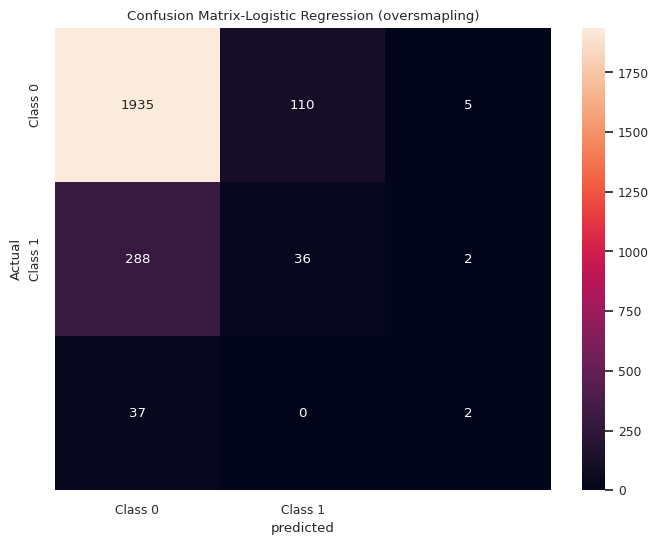

In [133]:
# Apply oversampling (SMOTE)
print("\nTraining and evaluating Logistic Regression with Oversampling (SMOTE)...")
smote=SMOTE(random_state=42)
x_train_resampled,y_train_resampled=smote.fit_resample(x_train,y_train)
# Train model on resampled data
model.fit(x_train_resampled,y_train_resampled)
# predictions
y_pred_oversample=model.predict(x_test)
# Accuracy
accuracy_oversample=accuracy_score(y_test,y_pred_oversample)
print(f'Accuracy(oversampling-SMOTE):{accuracy_oversample:.4f}')
# classification Report
print("\nClassification Report(oversampling-SMOTE):")
print(classification_report(y_test,y_pred_oversample))
# confusion_Matrix
conf_matrix=confusion_matrix(y_test,y_pred_oversample)
#plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix,annot=True,fmt="d",cmap="rocket",xticklabels=["Class 0","Class 1"],yticklabels=["Class 0",'Class 1' ])
plt.title(f"Confusion Matrix-Logistic Regression (oversmapling)")
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()


## Pickle file

In [134]:
import pickle

# train the model (assuming x_train and y_train are already dfeined)
model = DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

# save the trained model using pickle
with open ('decision_tree_model.pkl','wb') as file:
  pickle.dump(model, file)
  print("model saved to 'decision_tree_model.pkl'.")

model saved to 'decision_tree_model.pkl'.
